<a href="https://colab.research.google.com/github/HongSeongMo/Airbnb/blob/main/Another_copy_of_aribnb4%EA%B0%95%EB%B3%80%EC%88%98%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4강. 변수 상관관계 분석

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Feature 데이터 읽기

In [2]:
import pandas as pd

In [3]:
feature_df = pd.read_csv('drive/MyDrive/letuin/airbnb/data/feature.csv')

feature_df.head()

,id,host_id,neighbourhood_cleansed,accommodates,availability_365,calculated_host_listings_count,minimum_maximum_nights,latitude,number_of_reviews,maximum_minimum_nights,...,host_acceptance_rate,room_entire,room_hotel,room_private,room_shared,response_3d,response_1d,response_3h,response_1h,revenue
0,198258,967537,Barking and Dagenham,1,363,1,100.0,51.53430,41,2.0,...,75.0,0,0,1,0,0,0,0,1,0.0
1,33332,144444,Richmond upon Thames,2,365,2,21.0,51.46410,20,2.0,...,NaN,0,0,1,0,0,0,0,0,0.0
2,42010,157884,Barnet,2,208,2,365.0,51.58590,556,4.0,...,100.0,0,0,1,0,0,0,1,0,0.0
3,284603,1481851,Kensington and Chelsea,3,0,1,365.0,51.51464,6,14.0,...,100.0,1,0,0,0,0,0,0,0,0.0
4,89870,54730,Islington,4,357,3,60.0,51.56792,133,1.0,...,85.0,1,0,0,0,0,0,0,1,0.0


In [4]:
feature_df.shape

(91778, 56)

결측치 처리

결측 데이터 확인

In [5]:
# 결측 데이터  수 확인
col_null = []
for col in feature_df.columns :
    null_count = feature_df[feature_df[col].isnull()].shape[0]
    print(f"{col}:{null_count}")
    if null_count > 0:
        col_null.append(col)

id:0
host_id:0
neighbourhood_cleansed:0
accommodates:0
availability_365:0
calculated_host_listings_count:0
minimum_maximum_nights:1
latitude:0
number_of_reviews:0
maximum_minimum_nights:1
review_scores_value:24123
review_scores_accuracy:24088
review_scores_location:24122
review_scores_checkin:24120
host_listings_count:5
reviews_per_month:24123
review_scores_rating:24061
maximum_nights_avg_ntm:1
maximum_nights:0
minimum_nights:0
number_of_reviews_ltm:0
review_scores_cleanliness:24079
availability_30:0
host_total_listings_count:5
review_scores_communication:24092
calculated_host_listings_count_entire_homes:0
calculated_host_listings_count_private_rooms:0
minimum_nights_avg_ntm:1
availability_90:0
minimum_minimum_nights:1
maximum_maximum_nights:1
longitude:0
calculated_host_listings_count_shared_rooms:0
number_of_reviews_l30d:0
availability_60:0
beds:1117
host_is_superhost:0
host_has_profile_pic:0
host_identity_verified:0
has_availability:0
instant_bookable:0
host_since:0
last_review:0
fi

In [6]:
# 결측치 포함 필드
col_null

['minimum_maximum_nights',
 'maximum_minimum_nights',
 'review_scores_value',
 'review_scores_accuracy',
 'review_scores_location',
 'review_scores_checkin',
 'host_listings_count',
 'reviews_per_month',
 'review_scores_rating',
 'maximum_nights_avg_ntm',
 'review_scores_cleanliness',
 'host_total_listings_count',
 'review_scores_communication',
 'minimum_nights_avg_ntm',
 'minimum_minimum_nights',
 'maximum_maximum_nights',
 'beds',
 'price',
 'host_response_rate',
 'host_acceptance_rate']

결측치 채우기 : .fillna

*   필드의 성격에 따라 채우는 값이 다를 수 있음.
    *   0, 평균, 최소, 최대 등




















In [7]:
#column 구분
null_with_0 = ['host_response_rate','host_acceptance_rate','host_listings_count','host_total_listings_count']
null_with_avg = ['review_scores_accuracy','review_scores_checkin','review_scores_location','review_scores_communication',
                 'review_scores_rating','reviews_per_month','review_scores_value','review_scores_cleanliness',
                 'maximum_nights_avg_ntm','minimum_nights_avg_ntm','maximum_minimum_nights','minimum_maximum_nights',
                 'minimum_minimum_nights', 'maximum_maximum_nights', 'beds'
                 ]


0으로 채우기

In [8]:
#fill null with 0
for col in null_with_0:
    feature_df[col] = feature_df[col].fillna(0)

평균으로 채우기

In [9]:
#fill null with avg
for col in null_with_avg:
    col_avg = feature_df[col].mean()
    feature_df[col] = feature_df[col].fillna(col_avg)

처리 결과 확인

In [10]:
for col in feature_df.columns:
    null_count = feature_df[feature_df[col].isnull()].shape[0]
    print(f"{col}:{null_count}")

id:0
host_id:0
neighbourhood_cleansed:0
accommodates:0
availability_365:0
calculated_host_listings_count:0
minimum_maximum_nights:0
latitude:0
number_of_reviews:0
maximum_minimum_nights:0
review_scores_value:0
review_scores_accuracy:0
review_scores_location:0
review_scores_checkin:0
host_listings_count:0
reviews_per_month:0
review_scores_rating:0
maximum_nights_avg_ntm:0
maximum_nights:0
minimum_nights:0
number_of_reviews_ltm:0
review_scores_cleanliness:0
availability_30:0
host_total_listings_count:0
review_scores_communication:0
calculated_host_listings_count_entire_homes:0
calculated_host_listings_count_private_rooms:0
minimum_nights_avg_ntm:0
availability_90:0
minimum_minimum_nights:0
maximum_maximum_nights:0
longitude:0
calculated_host_listings_count_shared_rooms:0
number_of_reviews_l30d:0
availability_60:0
beds:0
host_is_superhost:0
host_has_profile_pic:0
host_identity_verified:0
has_availability:0
instant_bookable:0
host_since:0
last_review:0
first_review:0
price:4180
host_respon

Feature 기초 통계 : .describe

In [11]:
#피쳐 기초 통계
desc_df = feature_df.describe()
desc_df

,id,host_id,accommodates,availability_365,calculated_host_listings_count,minimum_maximum_nights,latitude,number_of_reviews,maximum_minimum_nights,review_scores_value,...,host_acceptance_rate,room_entire,room_hotel,room_private,room_shared,response_3d,response_1d,response_3h,response_1h,revenue
count,9.177800e+04,9.177800e+04,91778.000000,91778.000000,91778.000000,9.177800e+04,91778.000000,91778.000000,91778.000000,91778.000000,...,91778.000000,91778.000000,91778.000000,91778.000000,91778.000000,91778.000000,91778.000000,91778.000000,91778.000000,9.177800e+04
mean,4.086494e+17,1.656878e+08,3.185698,119.829251,18.886465,2.405303e+05,51.509655,17.969339,10.348126,4.598477,...,60.147105,0.625444,0.002212,0.367637,0.004707,0.037253,0.074974,0.121020,0.432544,6.148898e+01
std,4.383931e+17,1.756558e+08,1.984127,134.902781,66.116782,2.248186e+07,0.048760,43.303948,36.042413,0.461084,...,43.389061,0.484011,0.046979,0.482164,0.068446,0.189382,0.263351,0.326153,0.495431,6.865881e+03
min,1.391300e+04,4.775000e+03,1.000000,0.000000,1.000000,1.000000e+00,51.295937,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.337095e+07,2.260467e+07,2.000000,0.000000,1.000000,9.000000e+01,51.483430,0.000000,2.000000,4.590000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,5.250171e+07,8.423607e+07,2.000000,63.000000,2.000000,3.650000e+02,51.513800,4.000000,3.000000,4.598477,...,85.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,8.787777e+17,2.795101e+08,4.000000,251.000000,6.000000,1.125000e+03,51.539410,16.000000,5.000000,4.860000,...,99.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
max,1.042341e+18,5.501019e+08,16.000000,365.000000,595.000000,2.147484e+09,51.681642,1608.000000,1125.000000,5.000000,...,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.401522e+06


Feature 분포 : 히스토그램

Feature 분류 : Binary or Continuous

In [12]:
id_col = ['id', 'host_id', 'neighbourhood_cleansed']

feature_binary = []
feature_continuous = []

for col in desc_df.columns:
    if (col in id_col) | (col == 'revenue'):
        continue
    else:
        if (desc_df.loc['min', col] == 0) & (desc_df.loc['max', col] == 1):
            feature_binary.append(col) # 최솟값이 0이고 최댓값이 1이면 binary로 분류
        else:
            feature_continuous.append(col) #나머지는 continuous로 분류


In [13]:
feature_binary

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'has_availability',
 'instant_bookable',
 'room_entire',
 'room_hotel',
 'room_private',
 'room_shared',
 'response_3d',
 'response_1d',
 'response_3h',
 'response_1h']

In [14]:
feature_continuous

['accommodates',
 'availability_365',
 'calculated_host_listings_count',
 'minimum_maximum_nights',
 'latitude',
 'number_of_reviews',
 'maximum_minimum_nights',
 'review_scores_value',
 'review_scores_accuracy',
 'review_scores_location',
 'review_scores_checkin',
 'host_listings_count',
 'reviews_per_month',
 'review_scores_rating',
 'maximum_nights_avg_ntm',
 'maximum_nights',
 'minimum_nights',
 'number_of_reviews_ltm',
 'review_scores_cleanliness',
 'availability_30',
 'host_total_listings_count',
 'review_scores_communication',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'minimum_nights_avg_ntm',
 'availability_90',
 'minimum_minimum_nights',
 'maximum_maximum_nights',
 'longitude',
 'calculated_host_listings_count_shared_rooms',
 'number_of_reviews_l30d',
 'availability_60',
 'beds',
 'host_since',
 'last_review',
 'first_review',
 'price',
 'host_response_rate',
 'host_acceptance_rate']

히스토그램:binary 변수

In [15]:
# 시각화 모듈
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,8)

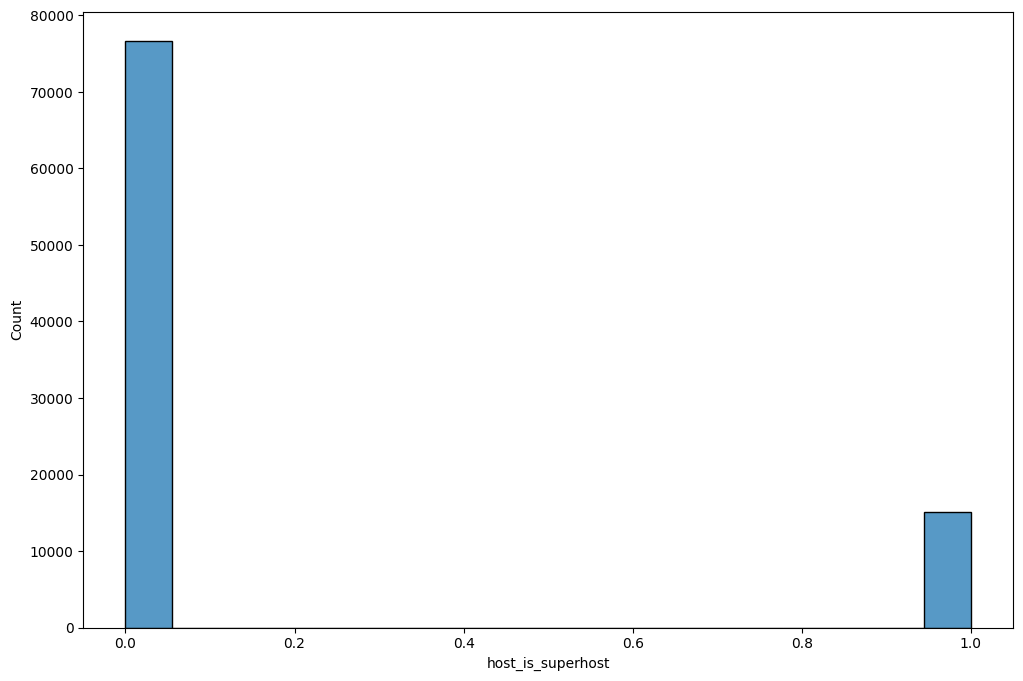

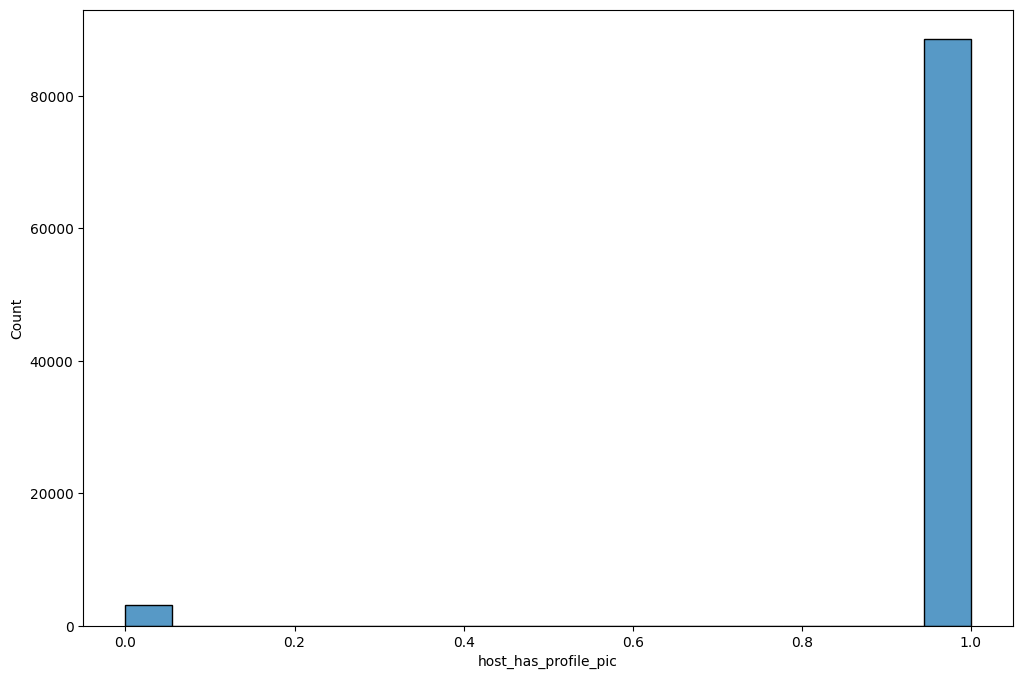

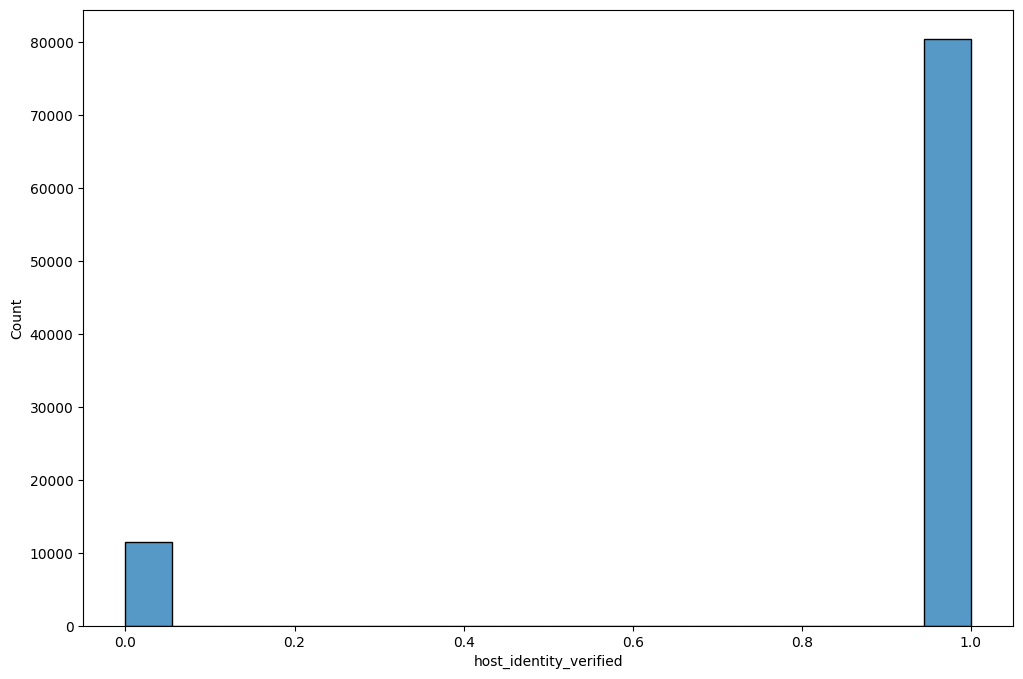

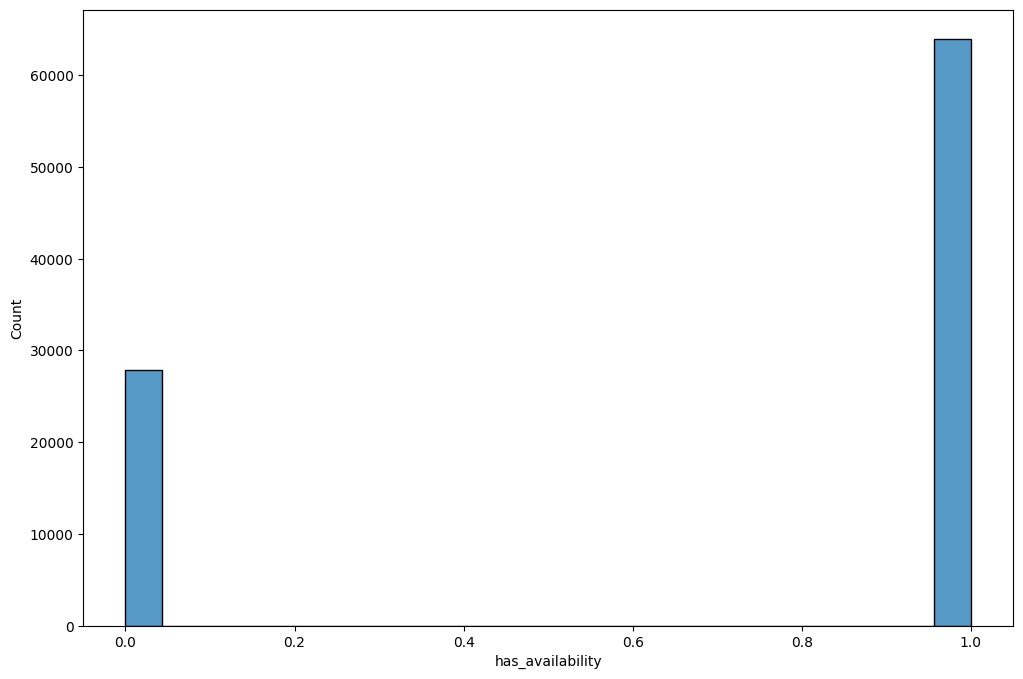

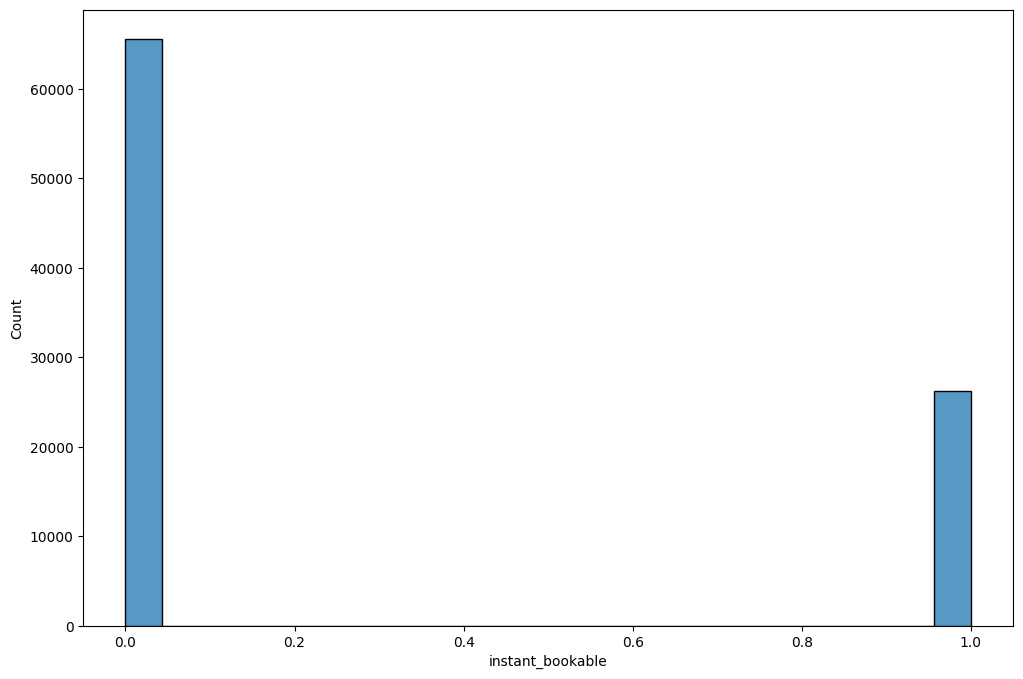

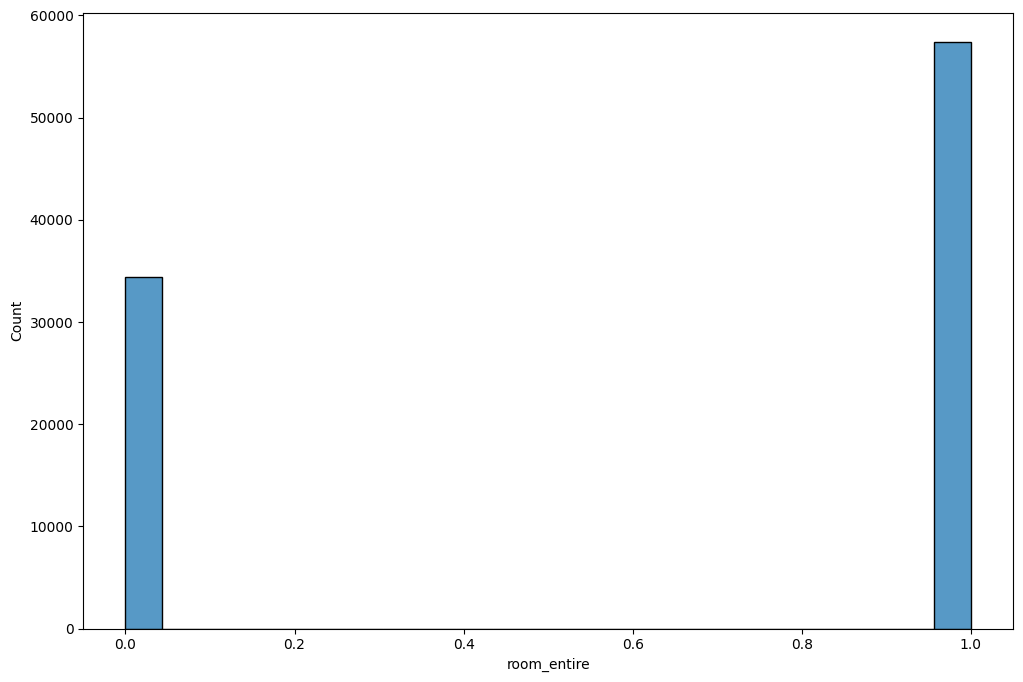

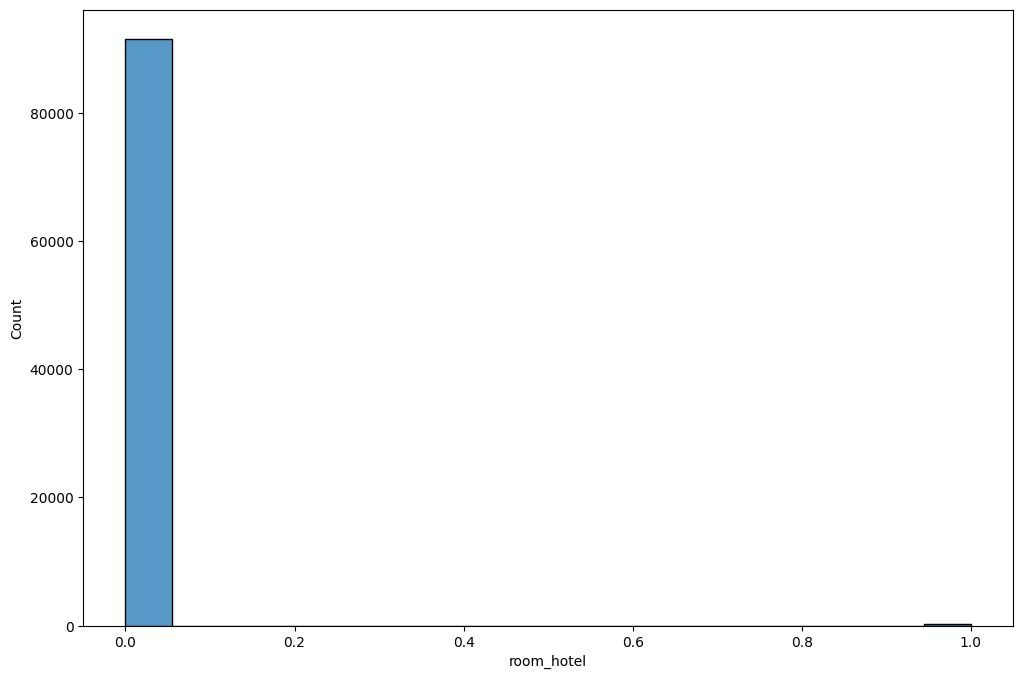

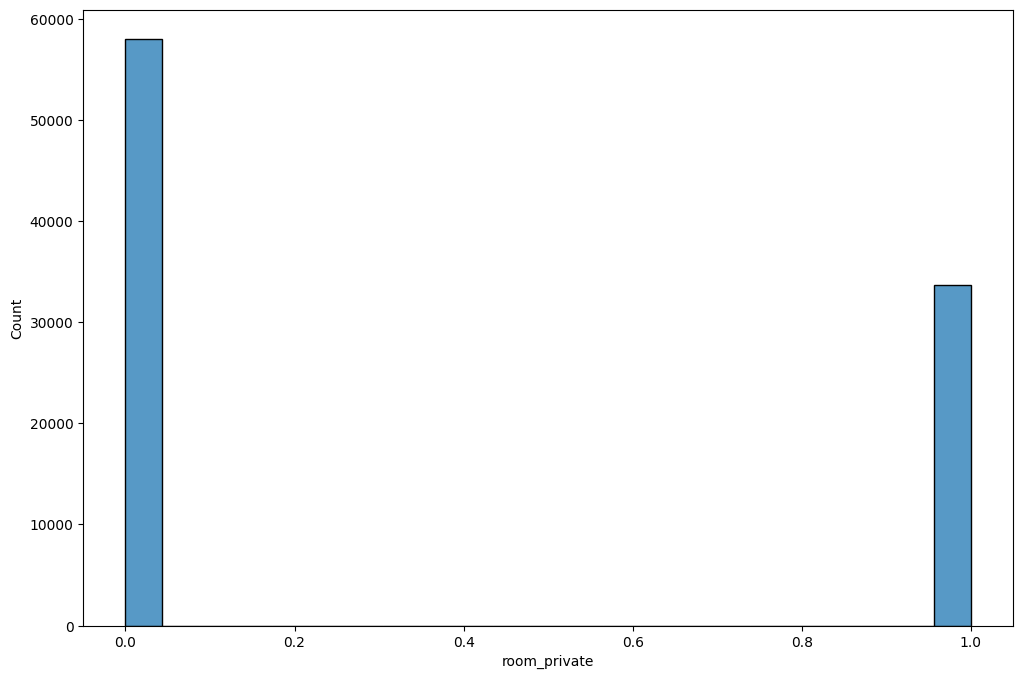

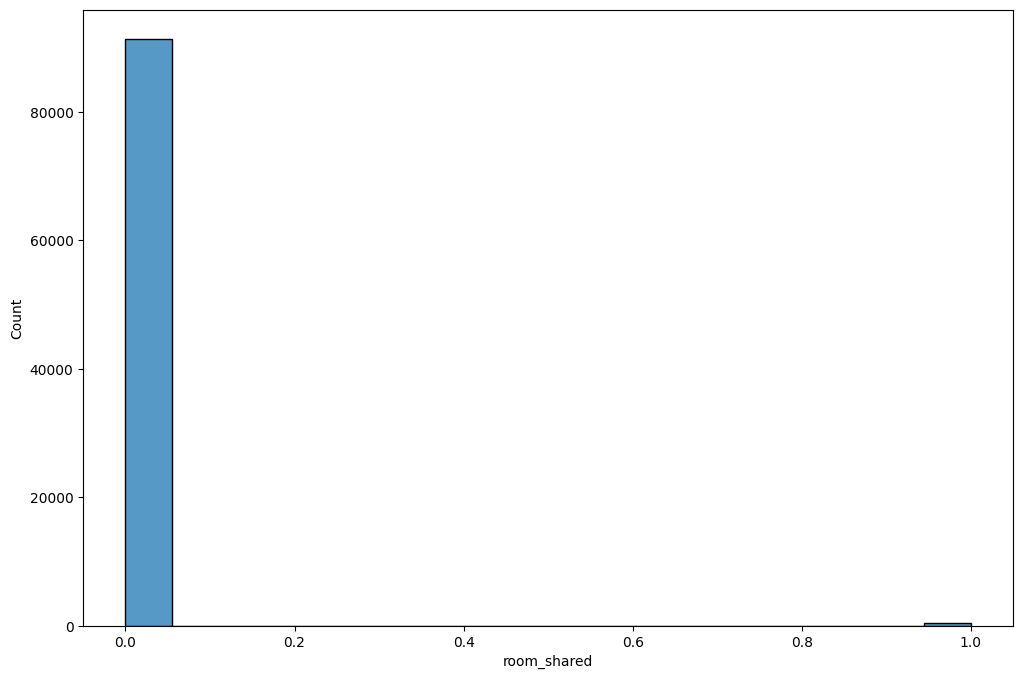

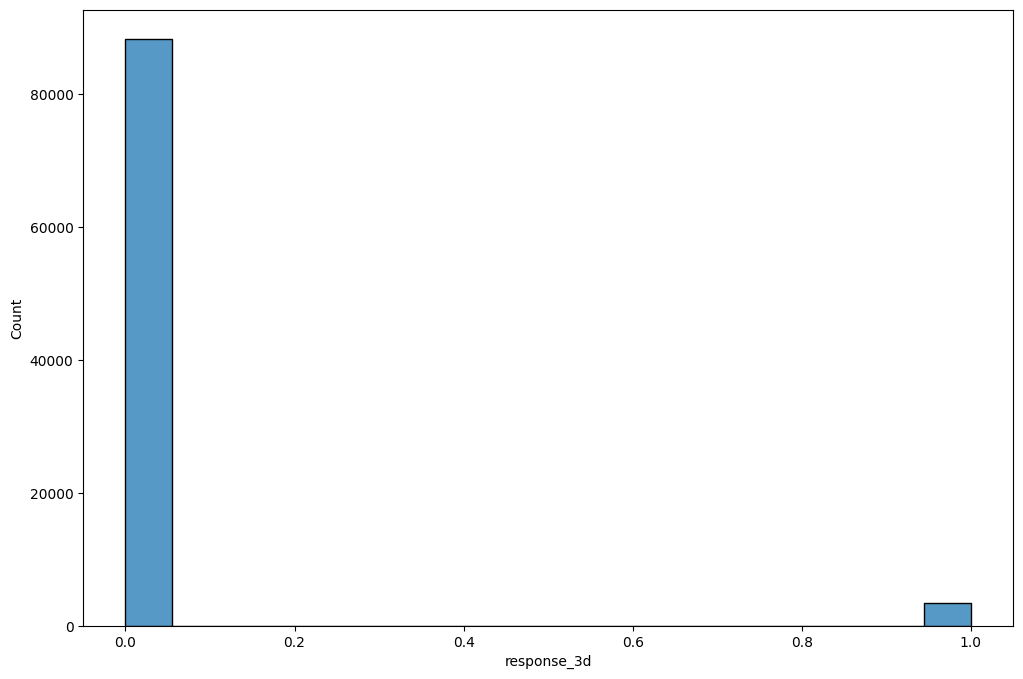

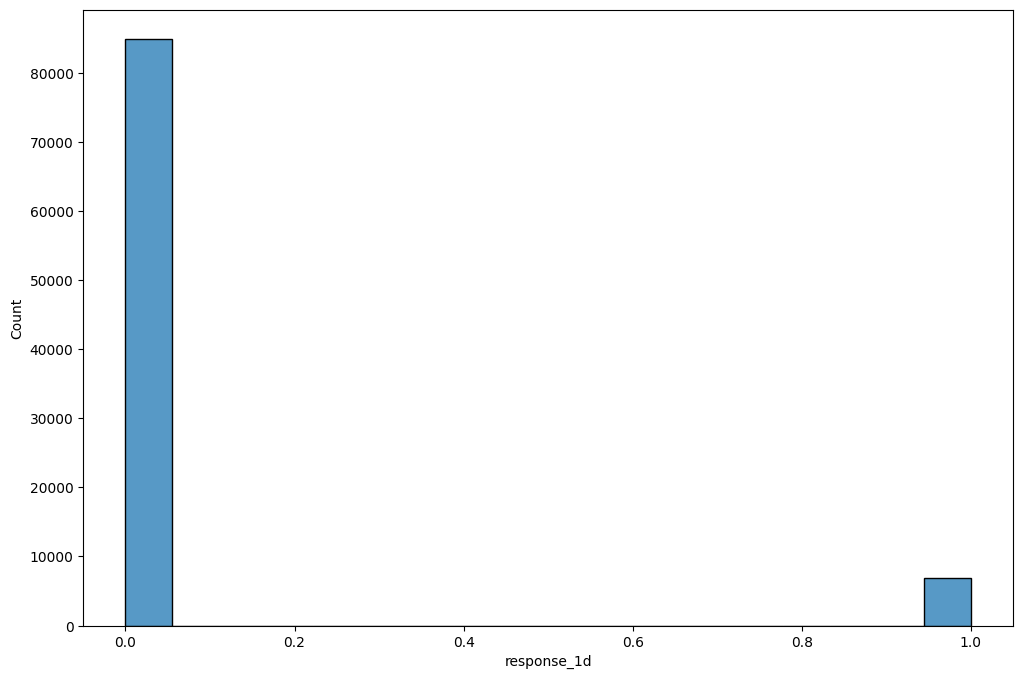

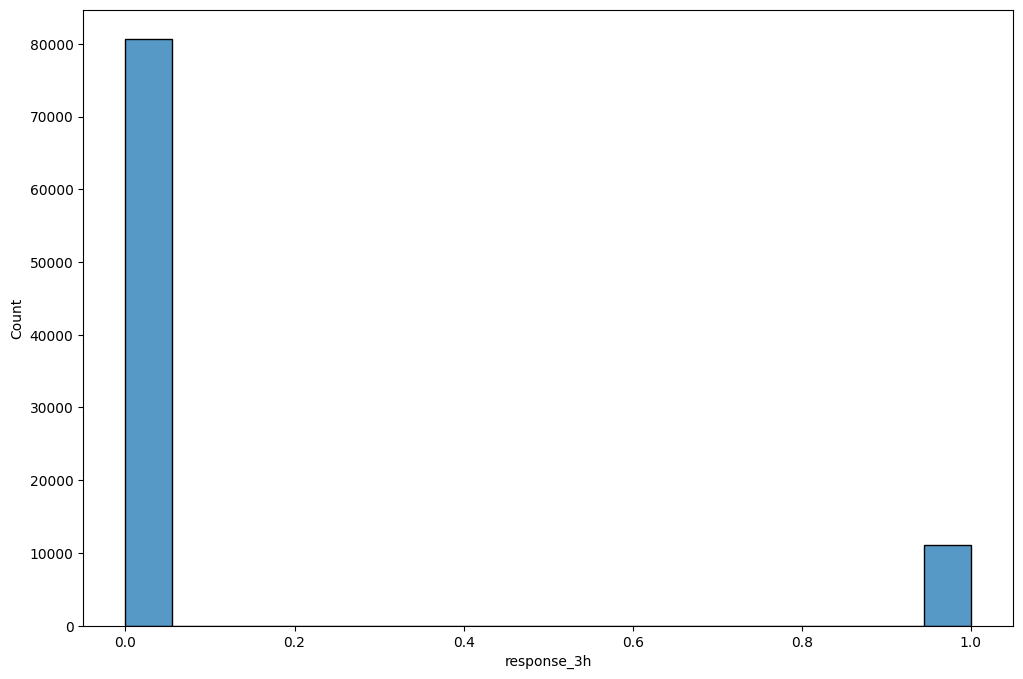

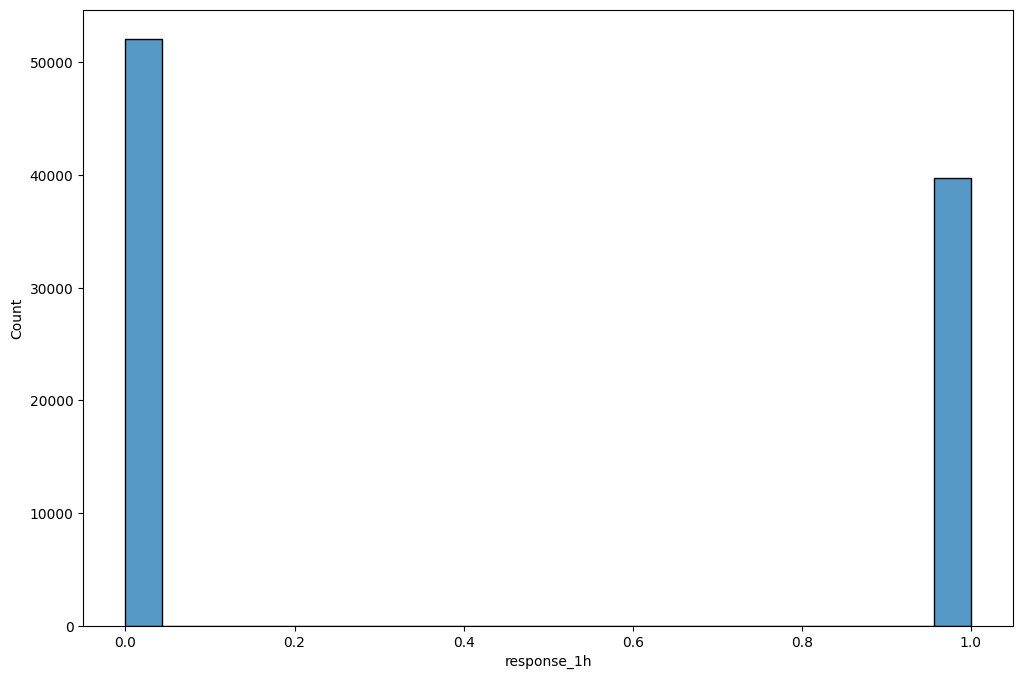

In [16]:
# histogram : binary feature
for col in feature_binary:
    sns.histplot(feature_df[col])
    plt.show()

히스토그램 : continuous 변수

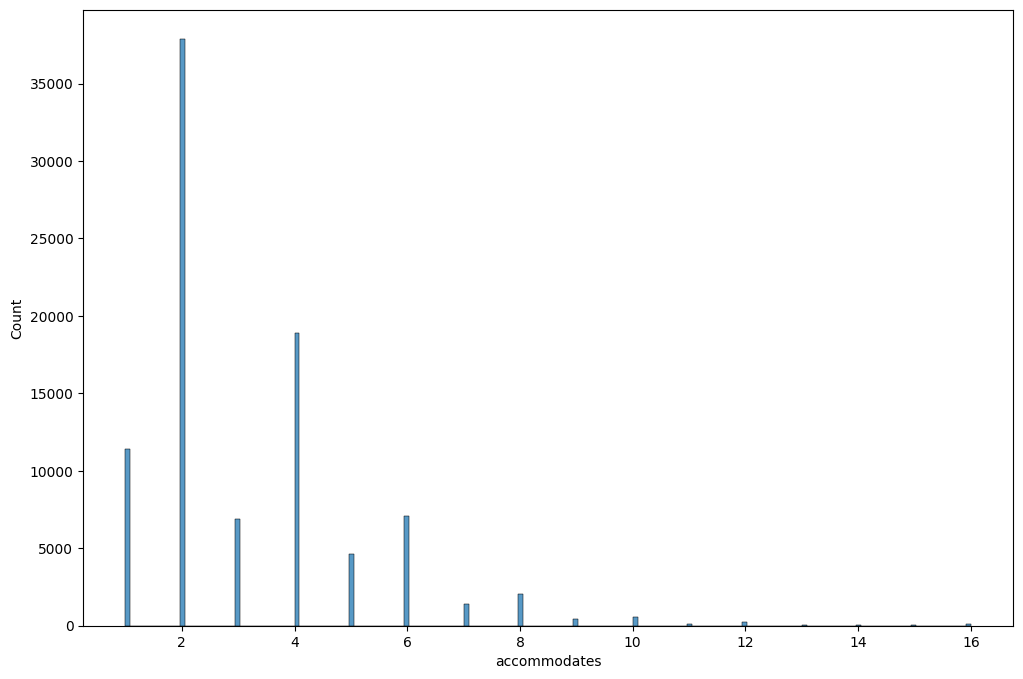

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


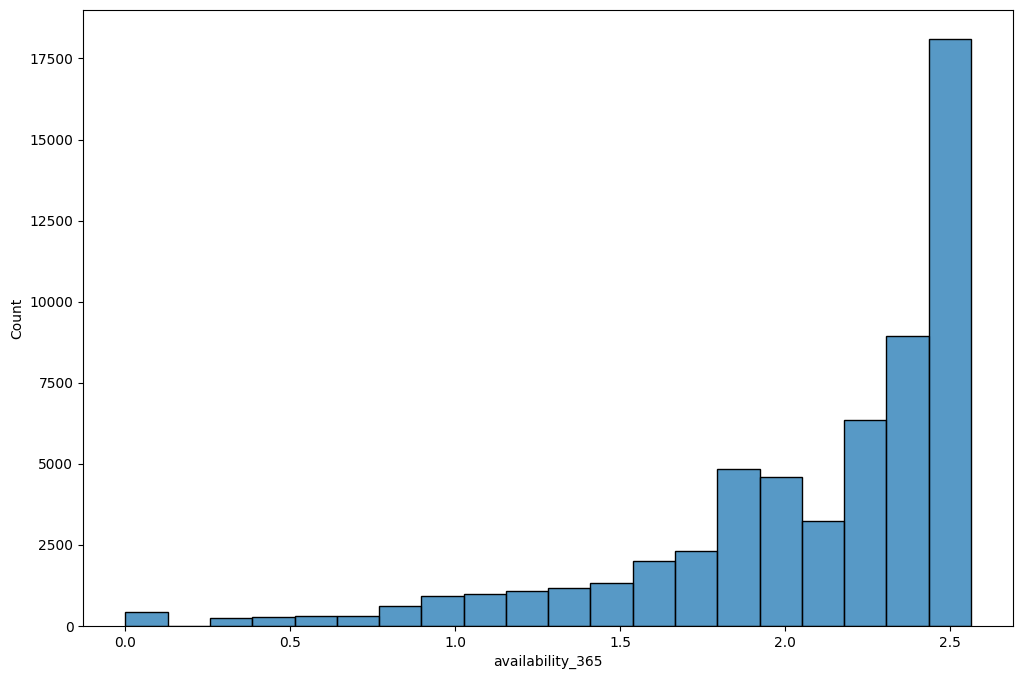

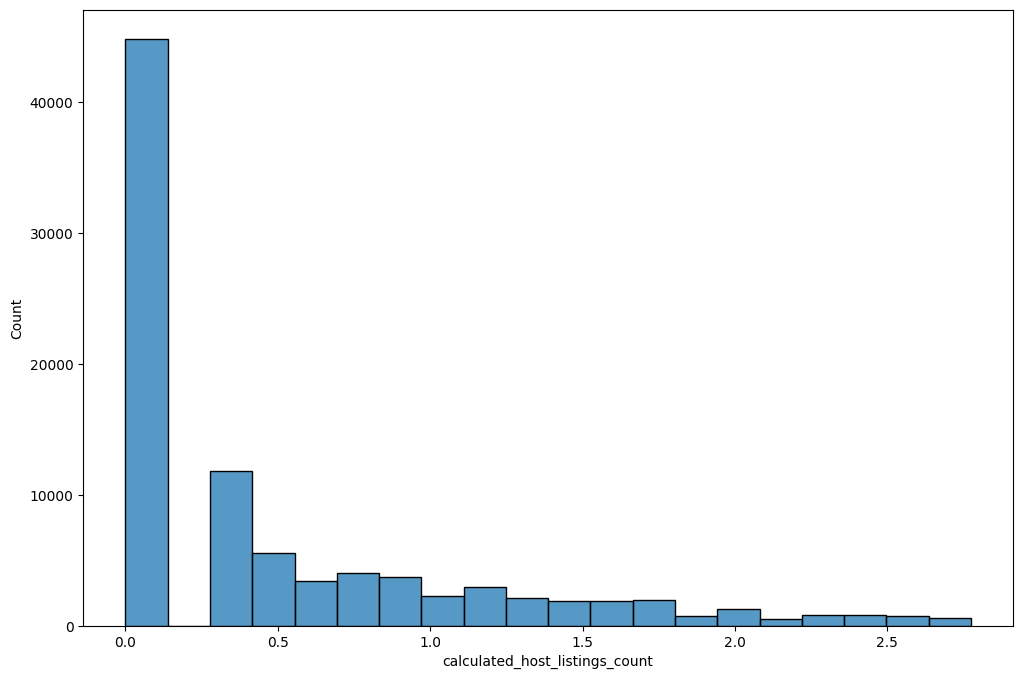

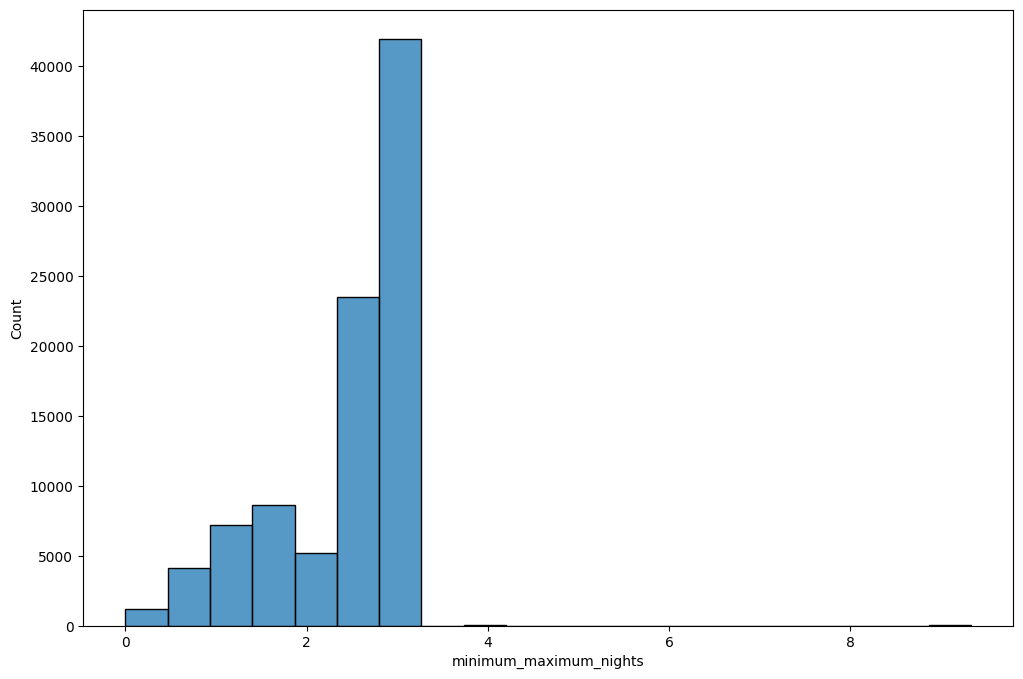

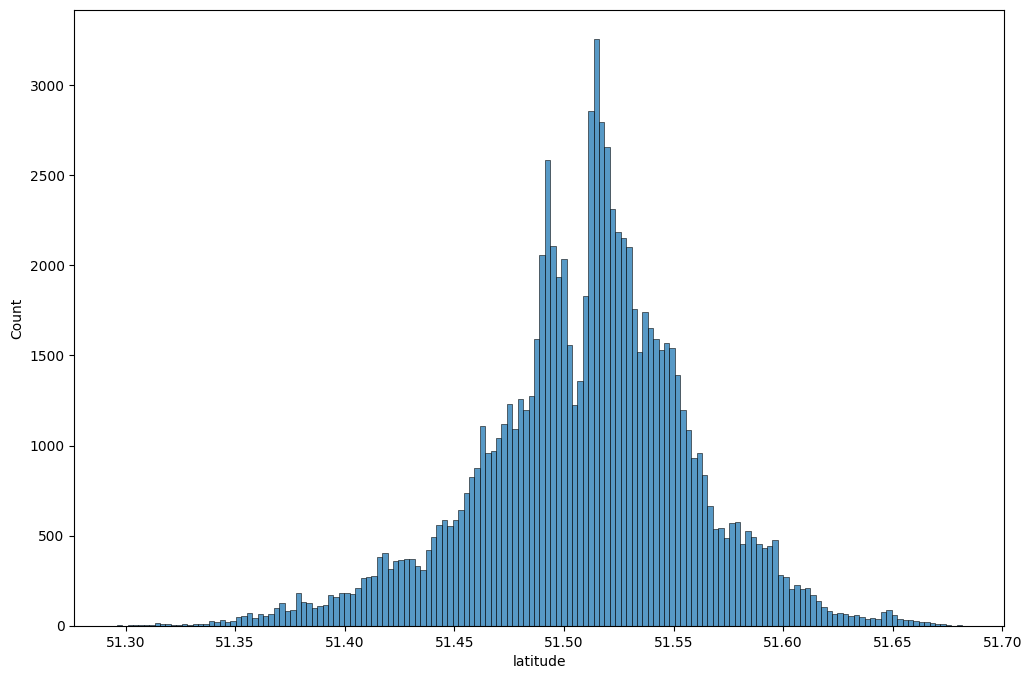

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


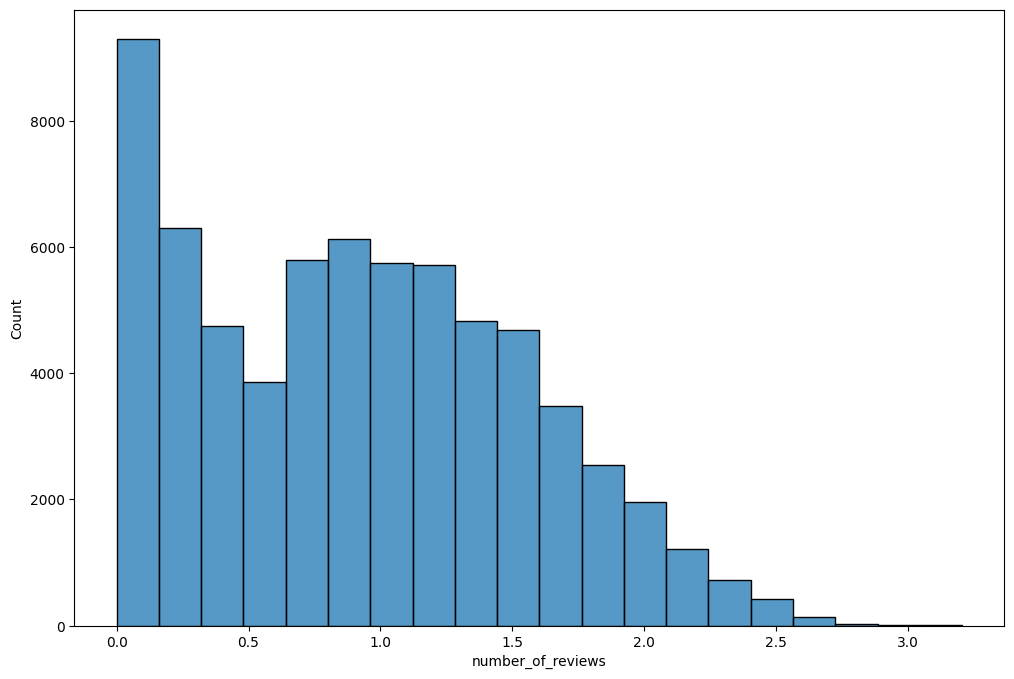

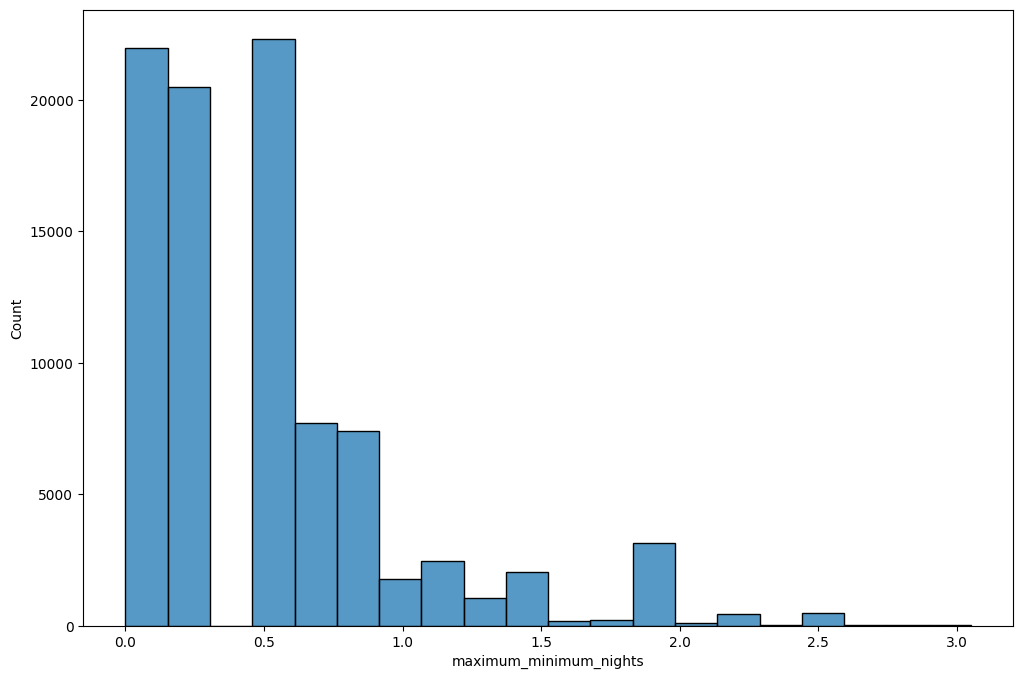

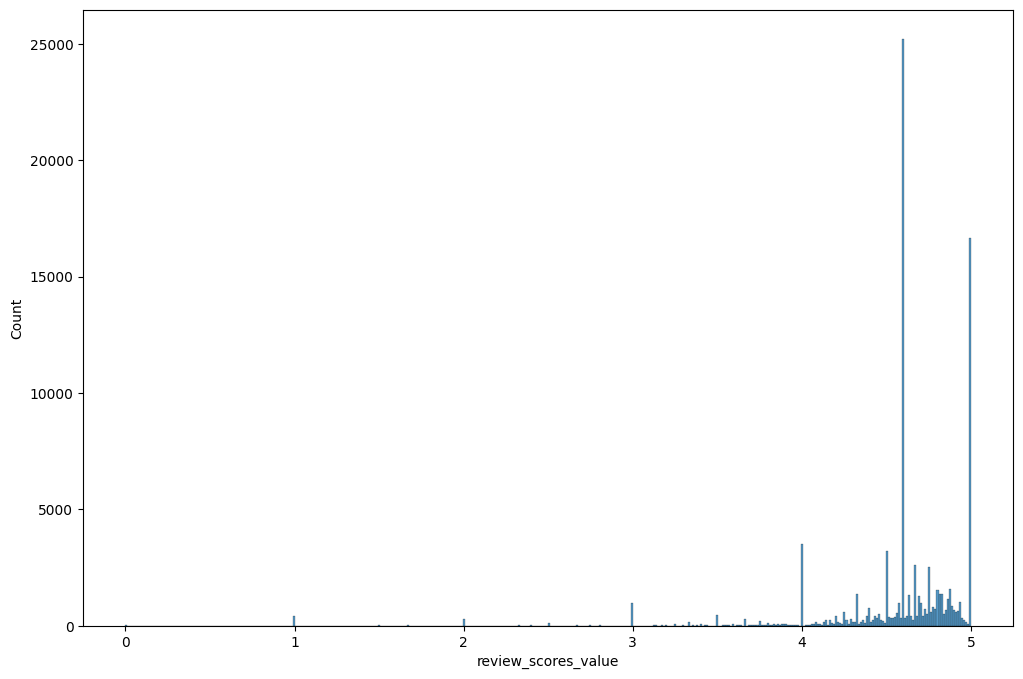

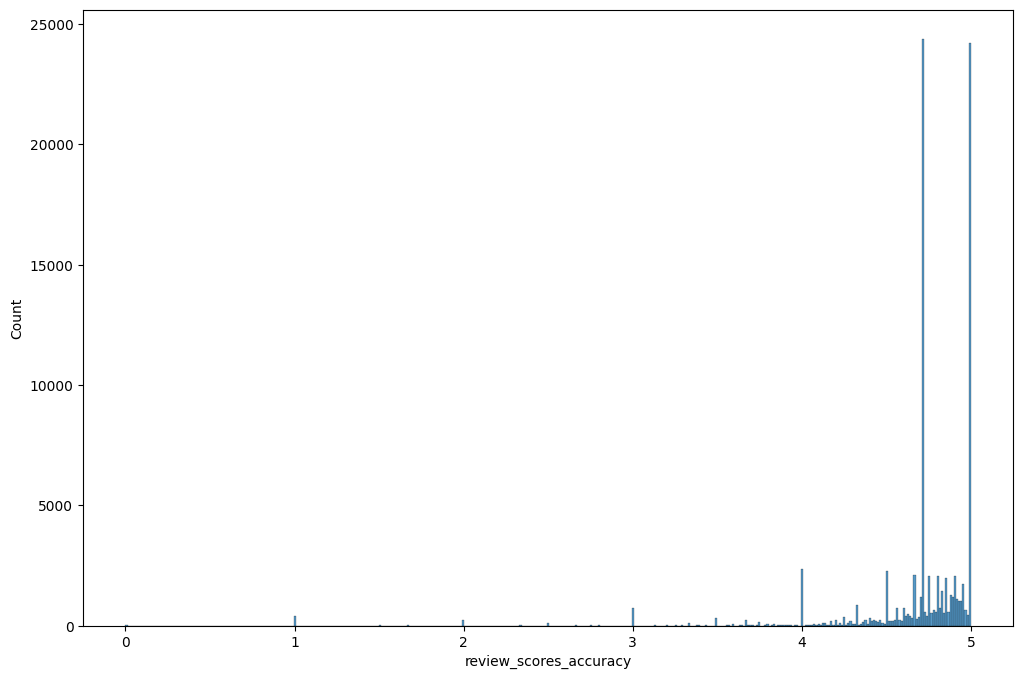

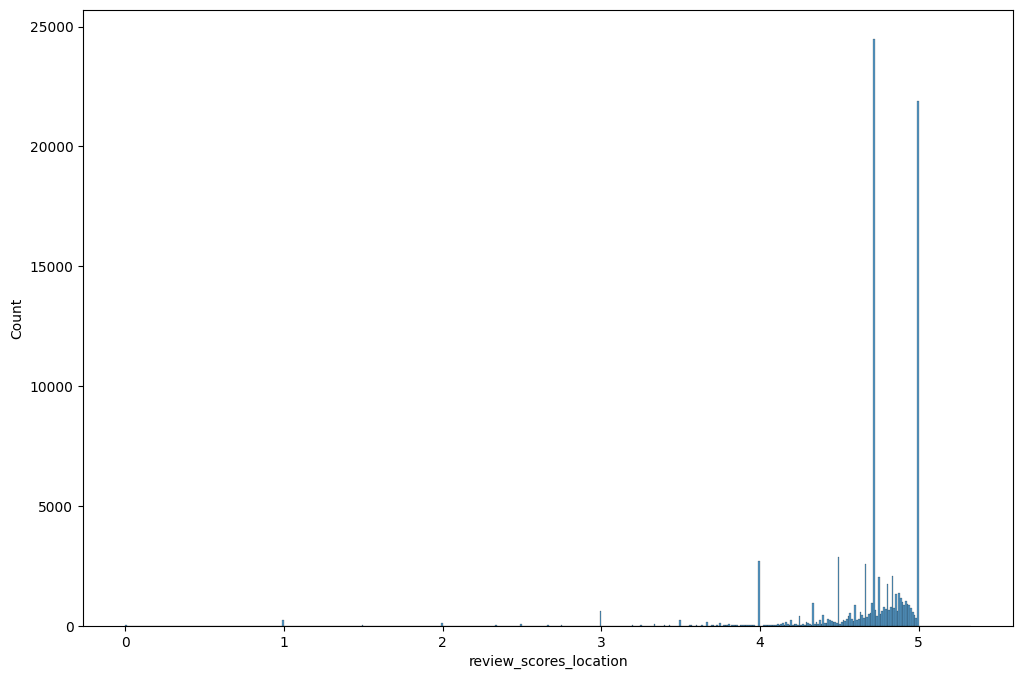

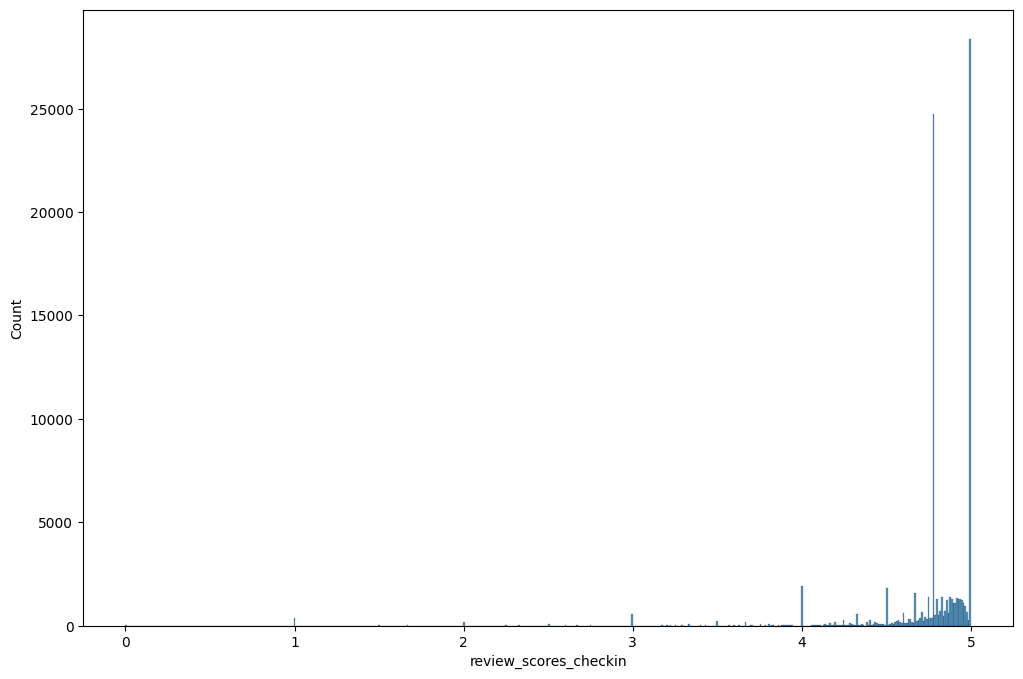

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


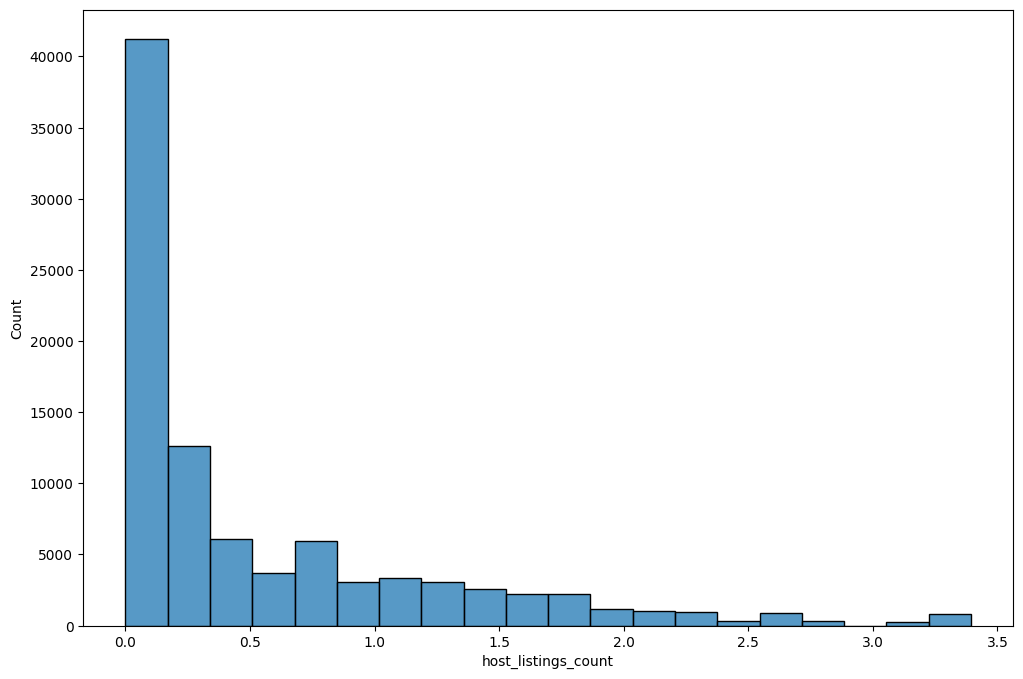

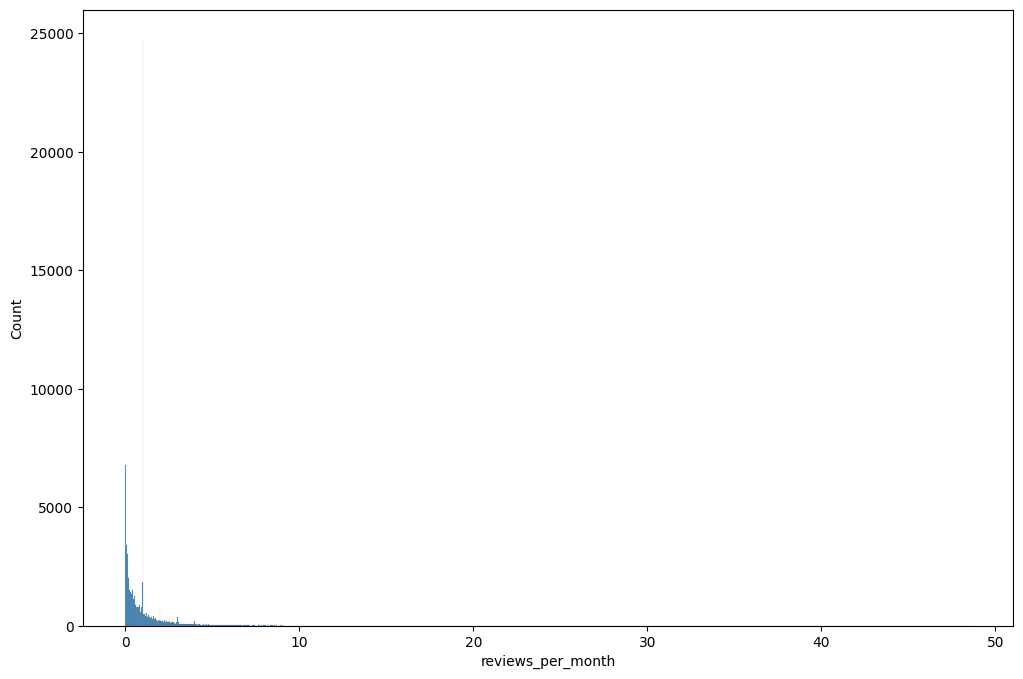

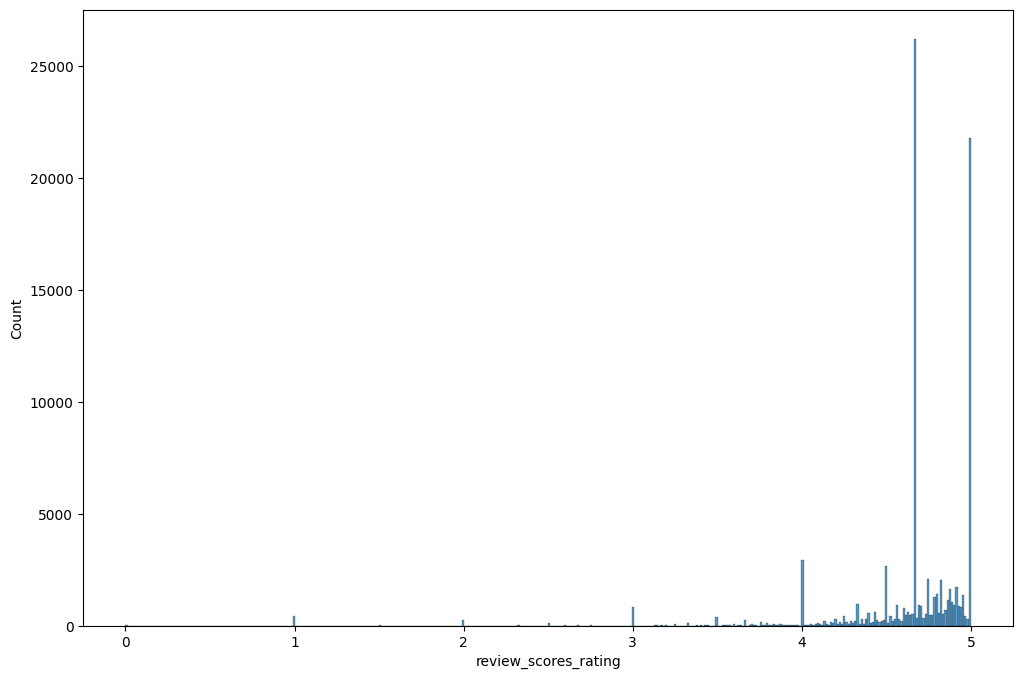

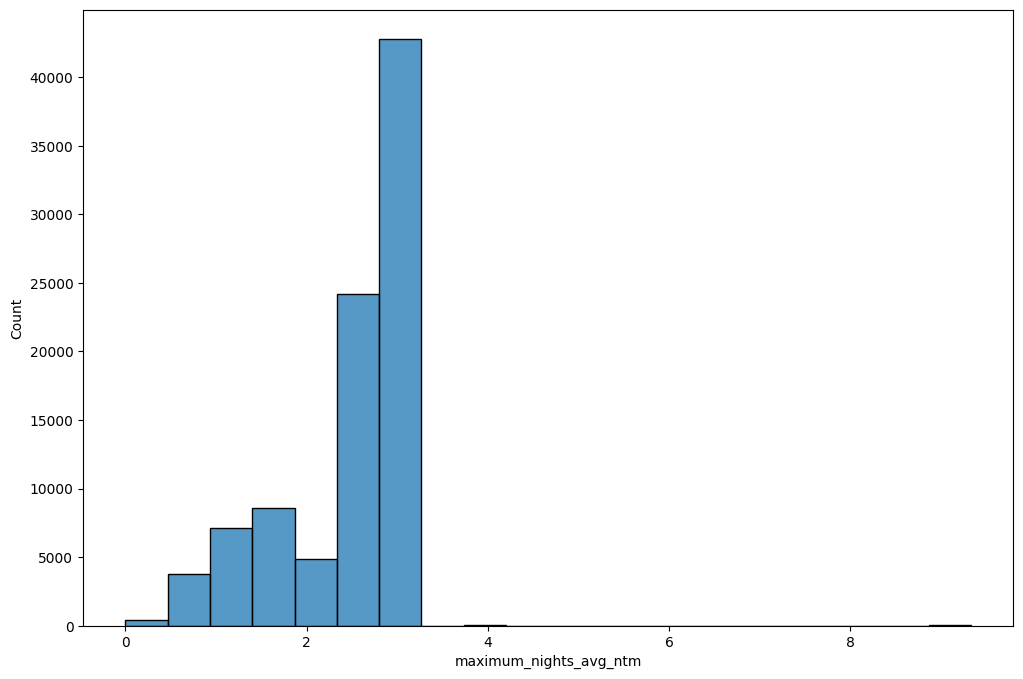

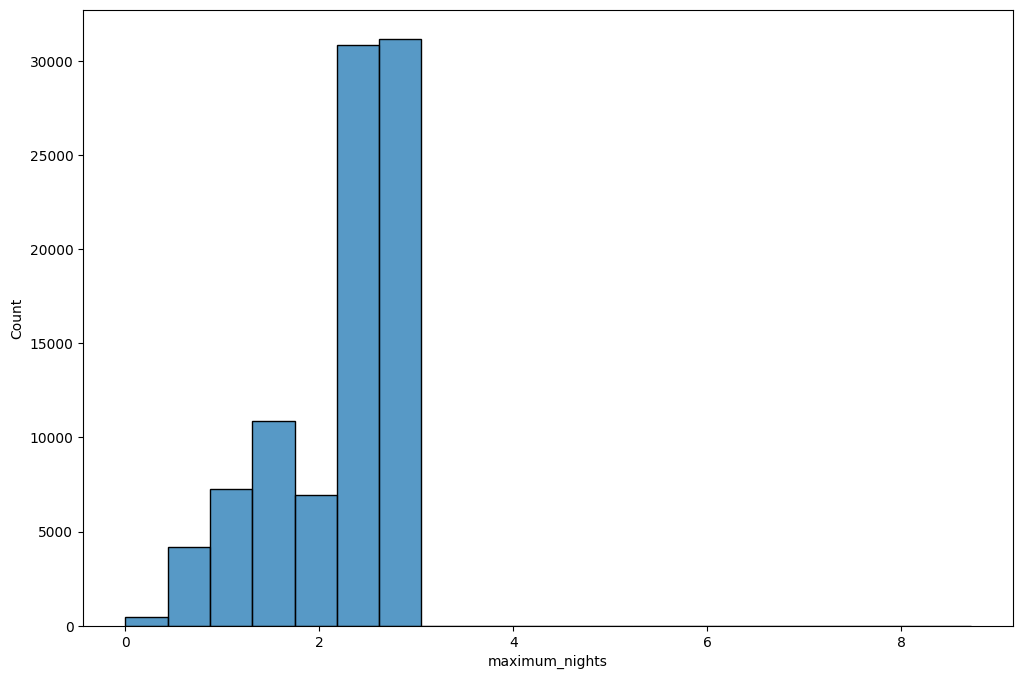

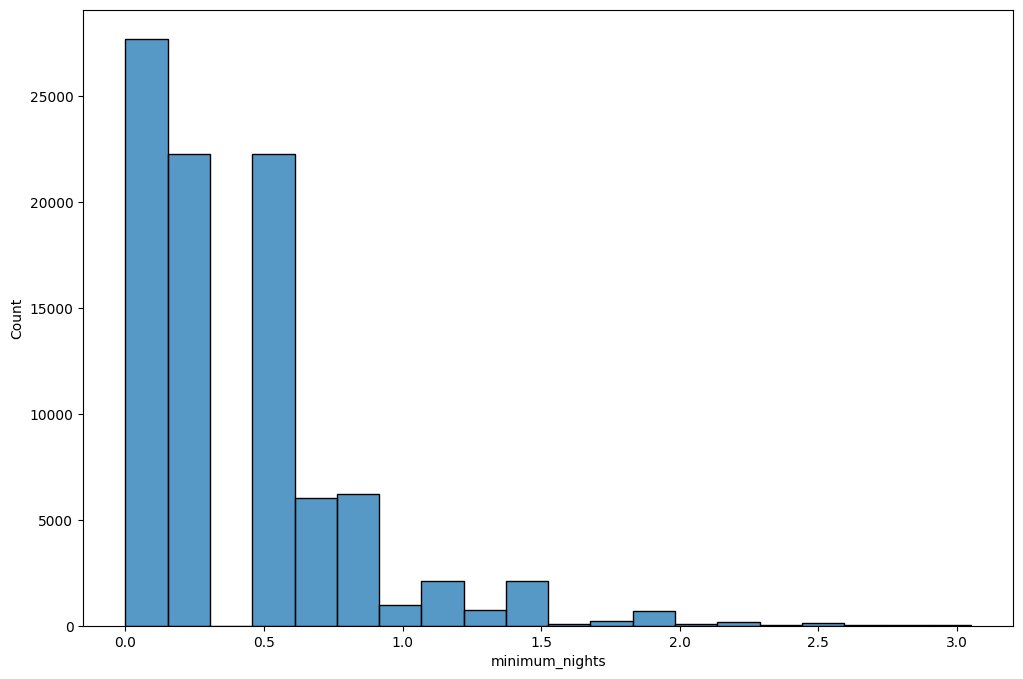

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


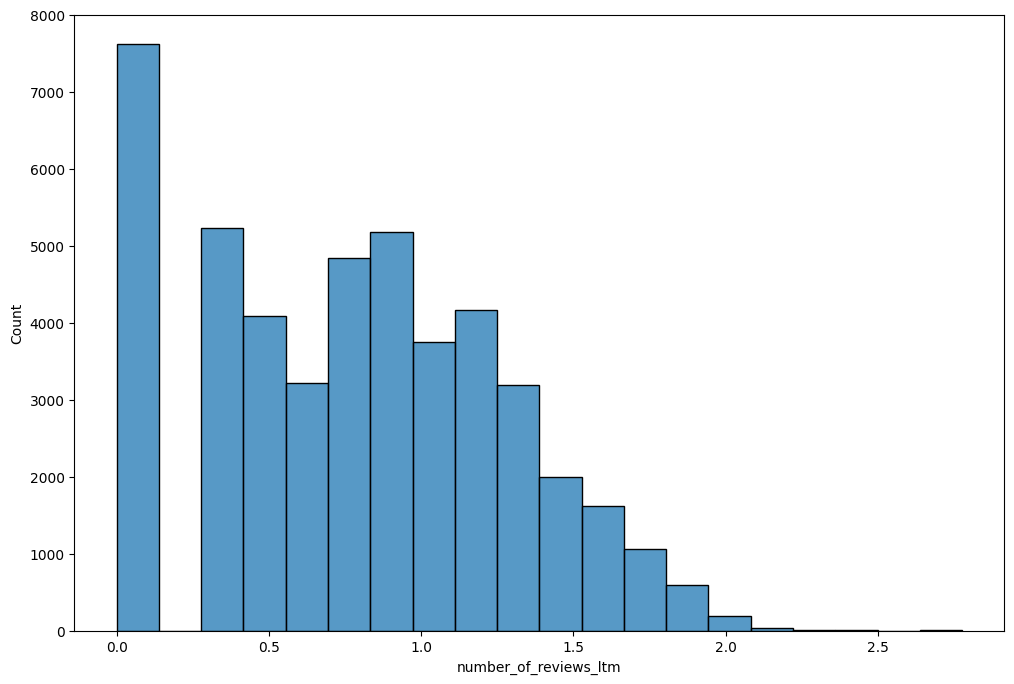

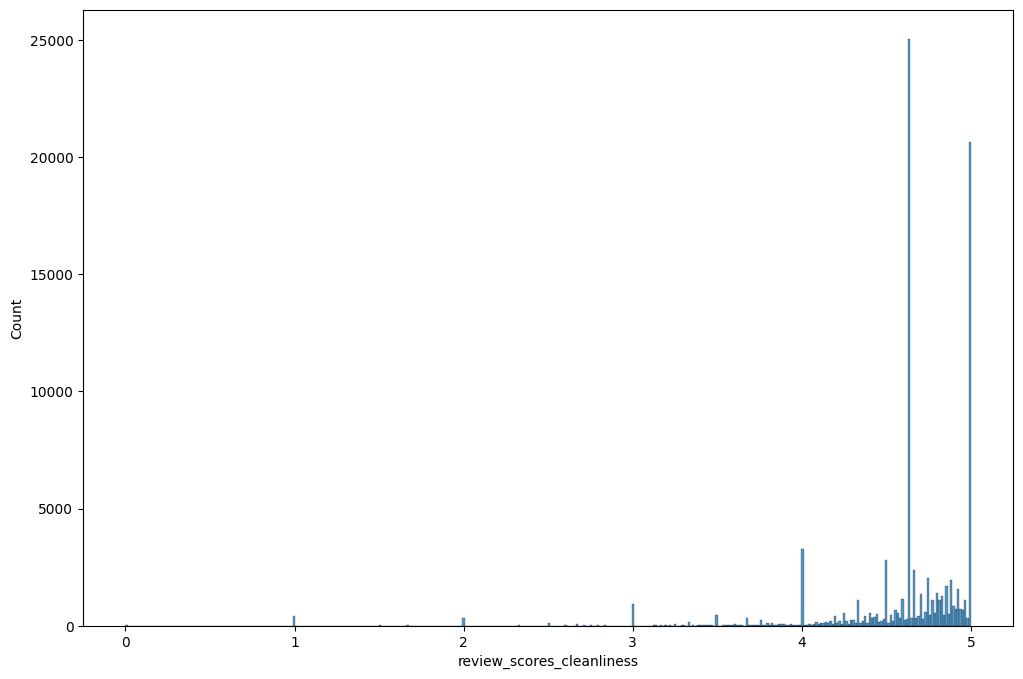

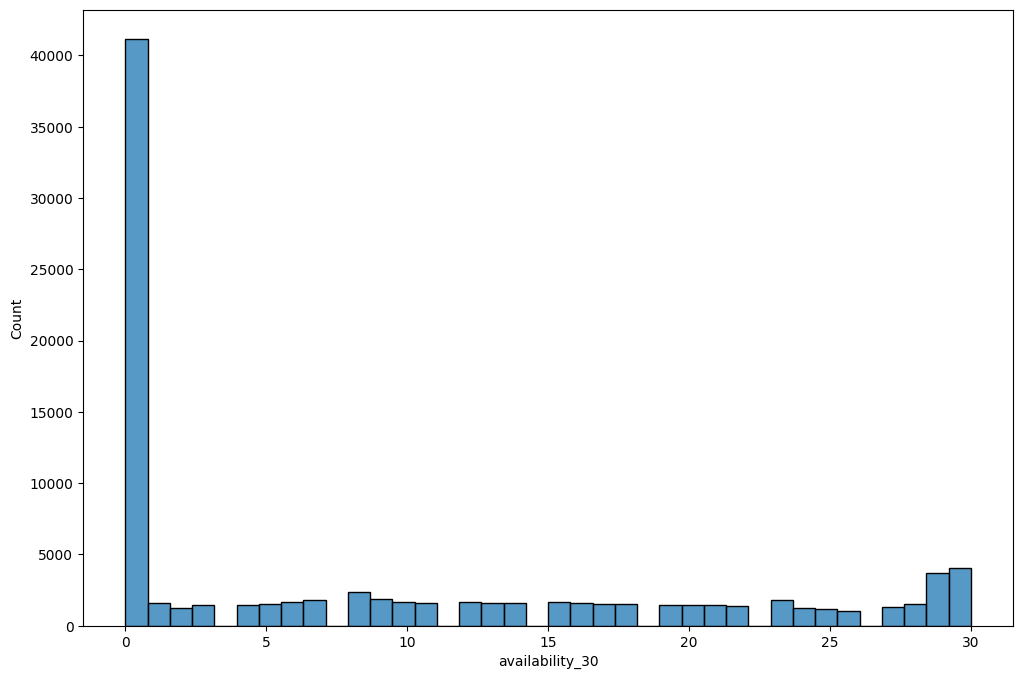

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


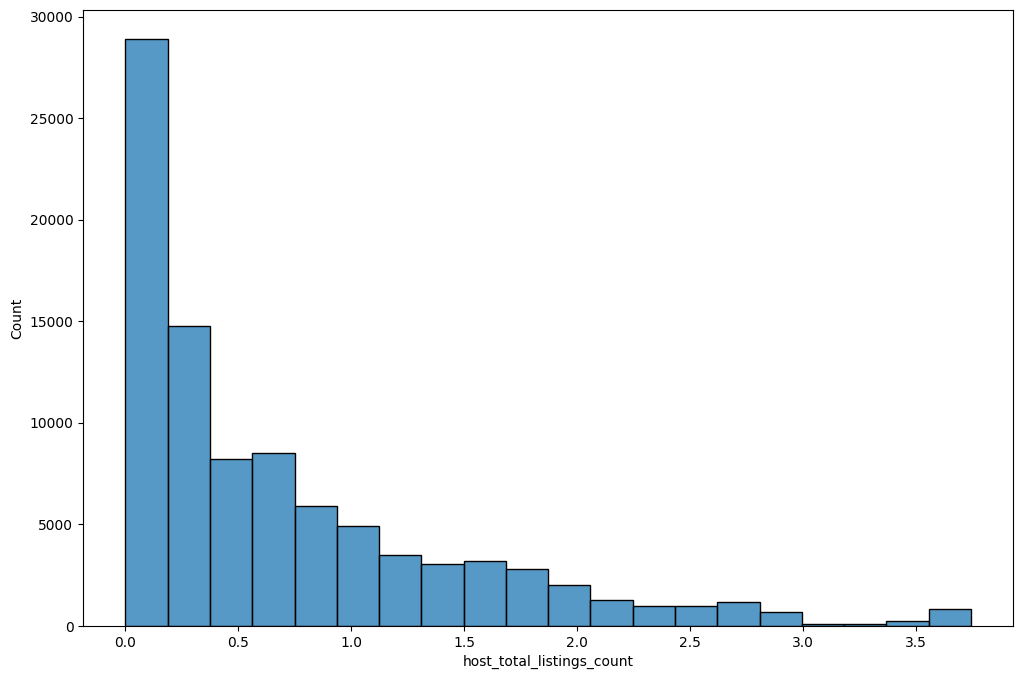

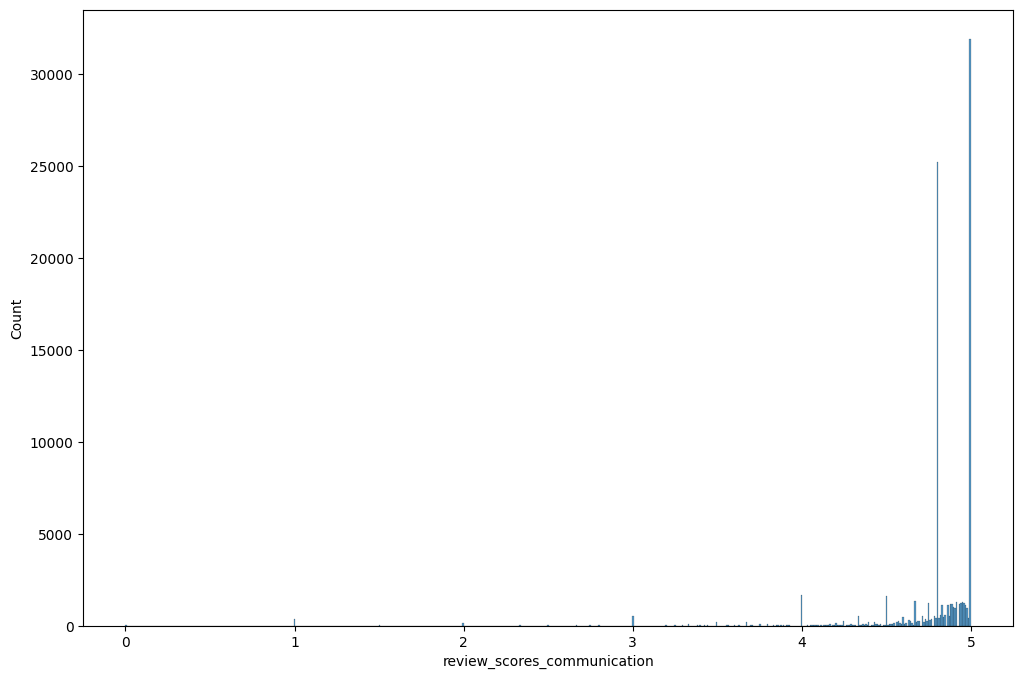

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


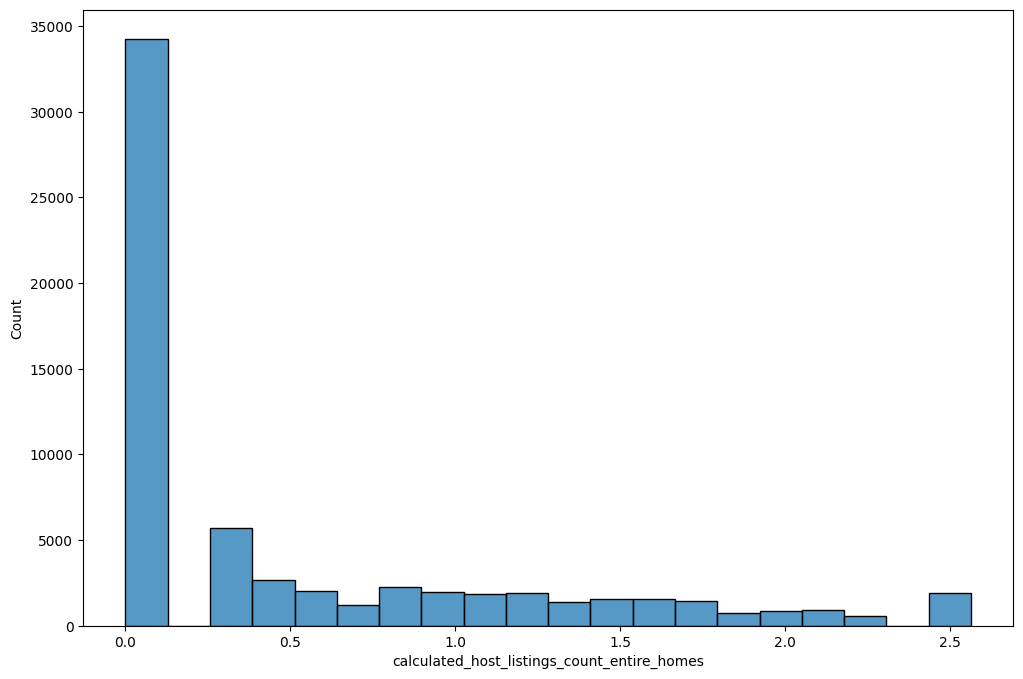

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


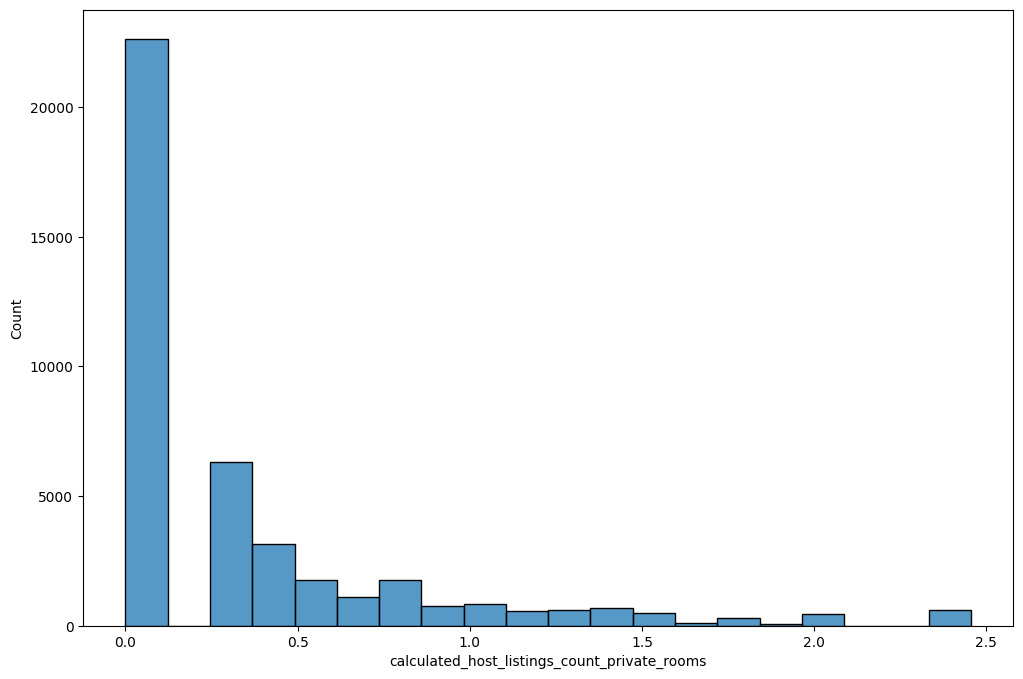

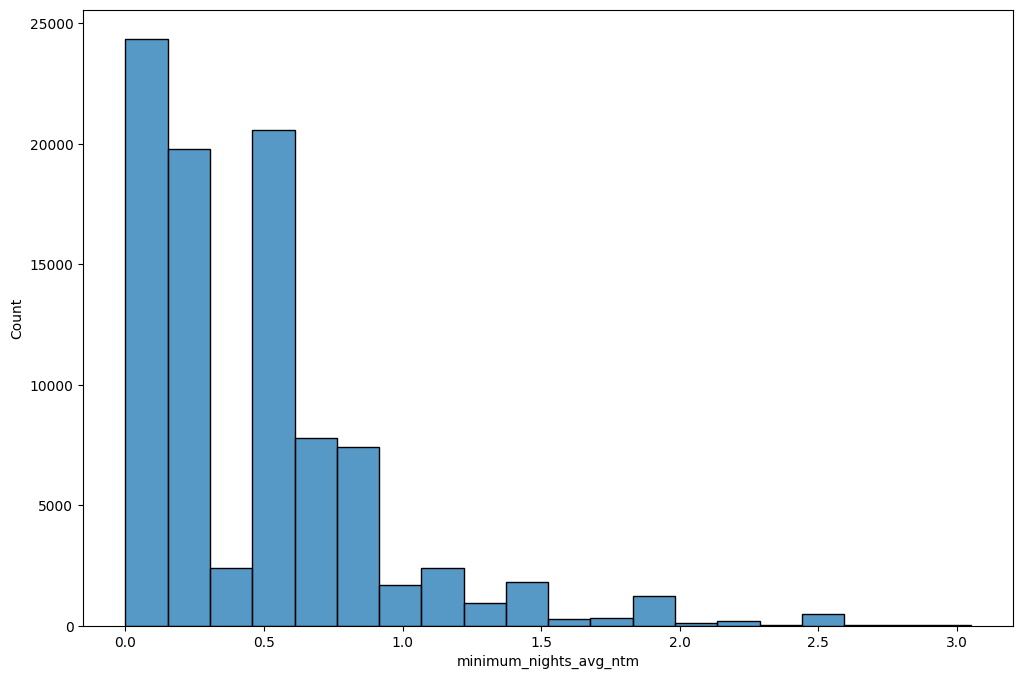

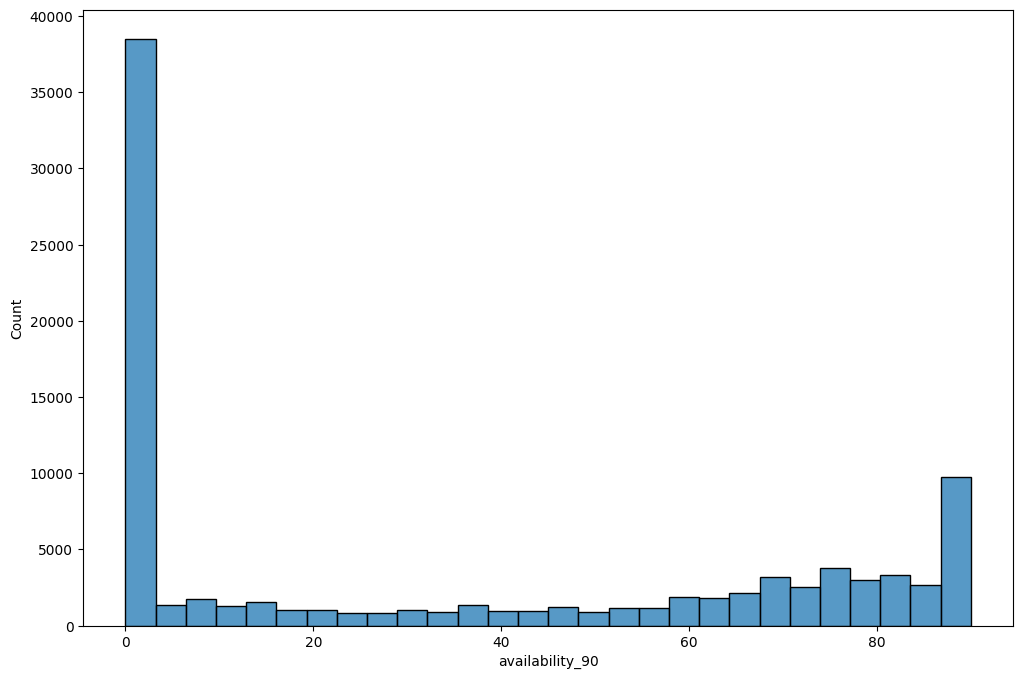

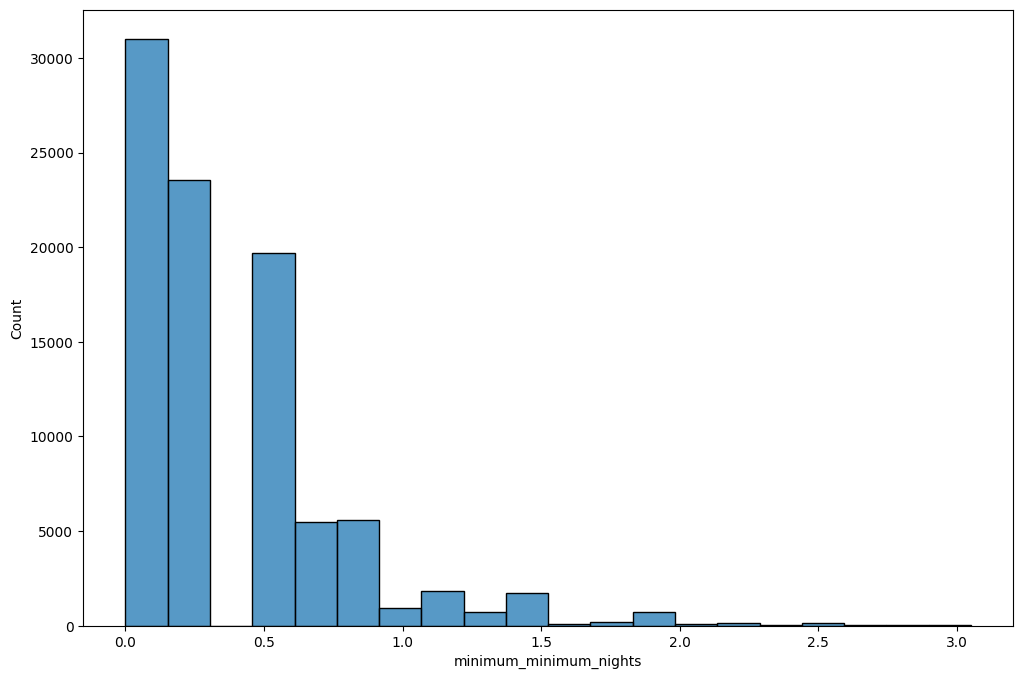

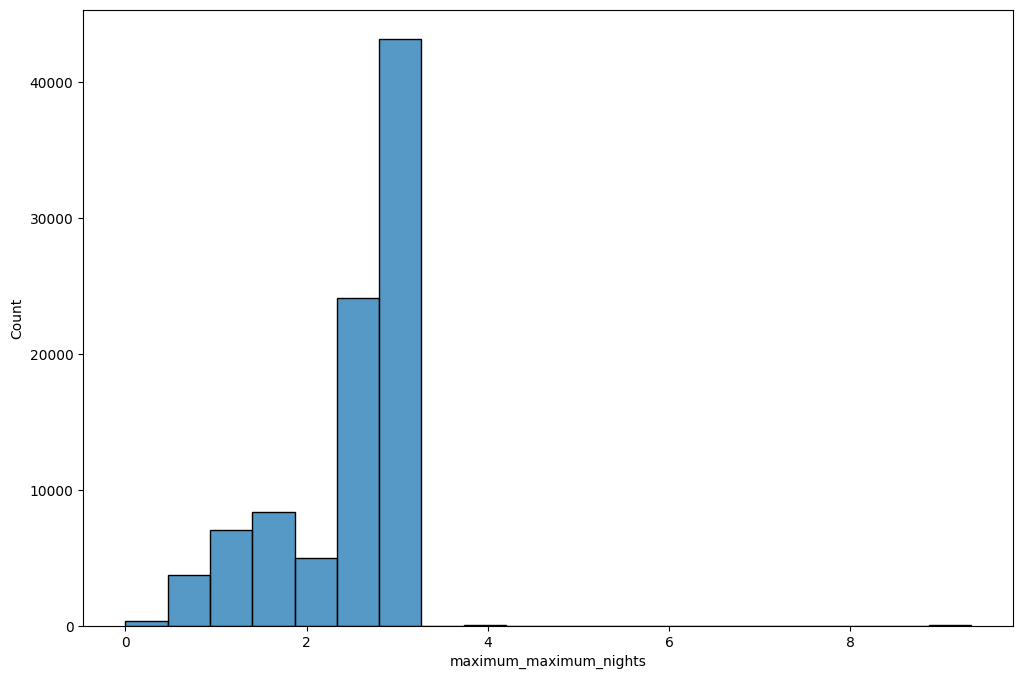

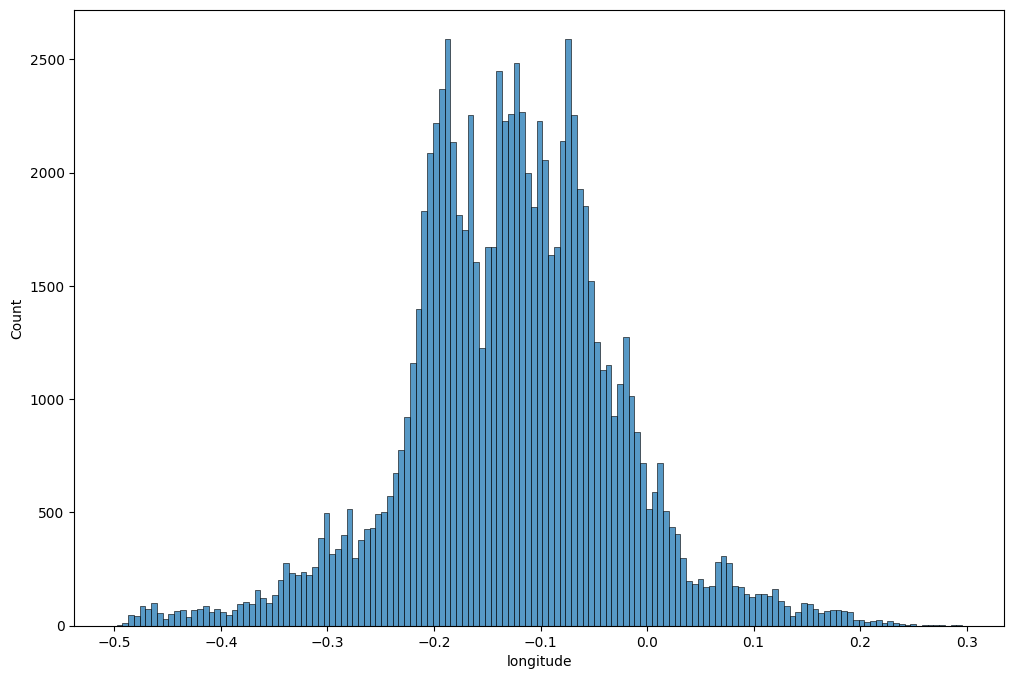

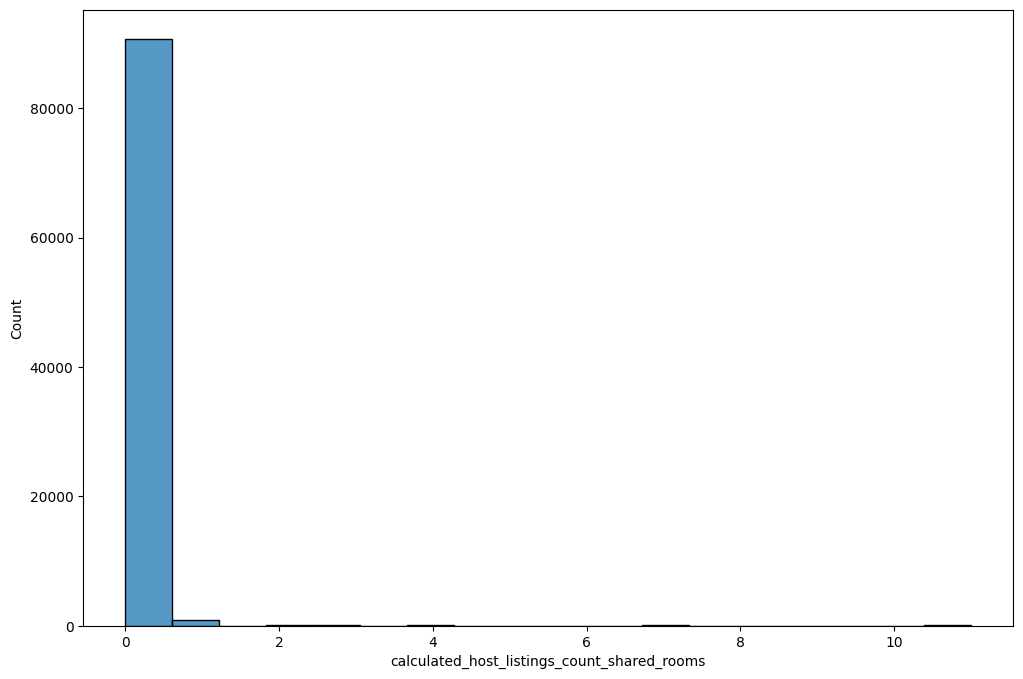

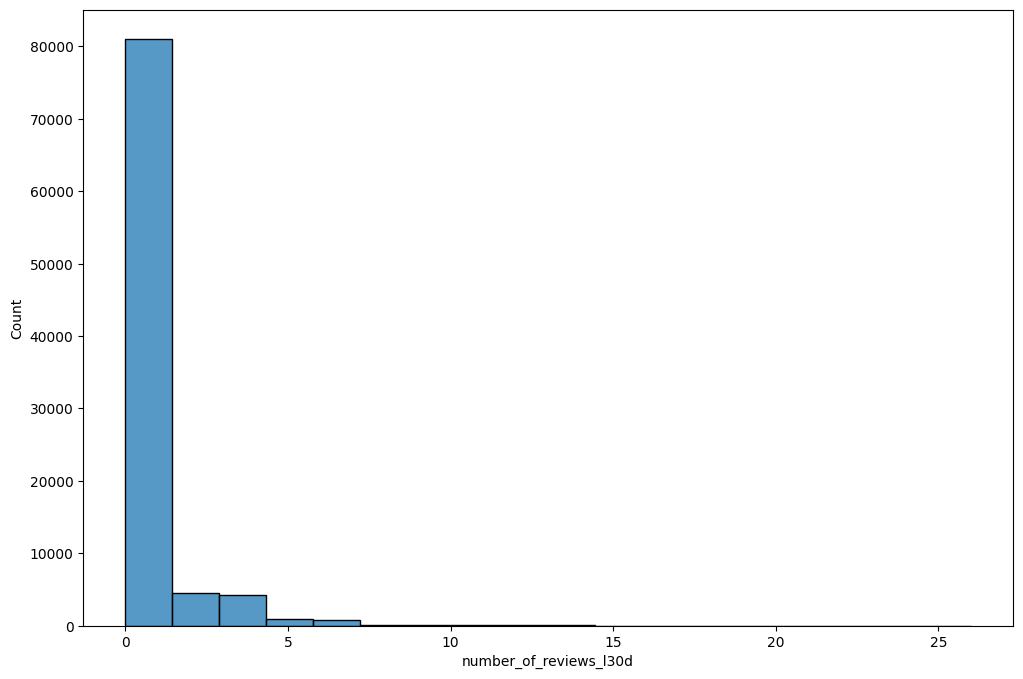

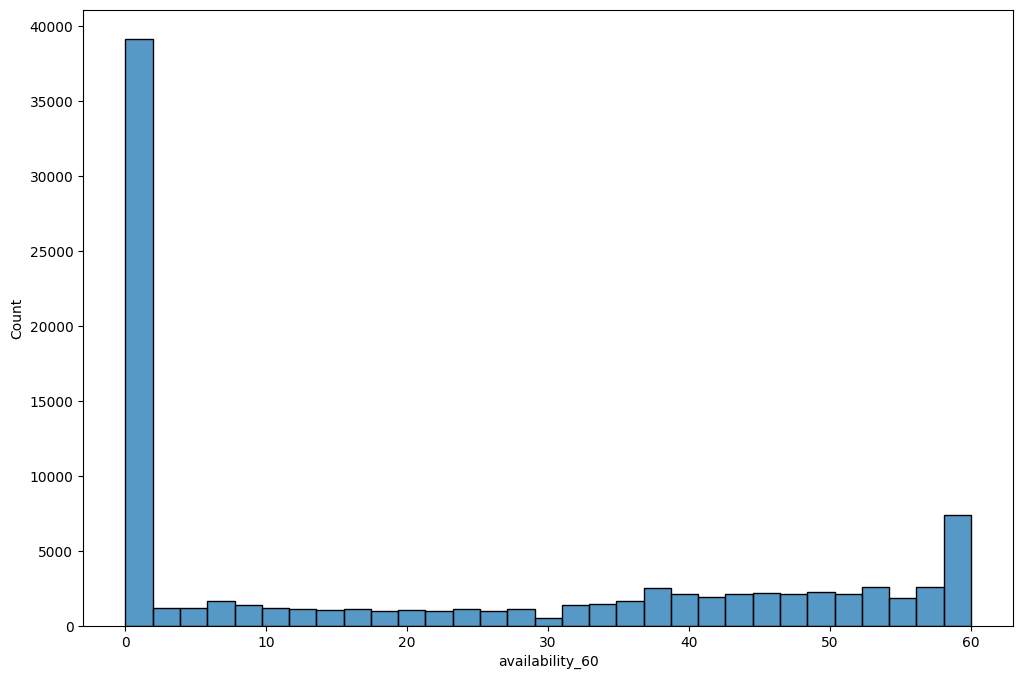

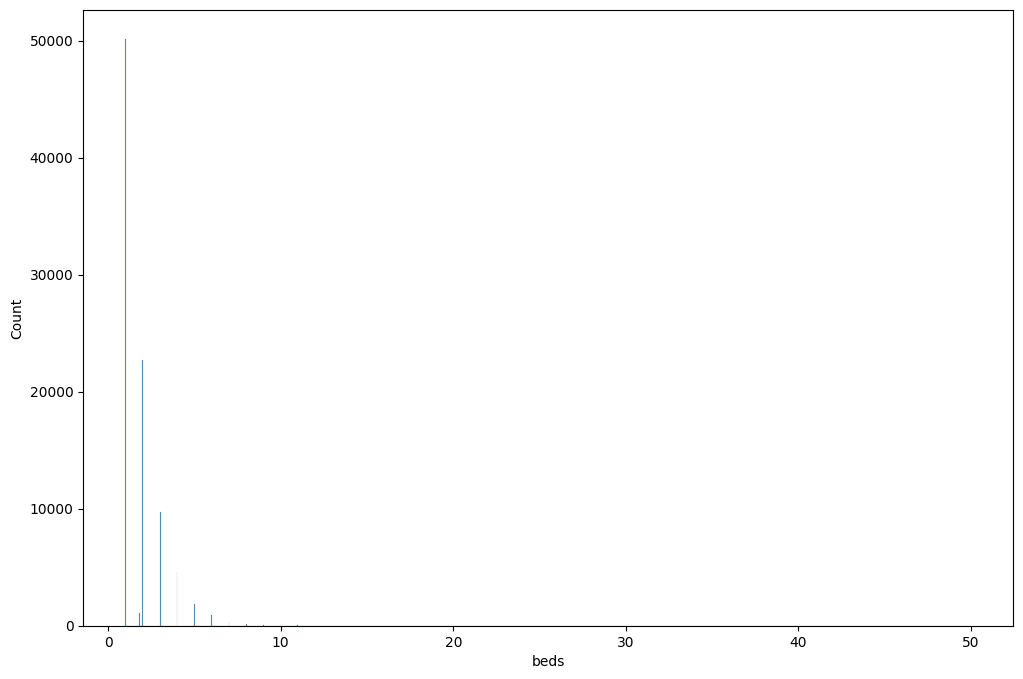

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


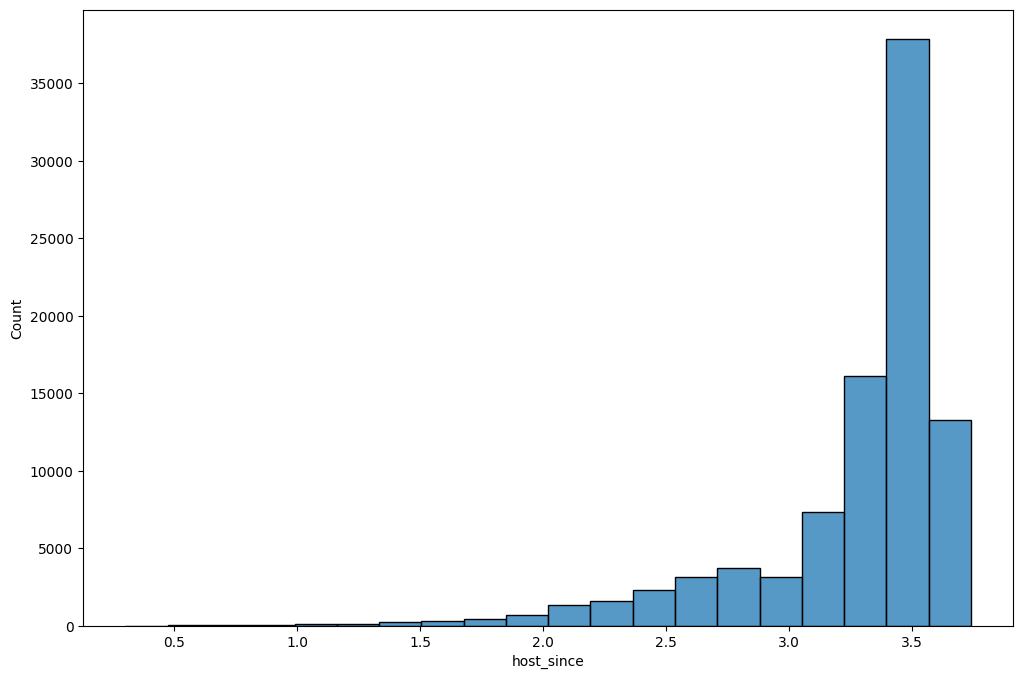

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


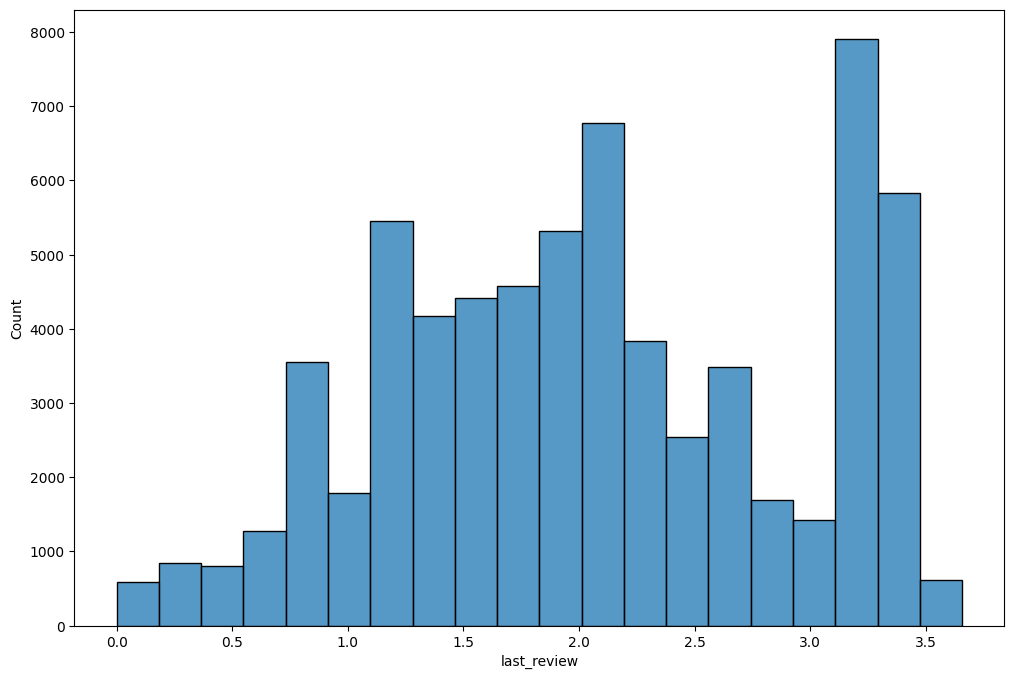

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


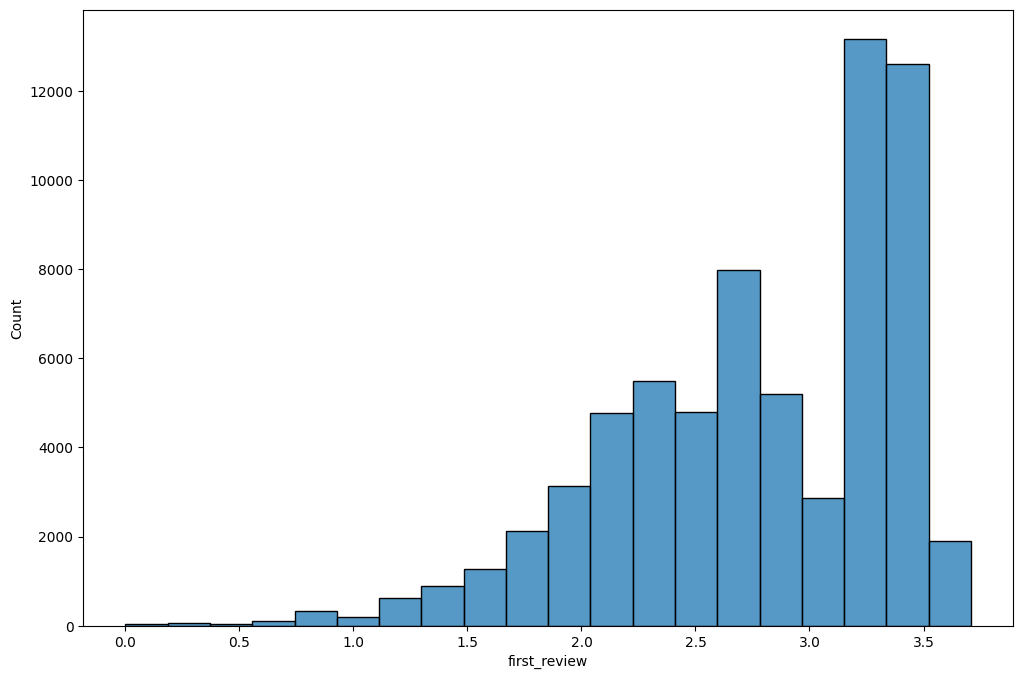

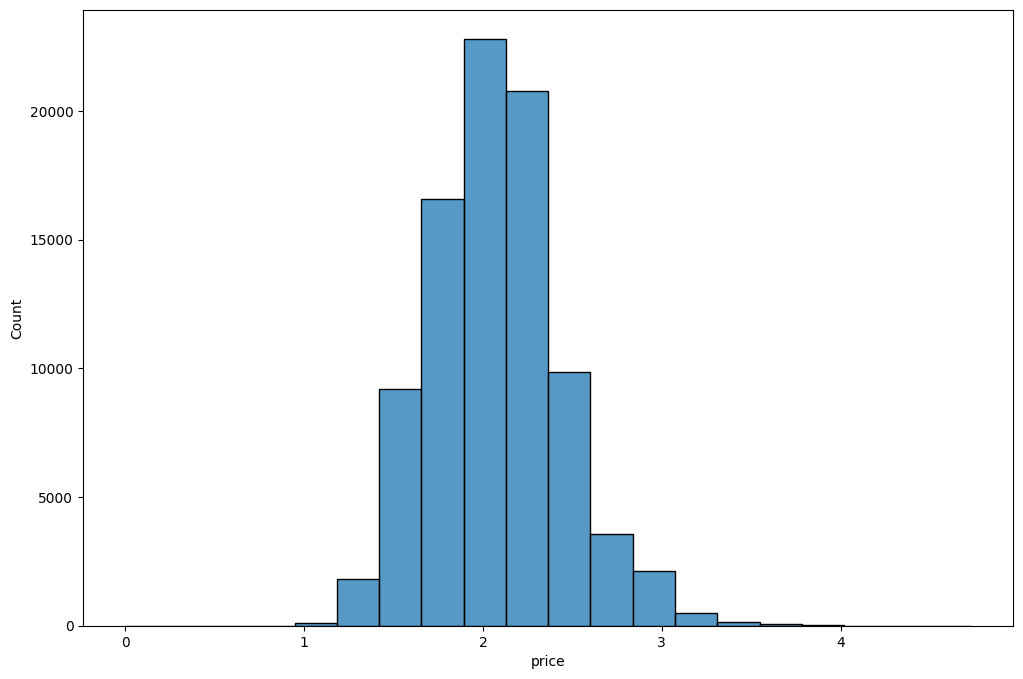

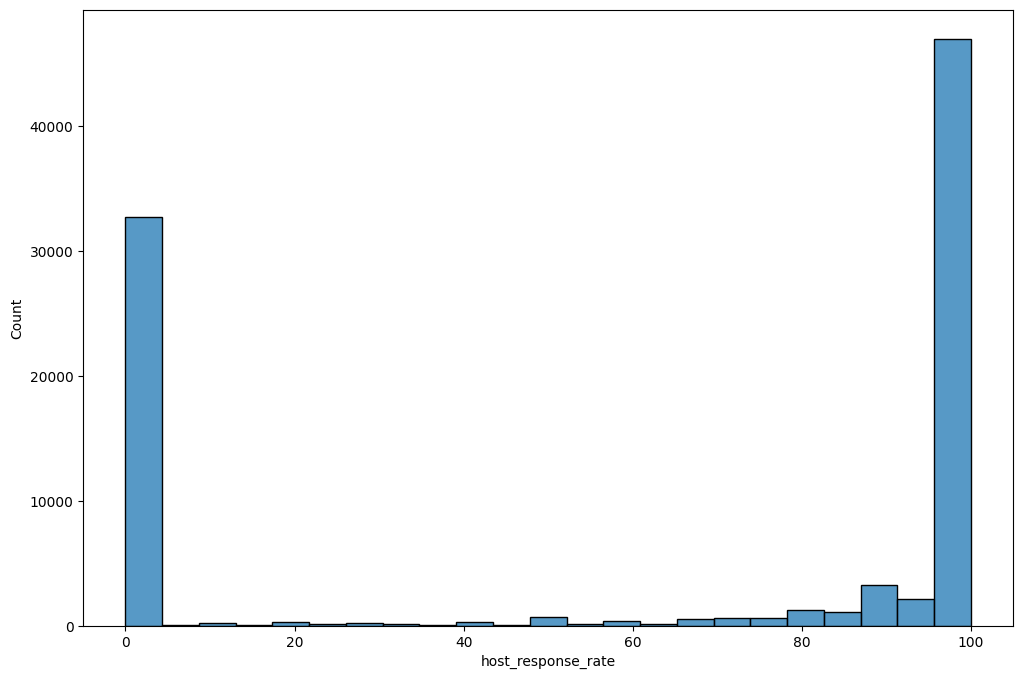

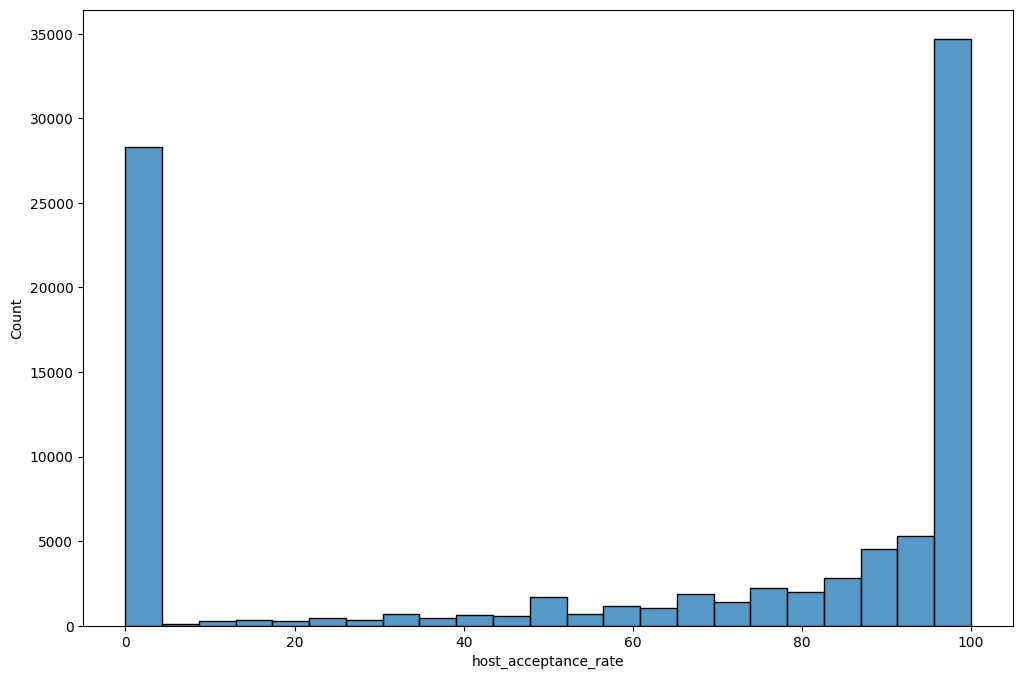

In [17]:
import numpy as np

# histogram : continuous feature
for col in feature_continuous:
    if desc_df.loc['max', col] - desc_df.loc['min', col] >10**2:
        sns.histplot(np.log10(feature_df[col]), bins=20)
    else:
        sns.histplot(feature_df[col])
    plt.show()

Feature 간 상관관계

.corr

In [18]:
# feature list
feature_list = feature_binary + feature_continuous

In [19]:
# 상관계수 계산
feature_df[feature_list].corr()

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,room_entire,room_hotel,room_private,room_shared,response_3d,...,calculated_host_listings_count_shared_rooms,number_of_reviews_l30d,availability_60,beds,host_since,last_review,first_review,price,host_response_rate,host_acceptance_rate
host_is_superhost,1.000000,0.047575,0.133665,0.215335,-0.020598,-0.031297,-0.018409,0.035353,-0.015093,-0.082088,...,0.002924,0.210760,0.082082,0.000086,0.052469,-0.175756,0.063237,-0.011984,0.311330,0.314056
host_has_profile_pic,0.047575,1.000000,0.044941,-0.074840,-0.002479,0.025572,0.001209,-0.025885,0.000687,-0.062023,...,0.008559,0.012436,-0.119280,0.008399,0.271412,0.081572,0.129003,0.004915,0.000113,0.010702
host_identity_verified,0.133665,0.044941,1.000000,0.244677,0.101872,0.094378,0.011390,-0.092121,-0.026263,0.017848,...,-0.011079,0.101644,0.147284,0.059015,0.025931,-0.113824,0.017222,0.036757,0.263523,0.277036
has_availability,0.215335,-0.074840,0.244677,1.000000,0.109676,0.106152,0.024487,-0.107121,-0.012843,0.024306,...,0.021097,0.248169,0.595660,0.114689,-0.236903,-0.511451,-0.241636,0.082171,0.688744,0.623043
instant_bookable,-0.020598,-0.002479,0.101872,0.109676,1.000000,0.053122,0.036502,-0.057168,0.002018,-0.044930,...,0.044448,0.075651,0.097891,0.052861,-0.183429,-0.093036,-0.133801,0.052412,0.153636,0.247625
room_entire,-0.031297,0.025572,0.094378,0.106152,0.053122,1.000000,-0.060841,-0.985286,-0.088865,-0.038085,...,-0.063619,-0.045941,0.020786,0.370630,-0.010470,-0.058844,-0.067695,0.162086,0.139074,0.148576
room_hotel,-0.018409,0.001209,0.011390,0.024487,0.036502,-0.060841,1.000000,-0.035899,-0.003238,0.023805,...,0.000165,-0.006118,0.020601,-0.007895,0.002004,0.000869,0.023386,0.010412,0.007729,0.013076
room_private,0.035353,-0.025885,-0.092121,-0.107121,-0.057168,-0.985286,-0.035899,1.000000,-0.052435,0.035565,...,-0.014219,0.045530,-0.024890,-0.373698,0.012746,0.059681,0.067438,-0.162598,-0.137295,-0.146614
room_shared,-0.015093,0.000687,-0.026263,-0.012843,0.002018,-0.088865,-0.003238,-0.052435,1.000000,0.002443,...,0.549920,0.008336,0.014211,0.017029,-0.017125,-0.004908,-0.012416,-0.008476,-0.021590,-0.026800
response_3d,-0.082088,-0.062023,0.017848,0.024306,-0.044930,-0.038085,0.023805,0.035565,0.002443,1.000000,...,-0.001167,-0.073978,0.072743,-0.036094,-0.074751,-0.050732,-0.089606,0.117122,-0.211187,-0.048962


히트맵 시각화

<Axes: >

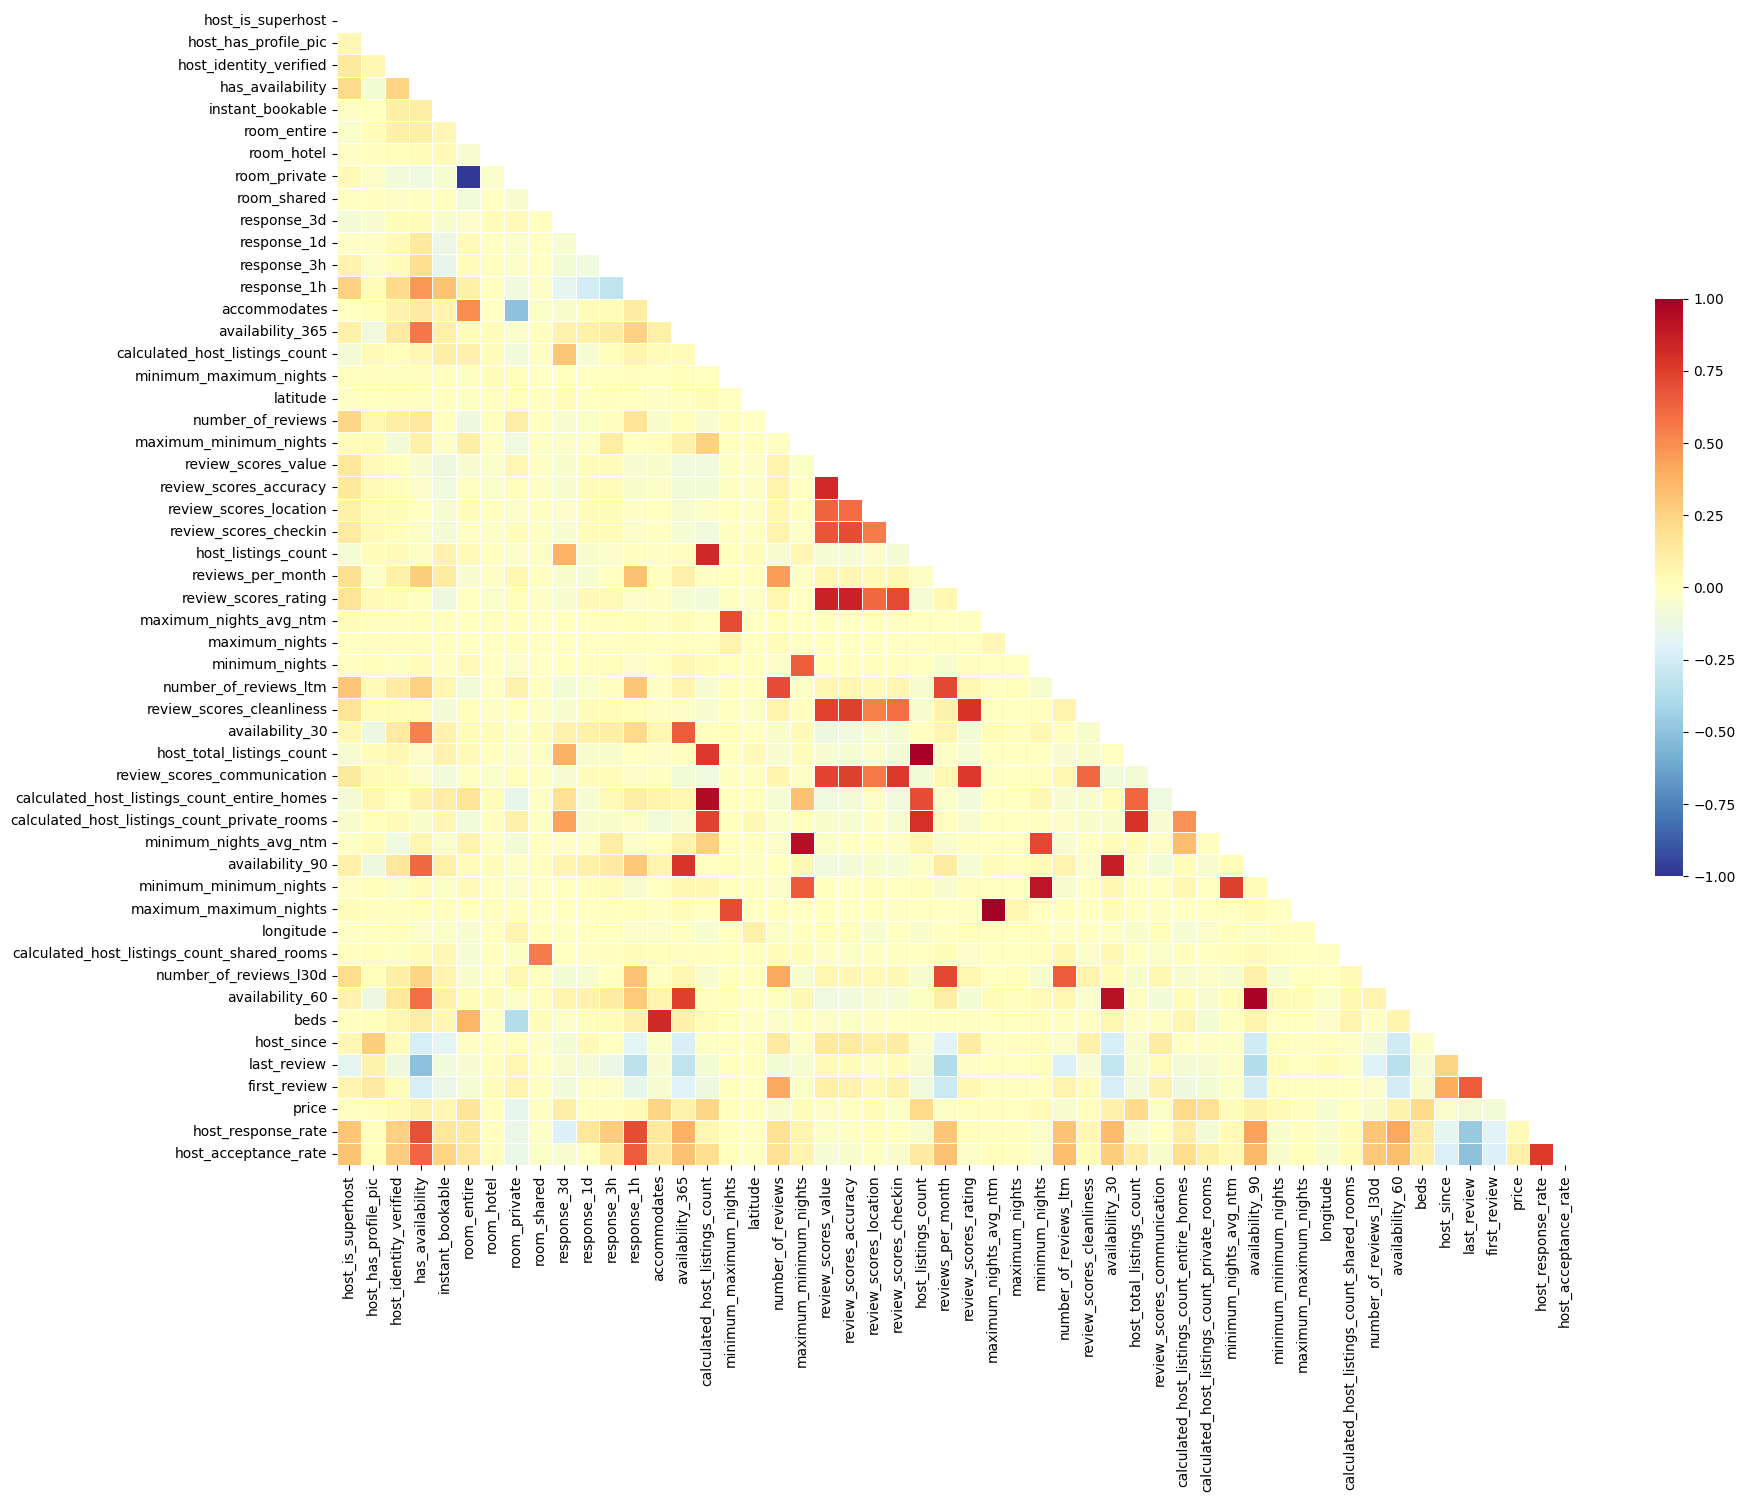

In [29]:
corr_df = feature_df[feature_list].corr()

# 그림 사이즈 지정
fig, ax = plt.subplots(figsize = (20, 15))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr_df, dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True #파일 절반 자르기

# 히트맵을 그린다
sns.heatmap(corr_df,
            cmap = 'RdYlBu_r',
            annot = False, #실제값을 표시한다
            mask = mask, #표시하지 않을 마스크 부분을 지정한다
            linewidths = .5, # 경계면 실선으로 구분하기
            cbar_kws={'shrink': .5}, # 컬러바 크기 절반으로 줄이기
            vmin = -1, vmax = 1)

종속변수와의 상관관계

binary feature

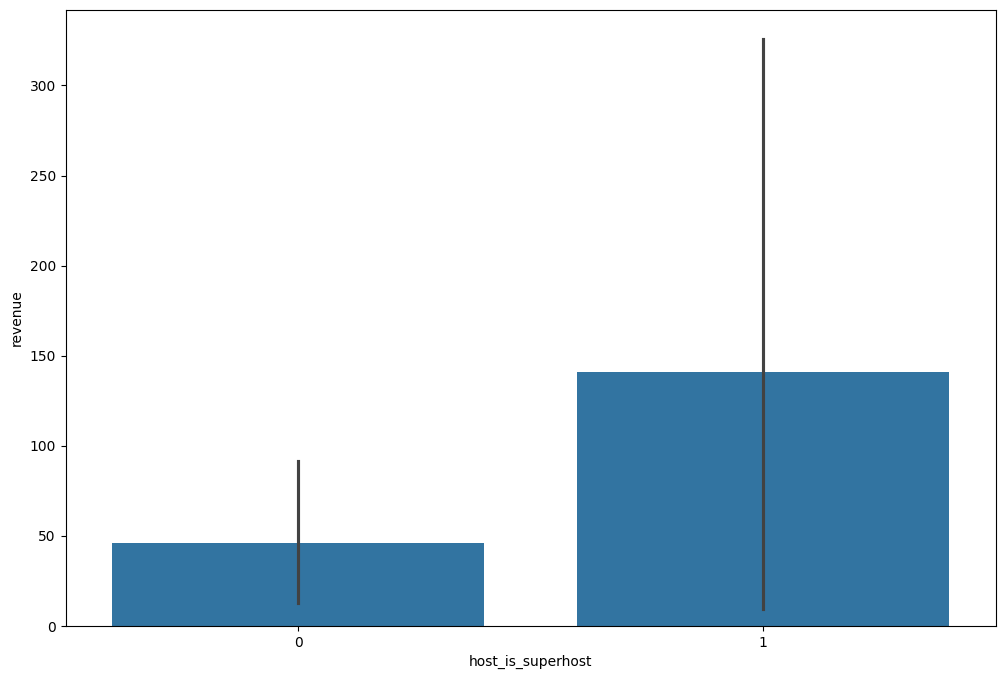

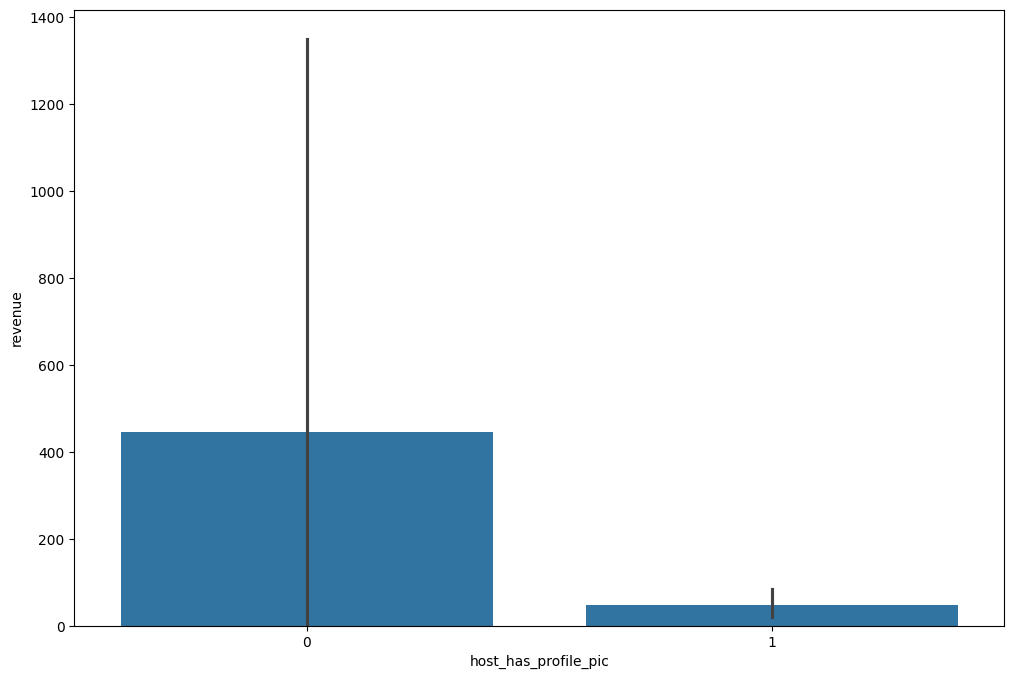

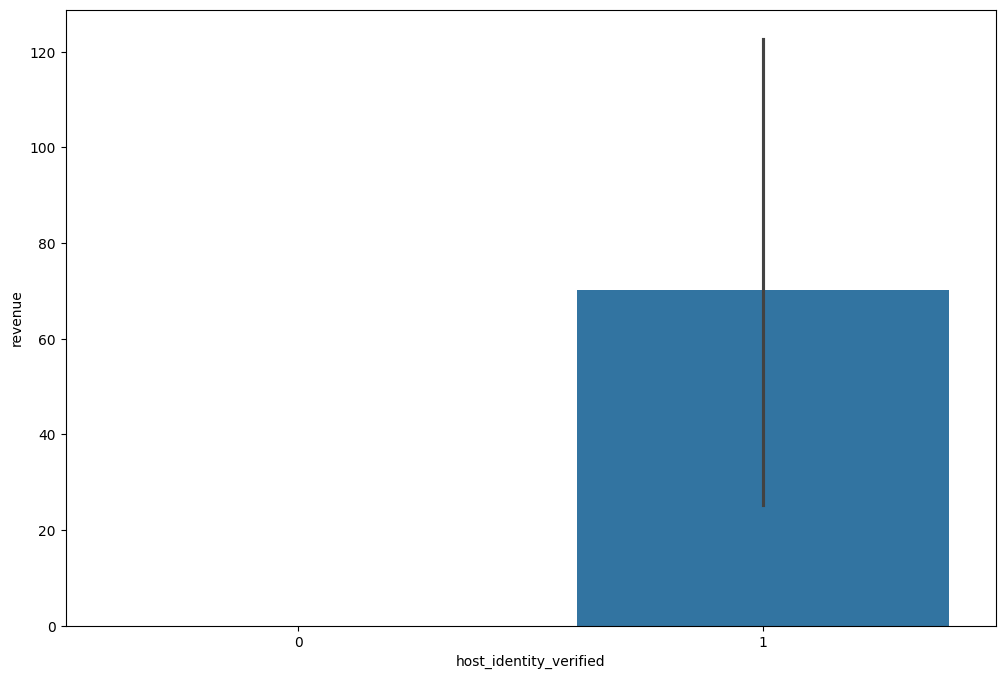

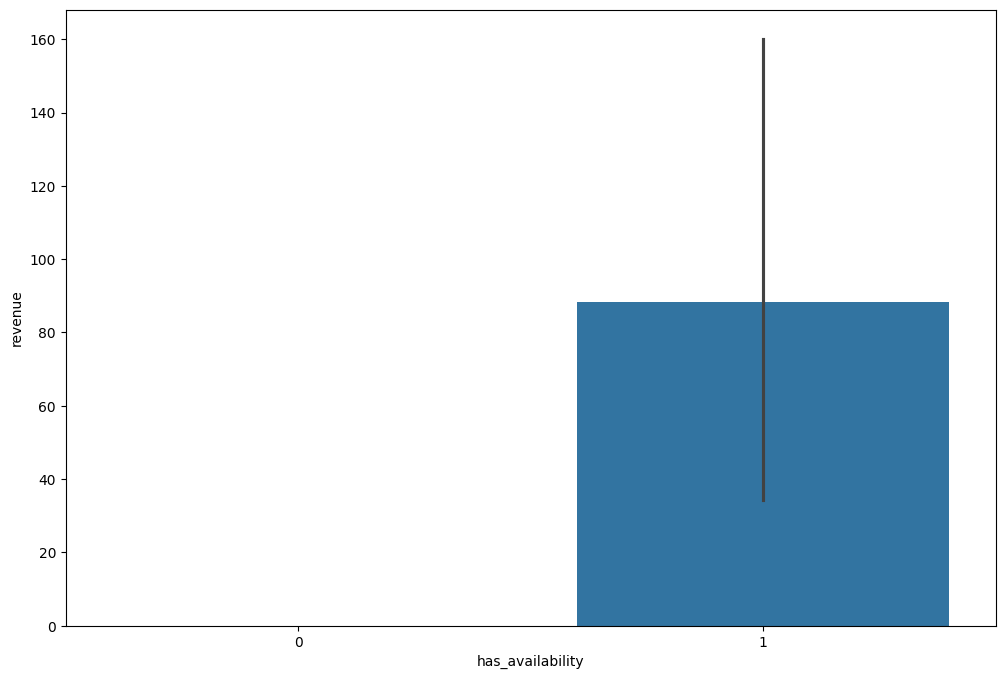

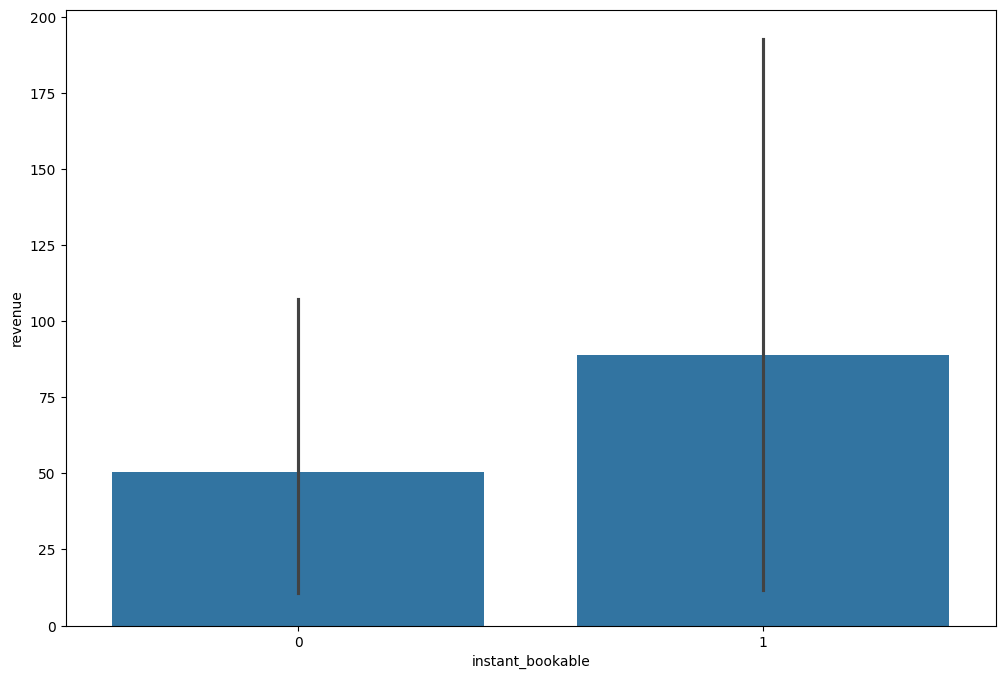

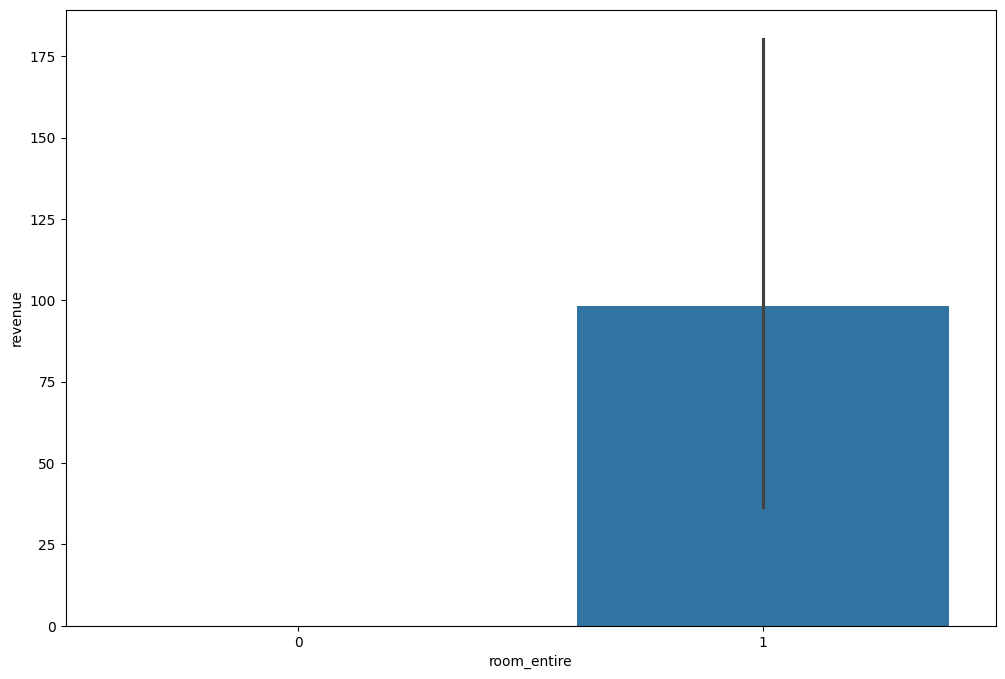

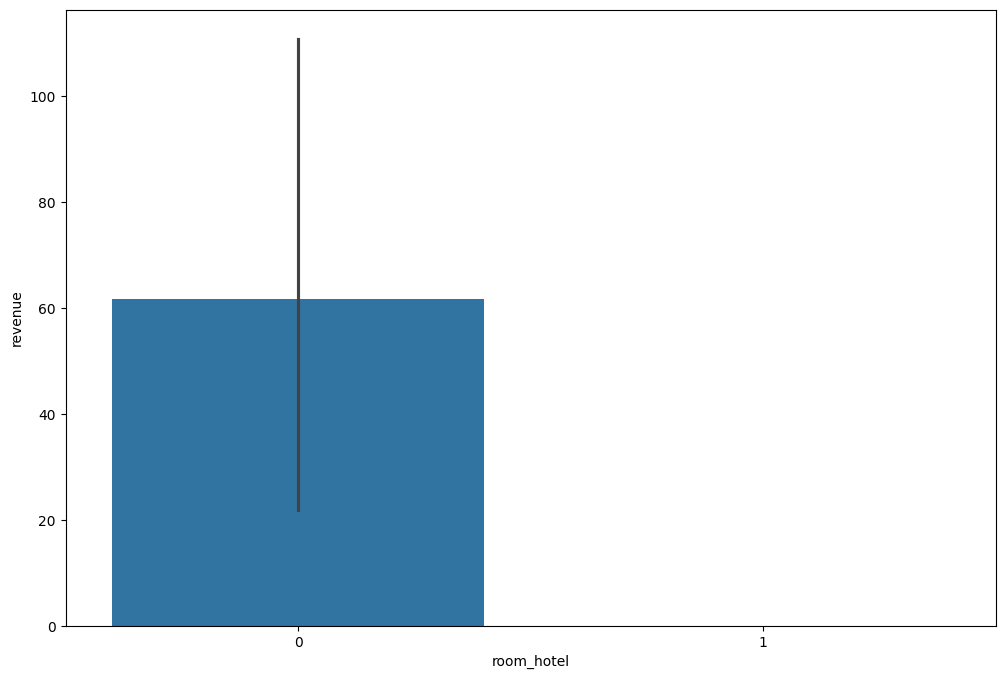

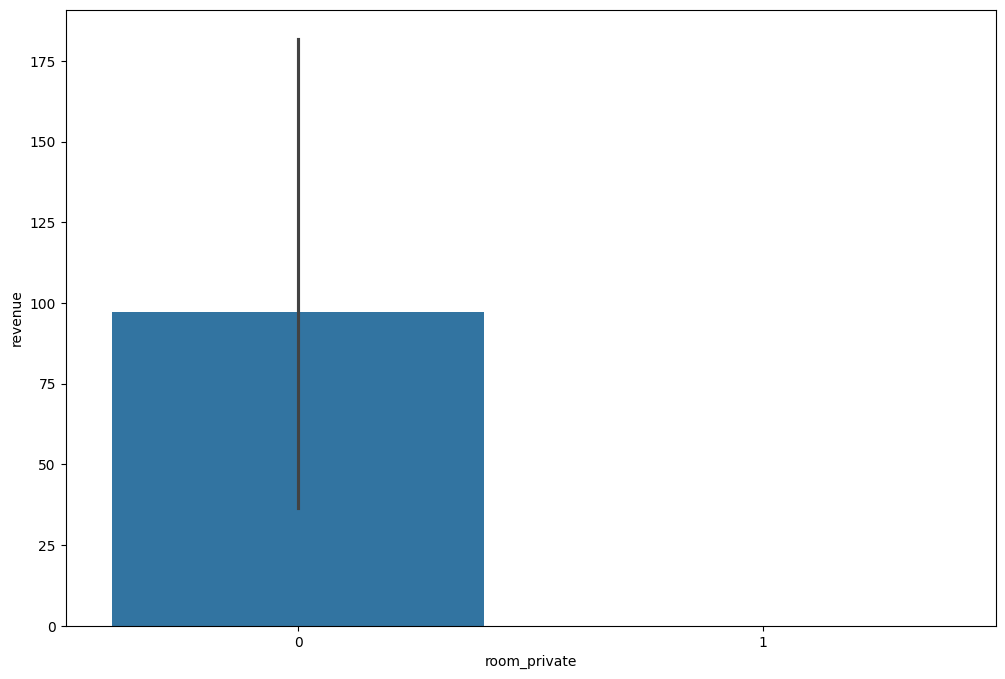

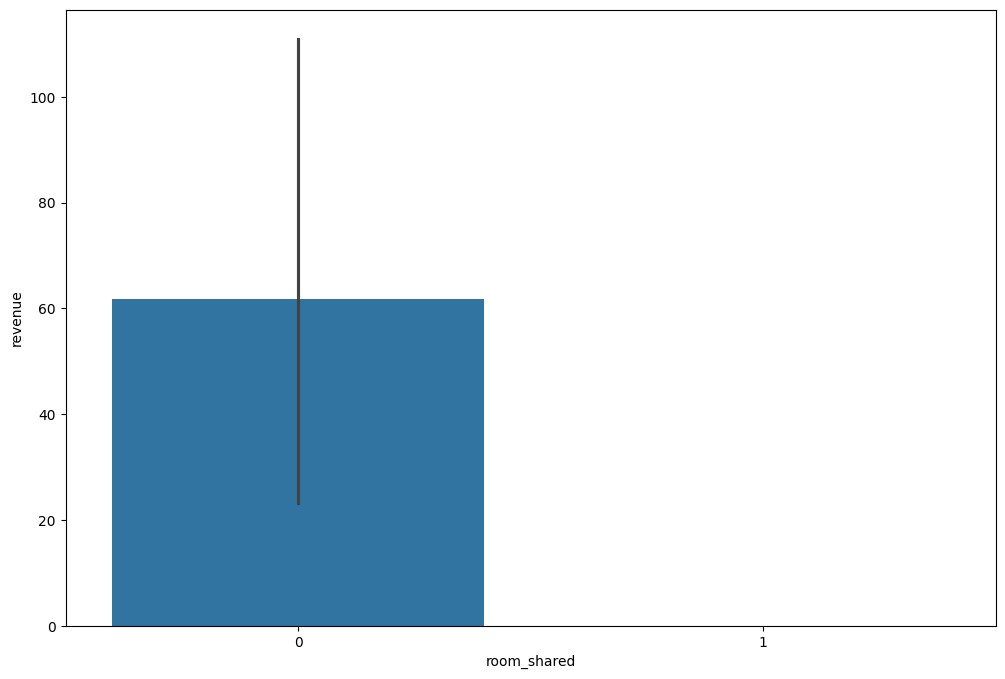

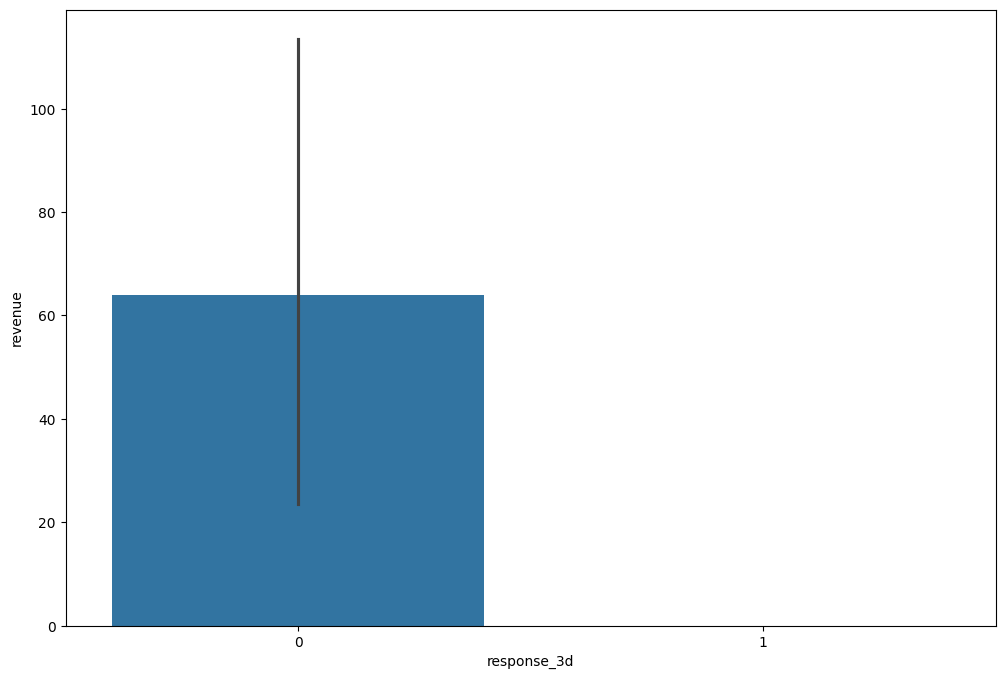

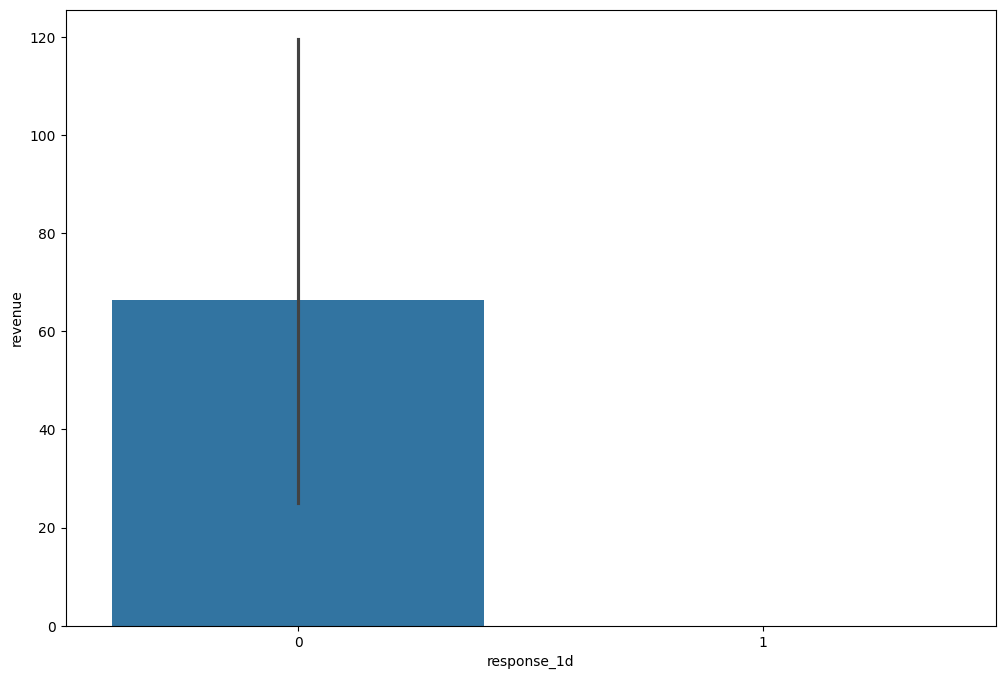

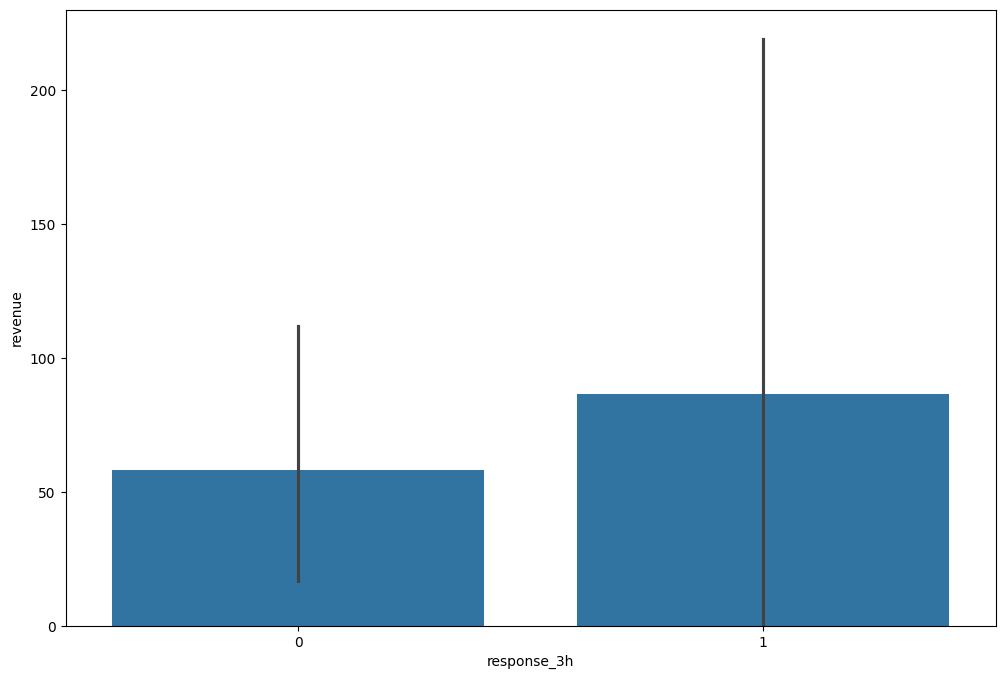

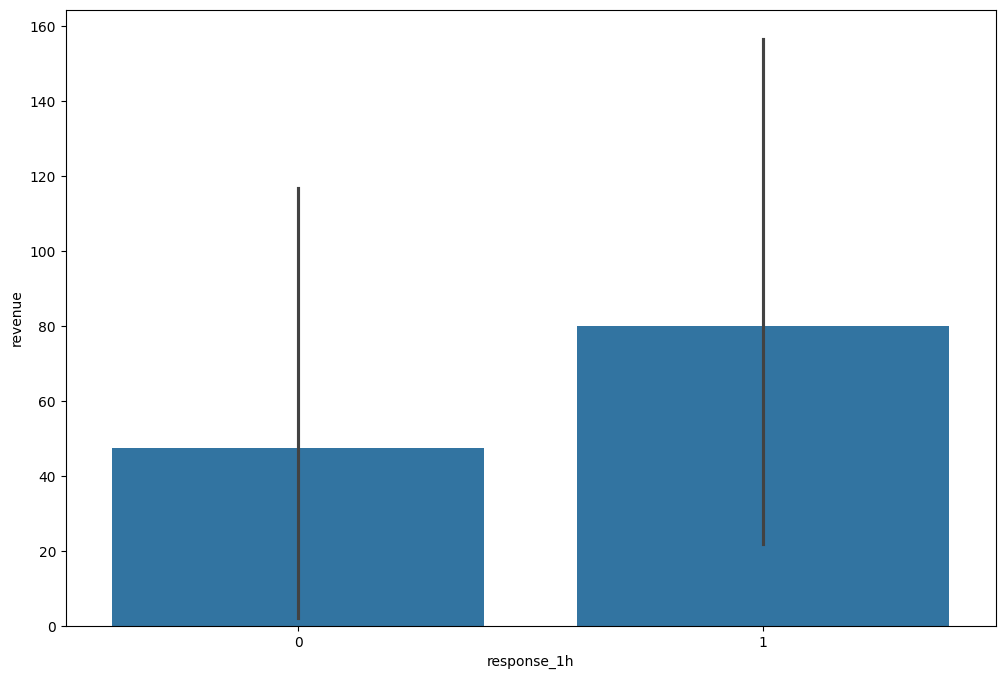

In [30]:
# bar plot
for col in feature_binary:
    sns.barplot(data= feature_df,
                x = col,
                y = 'revenue')
    plt.show()

continuous feature

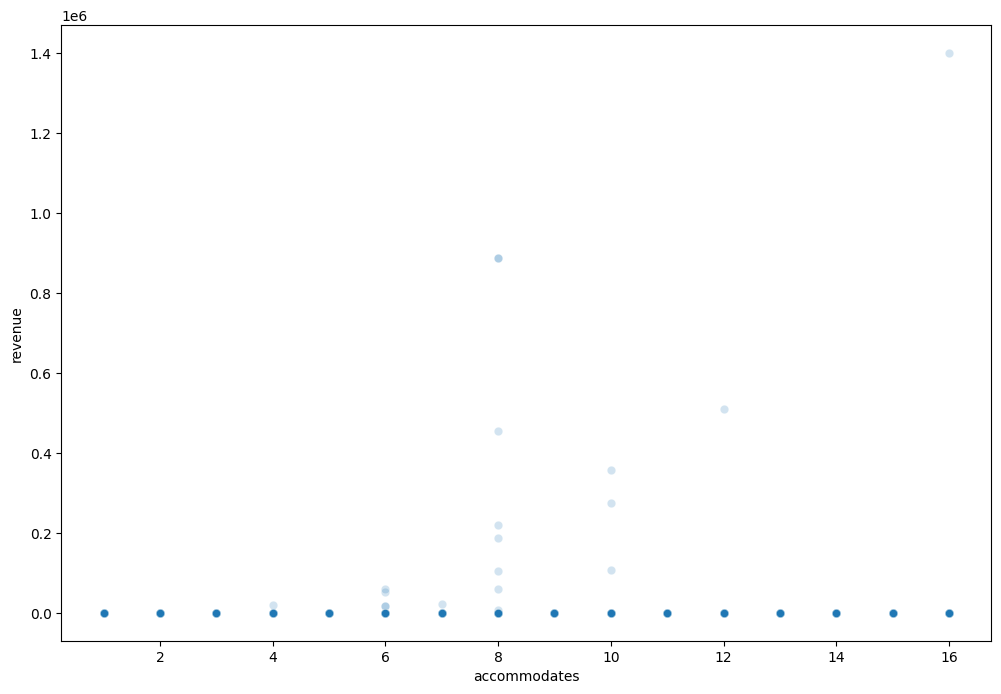

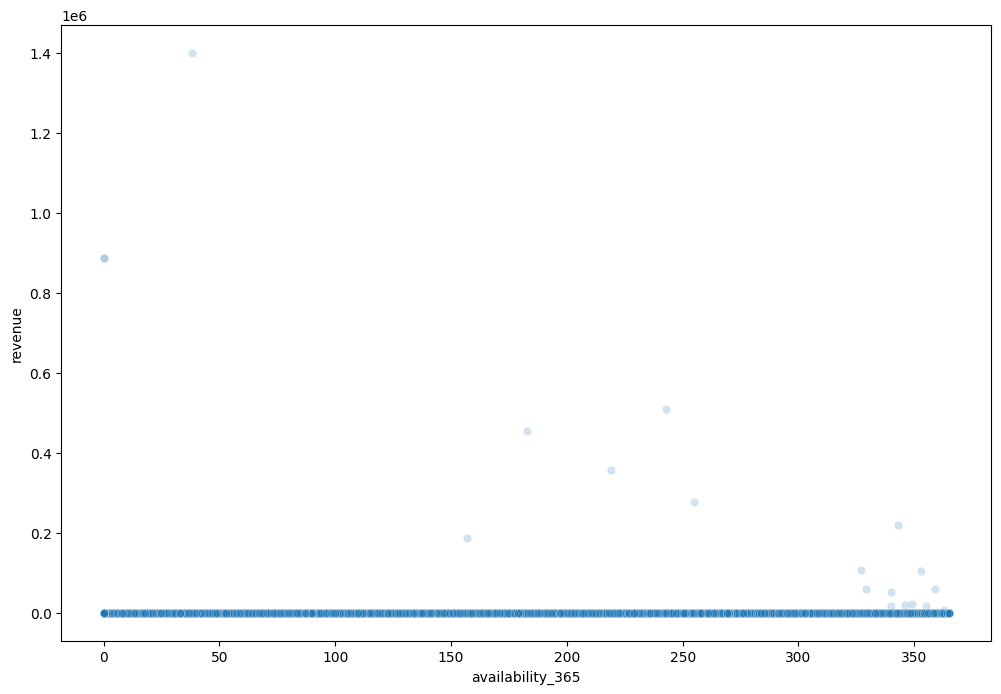

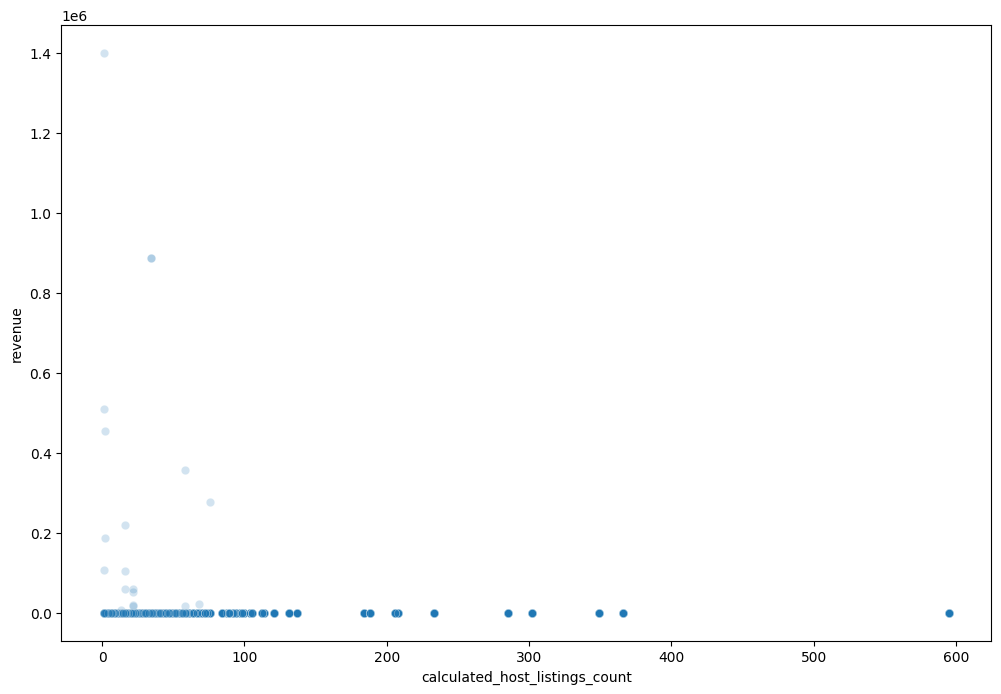

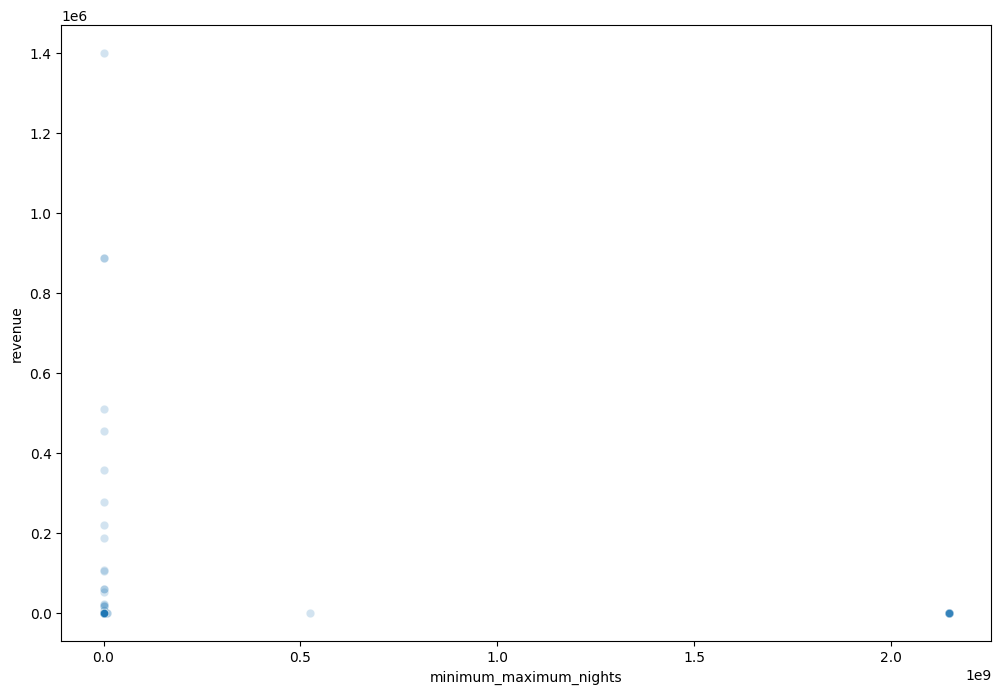

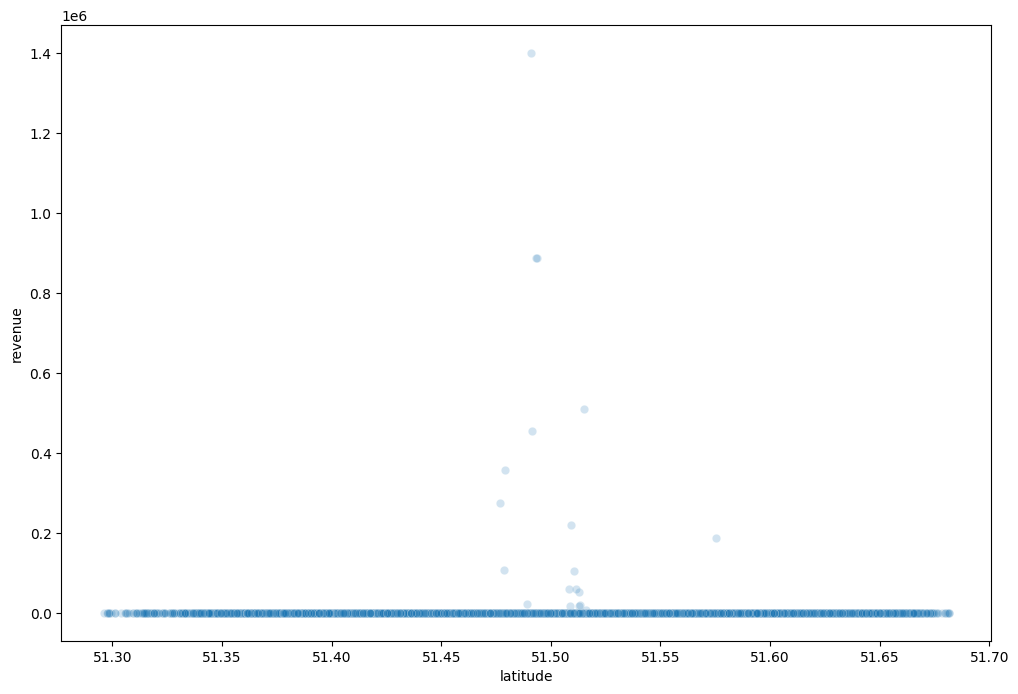

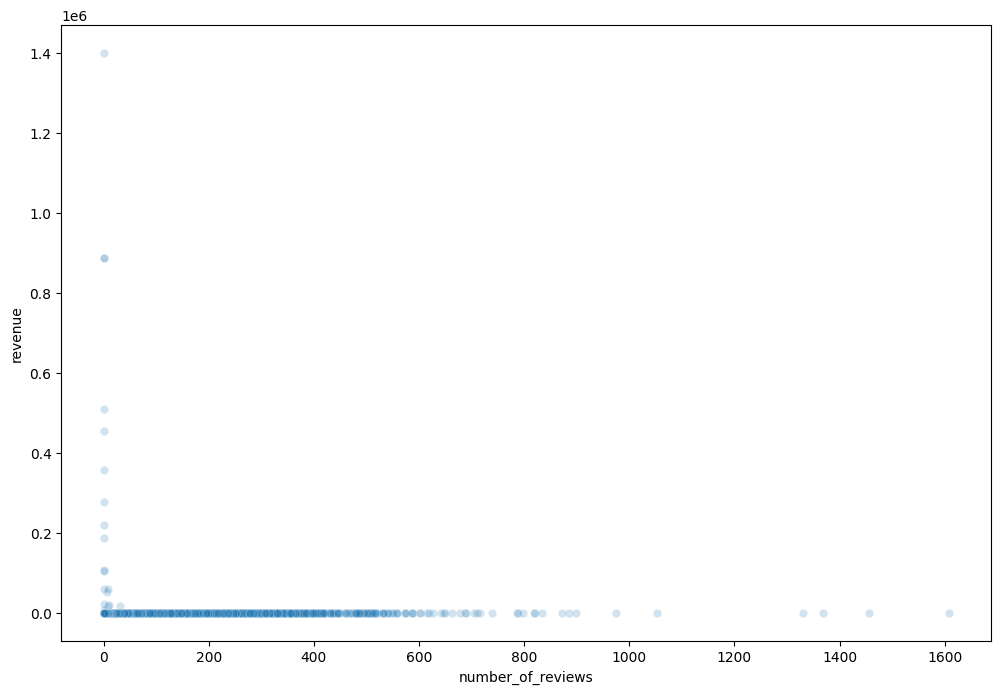

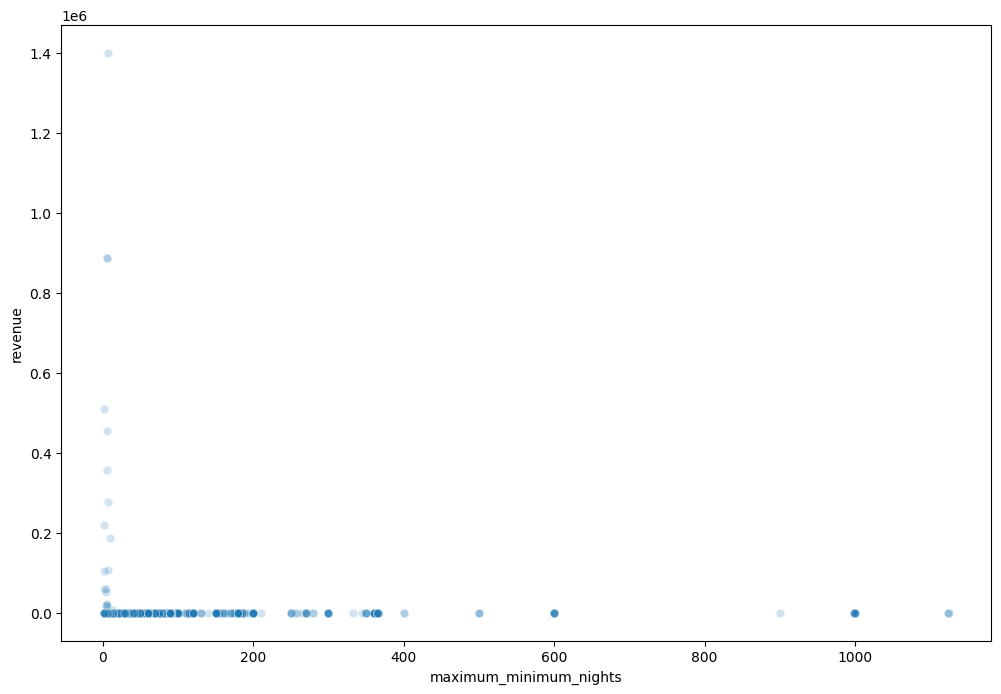

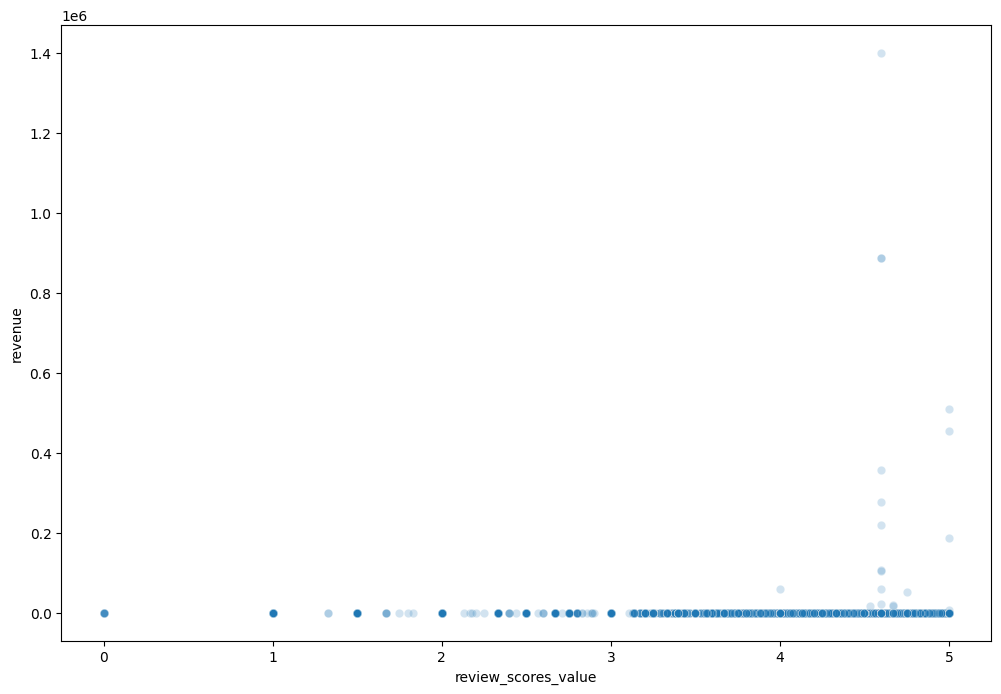

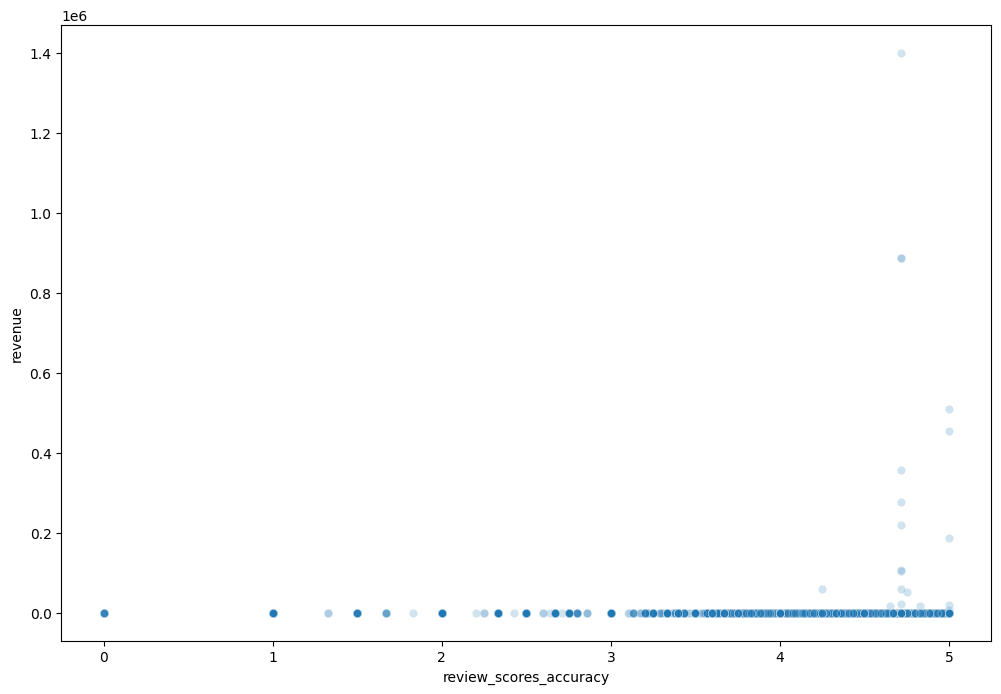

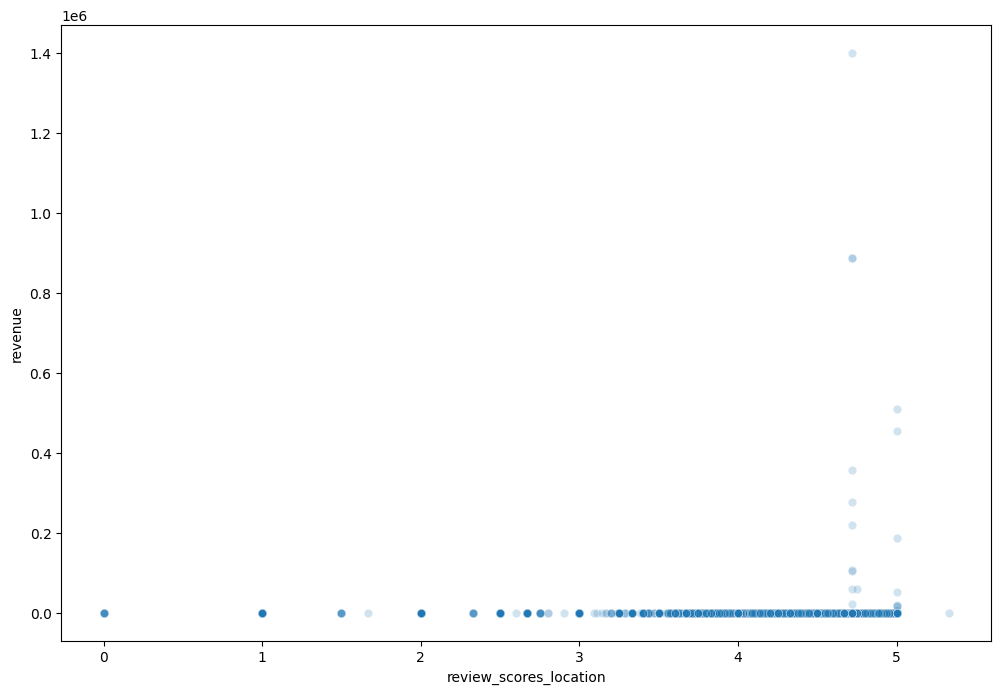

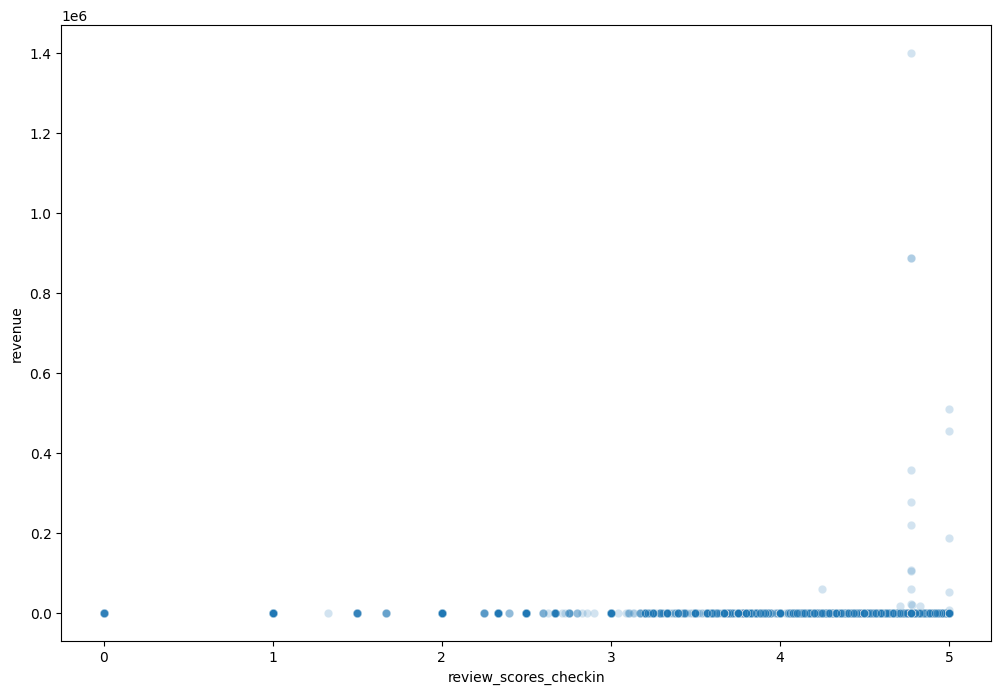

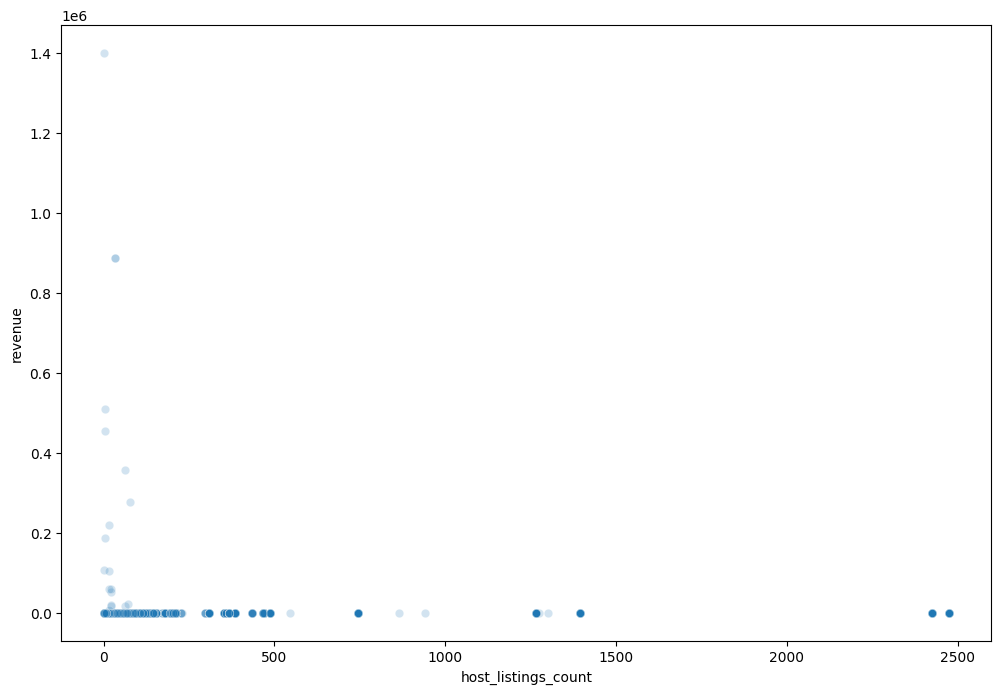

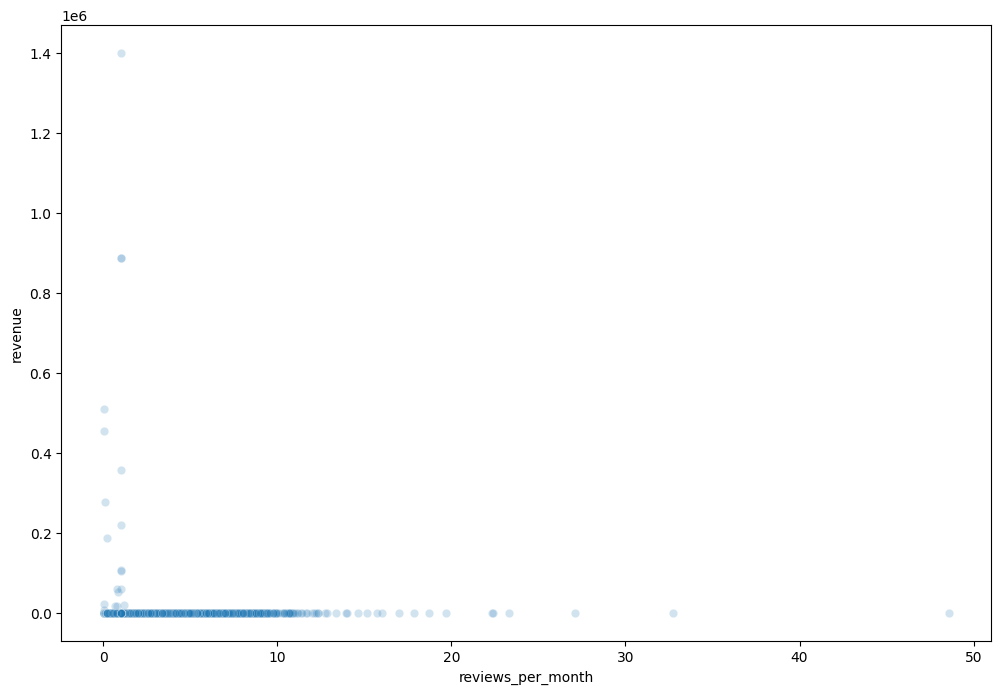

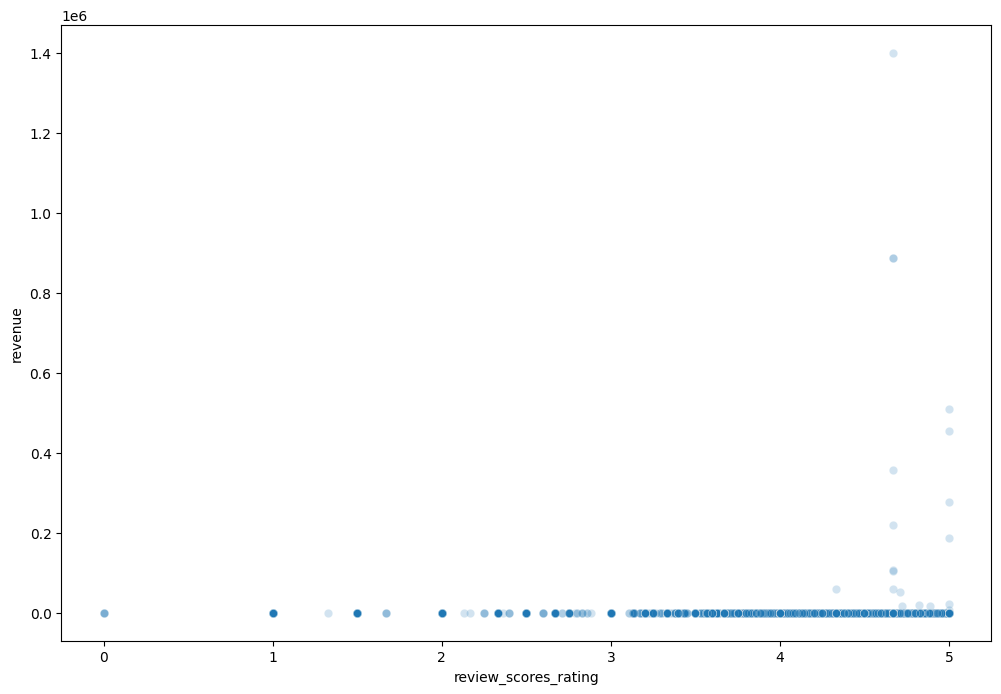

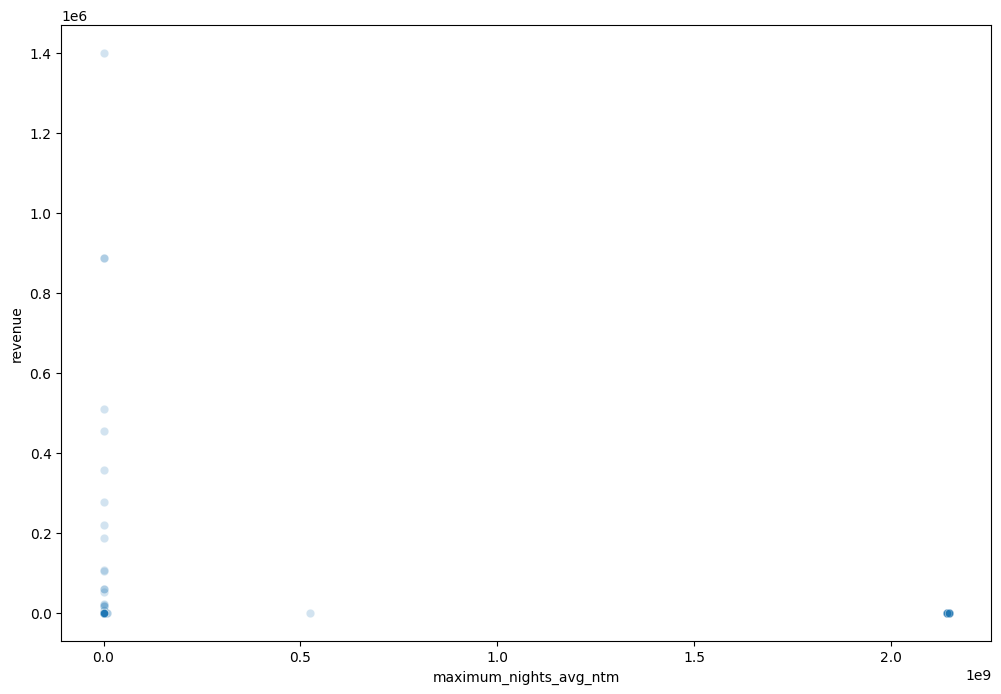

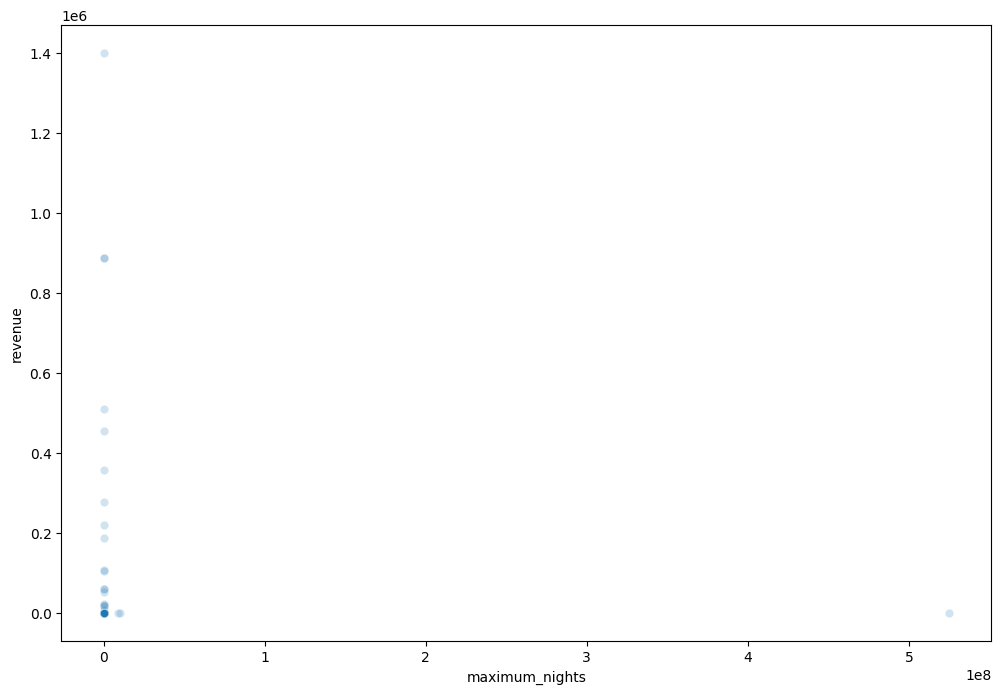

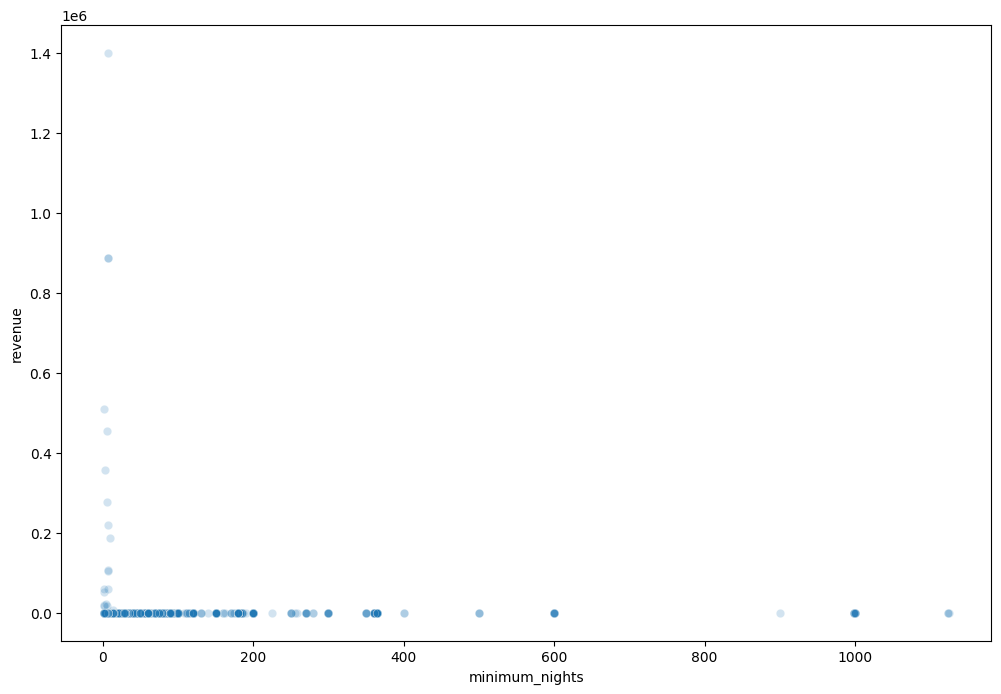

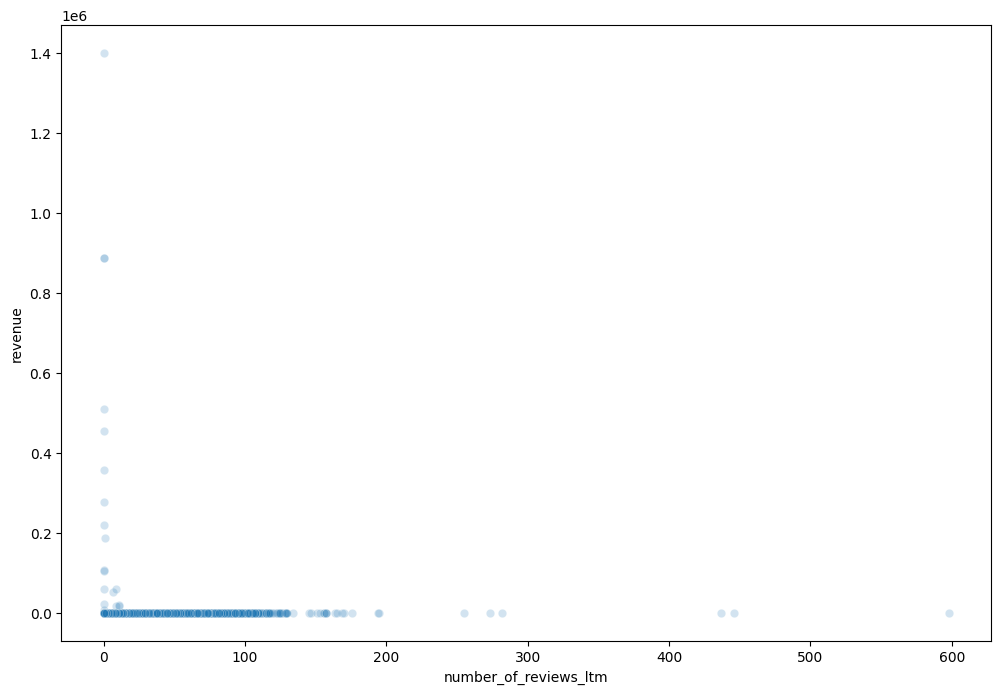

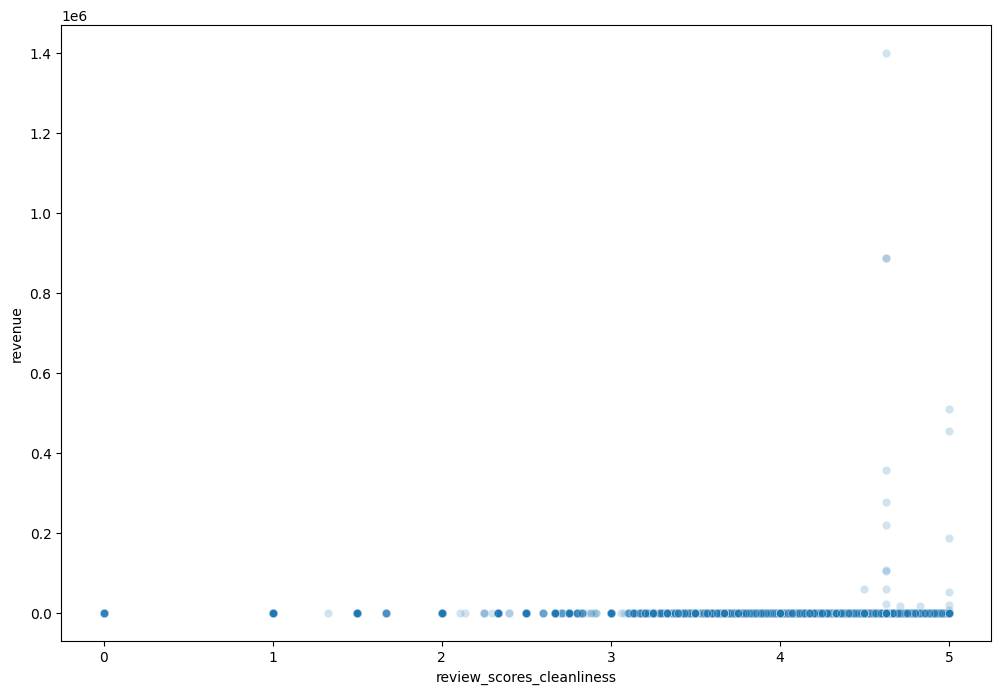

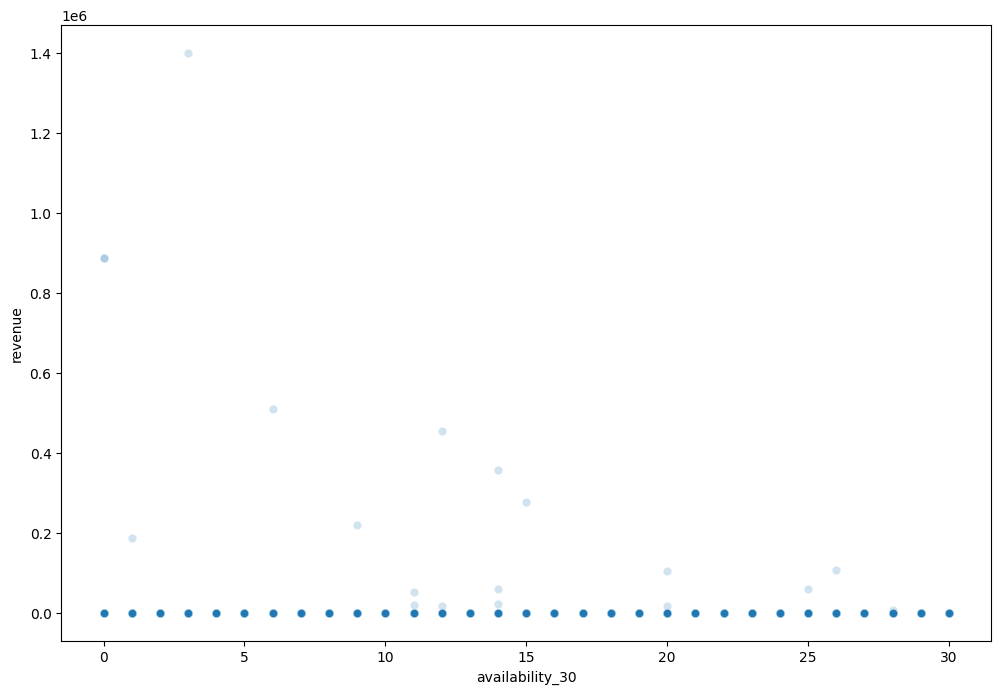

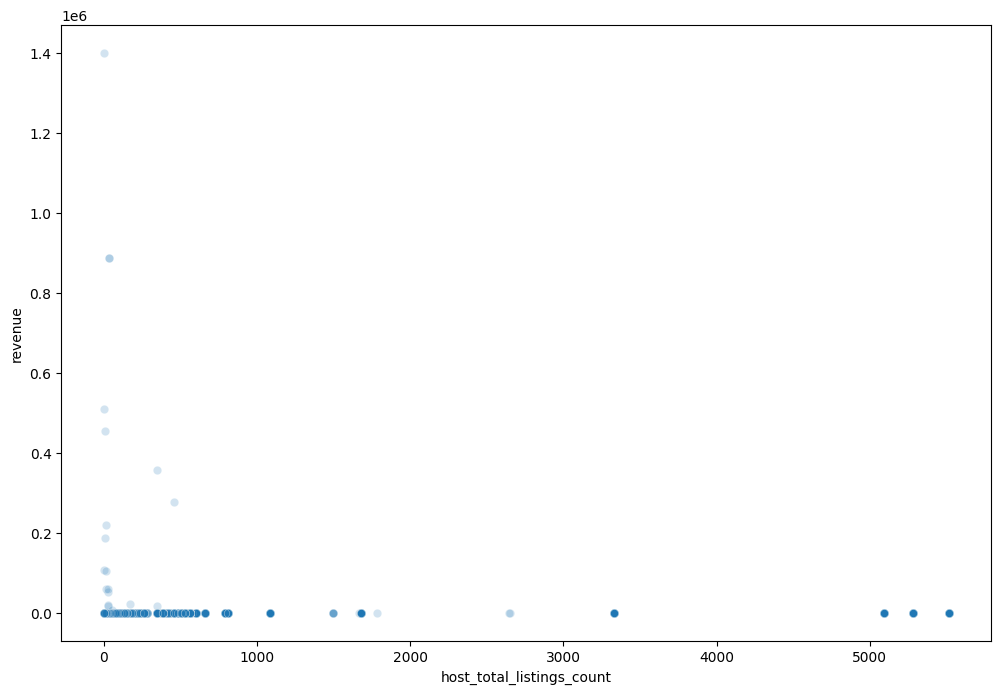

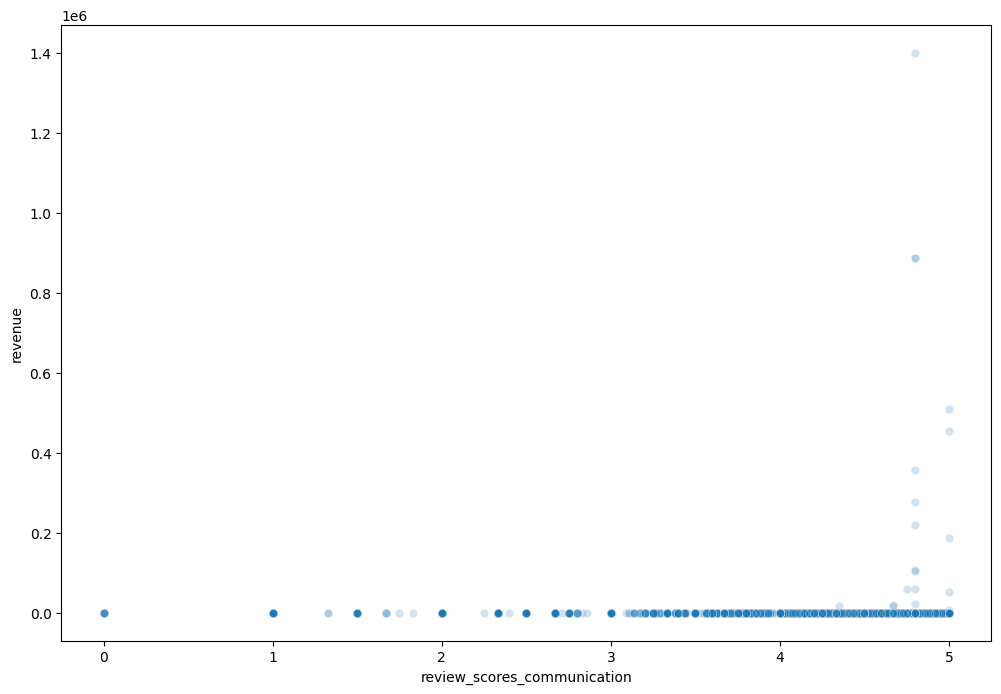

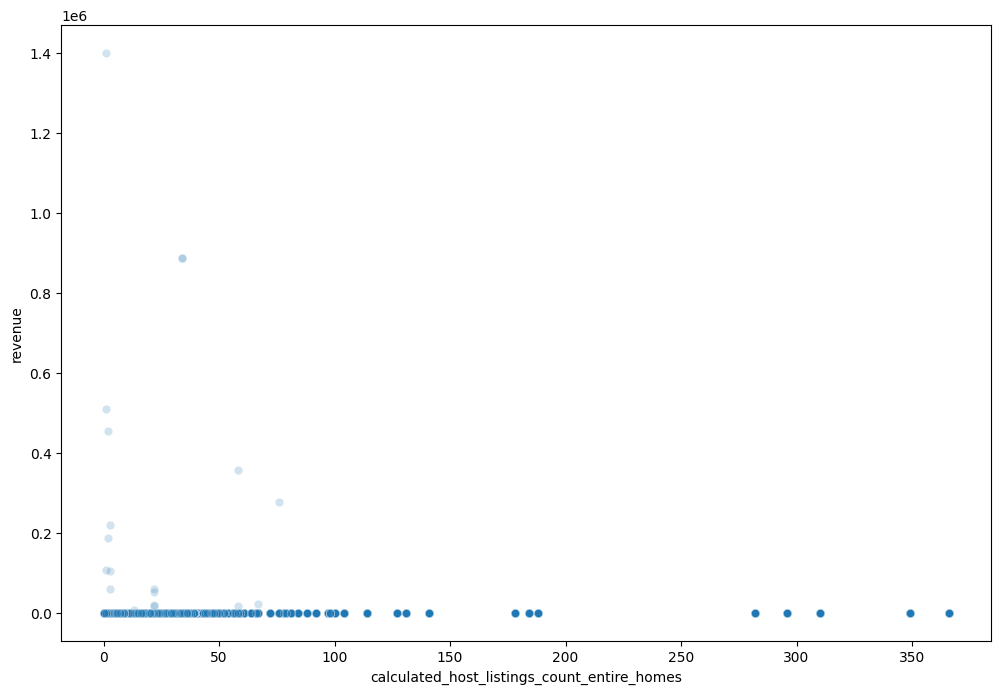

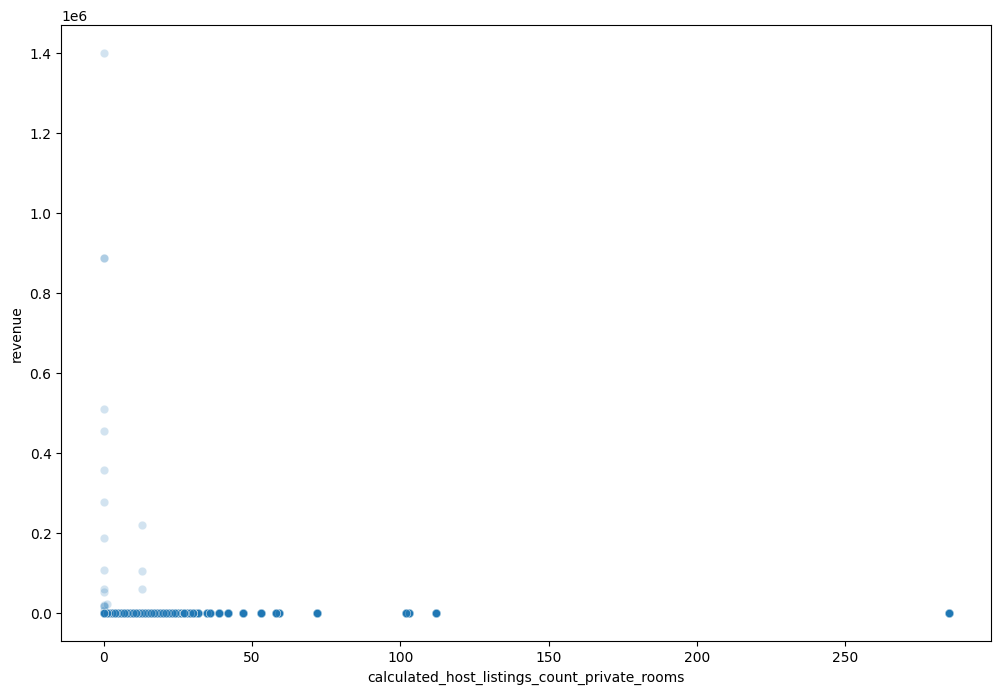

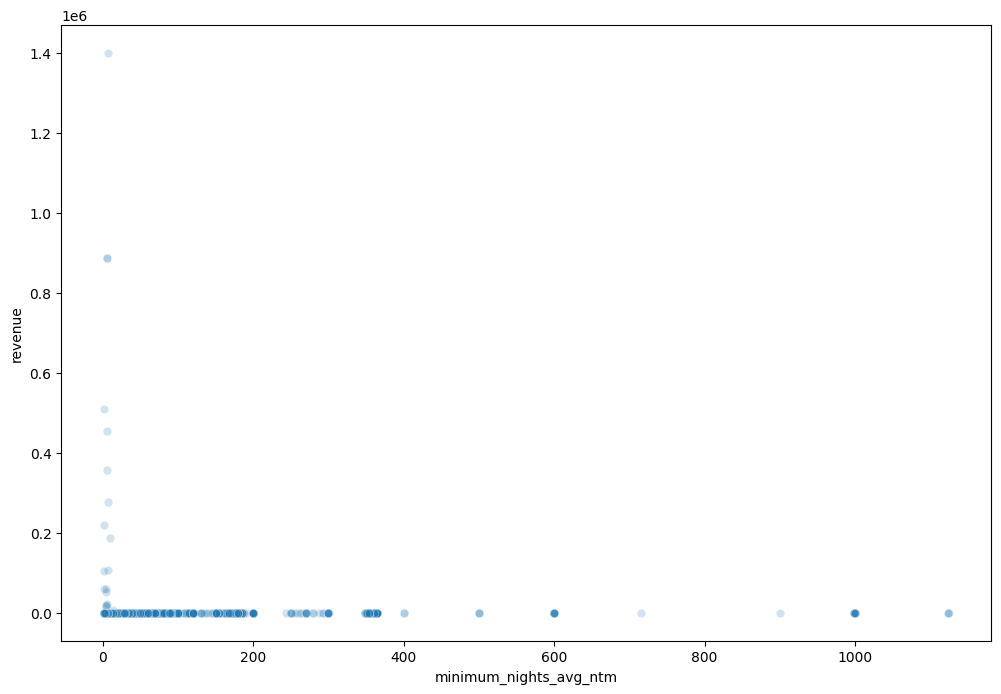

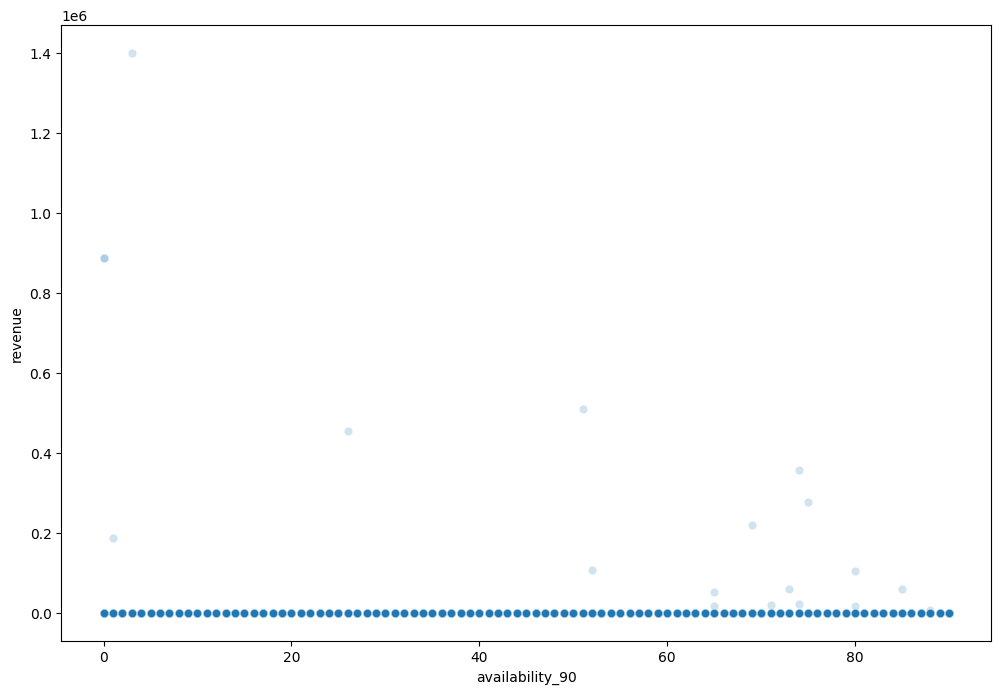

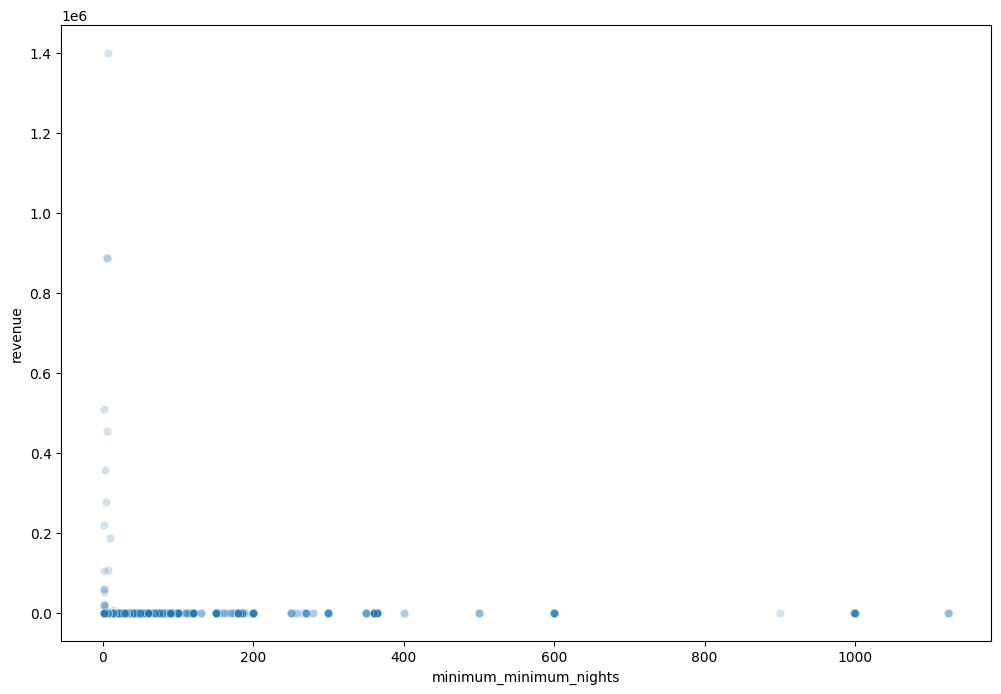

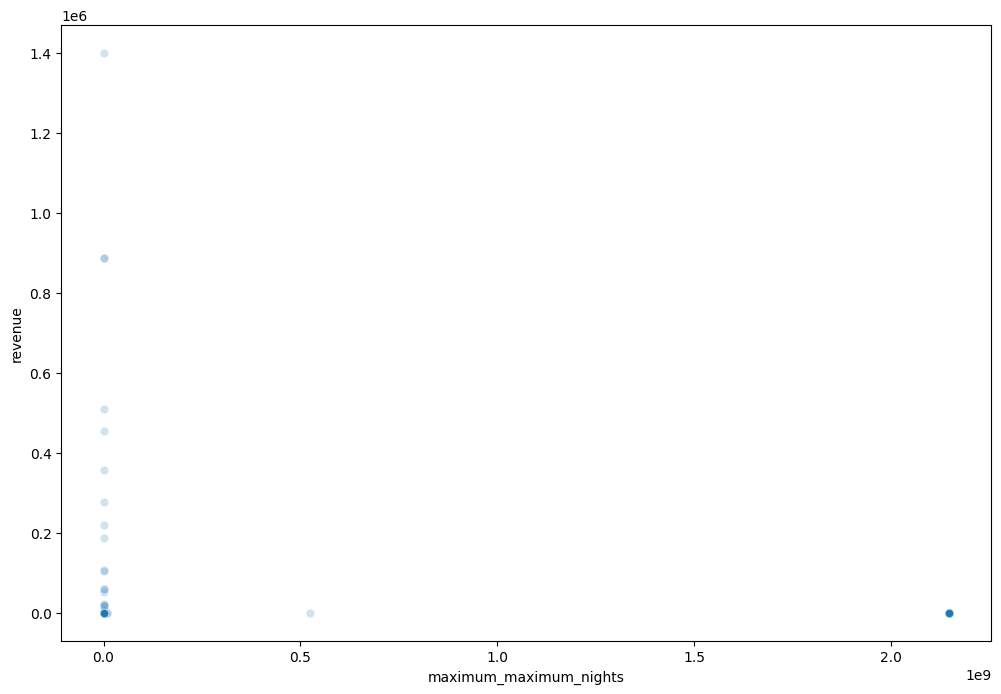

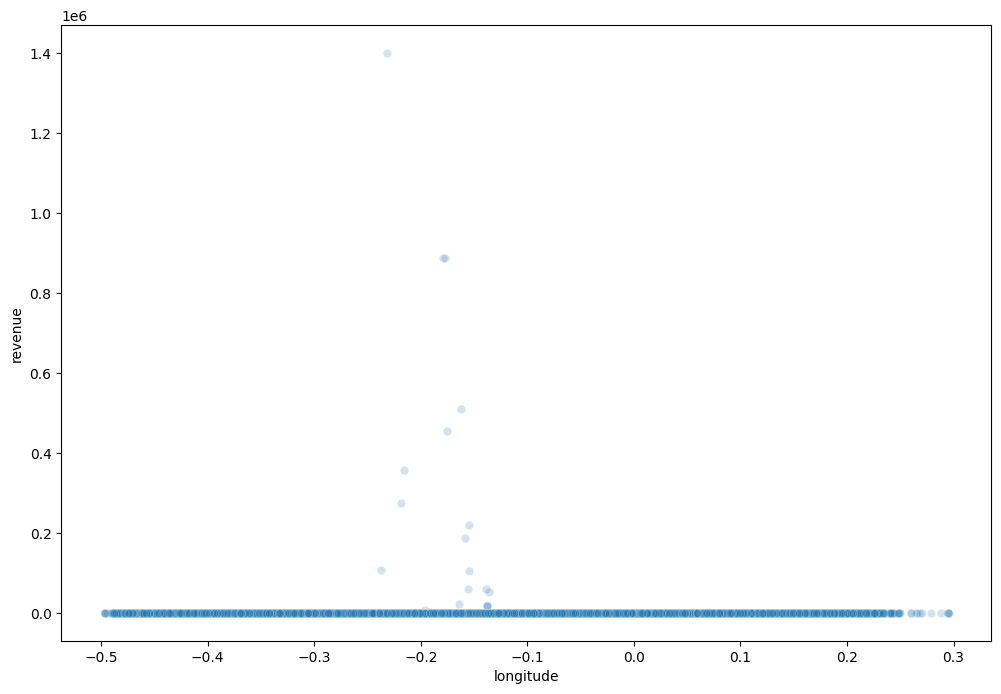

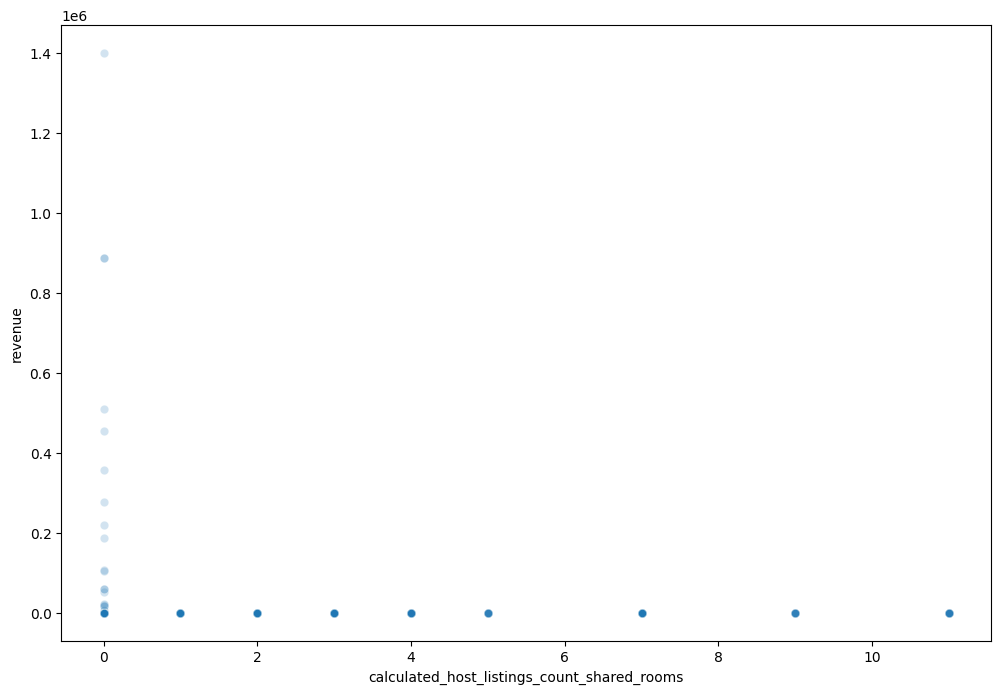

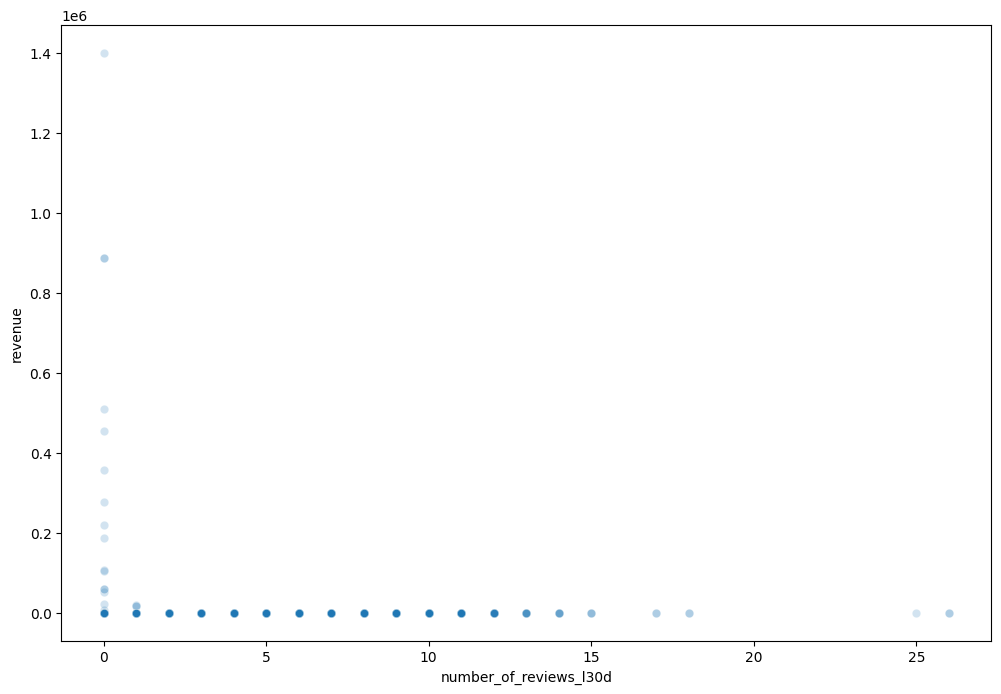

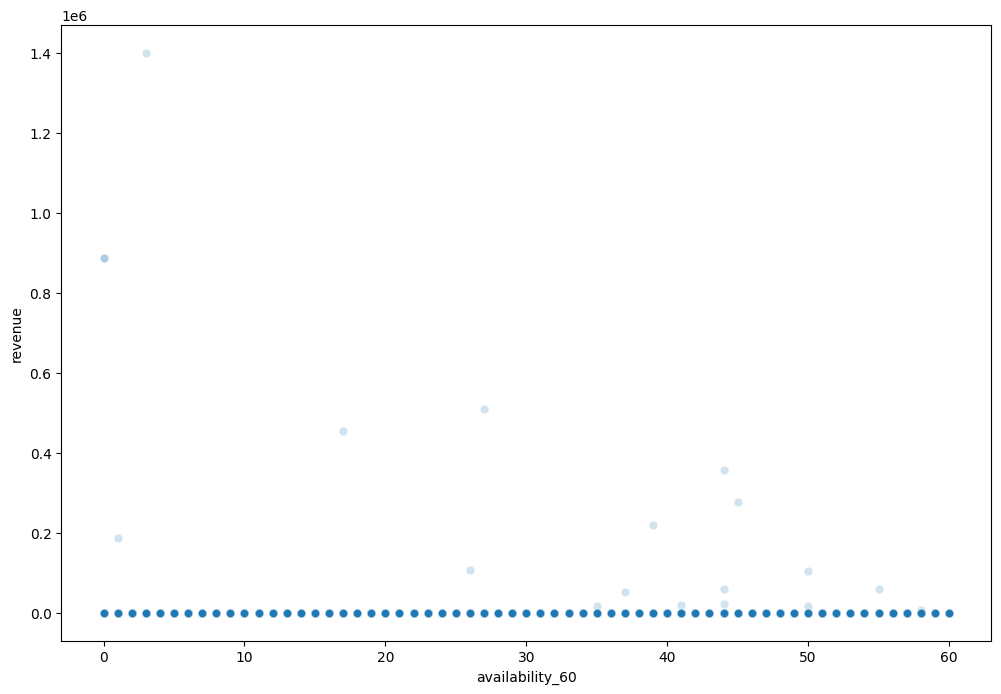

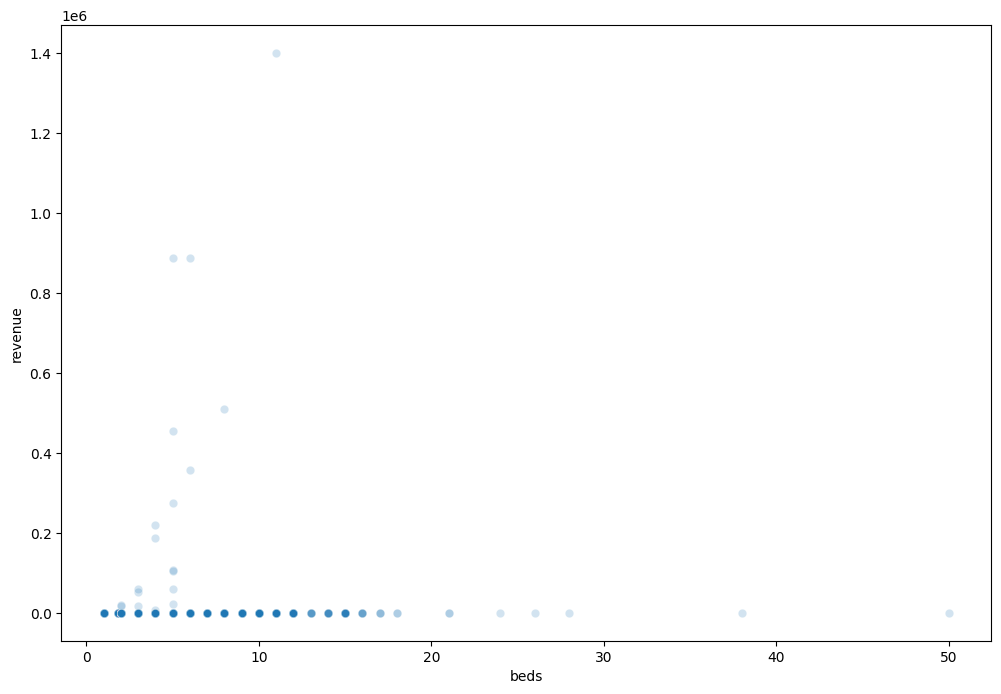

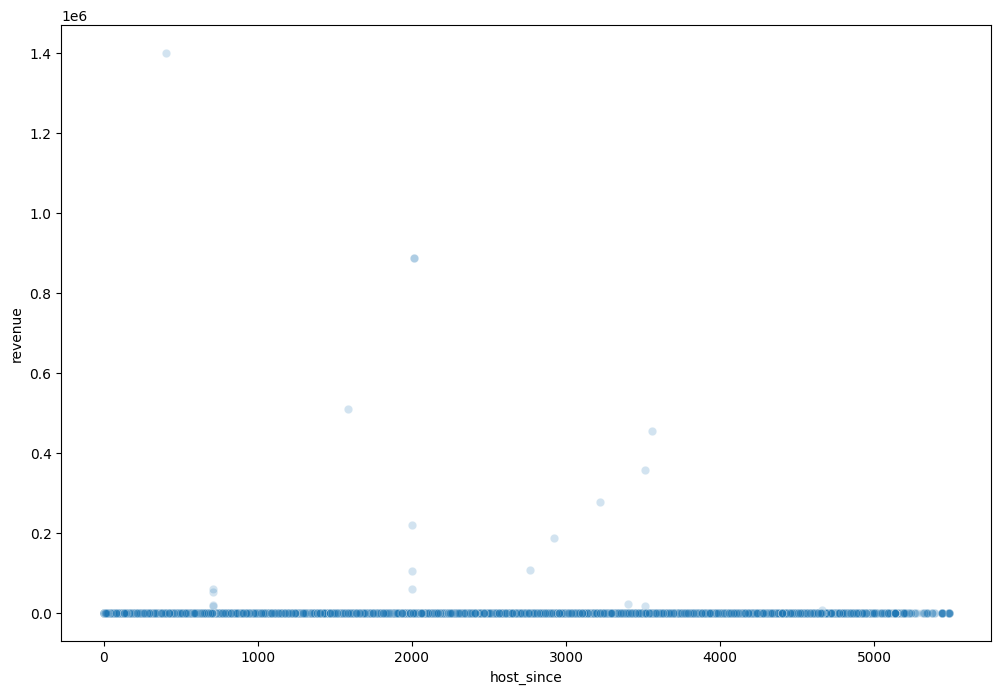

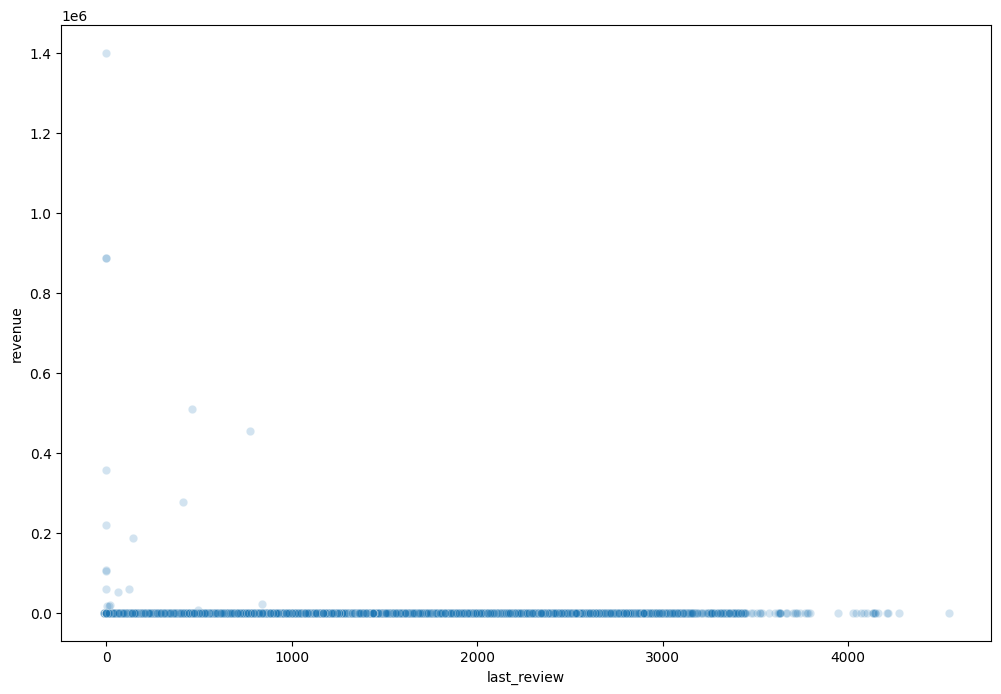

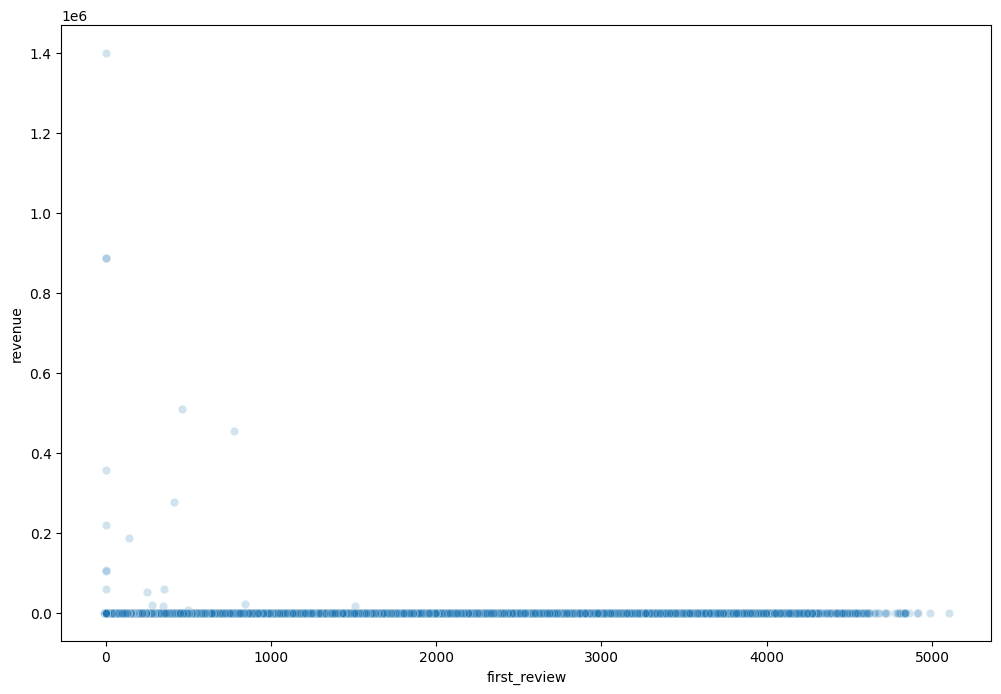

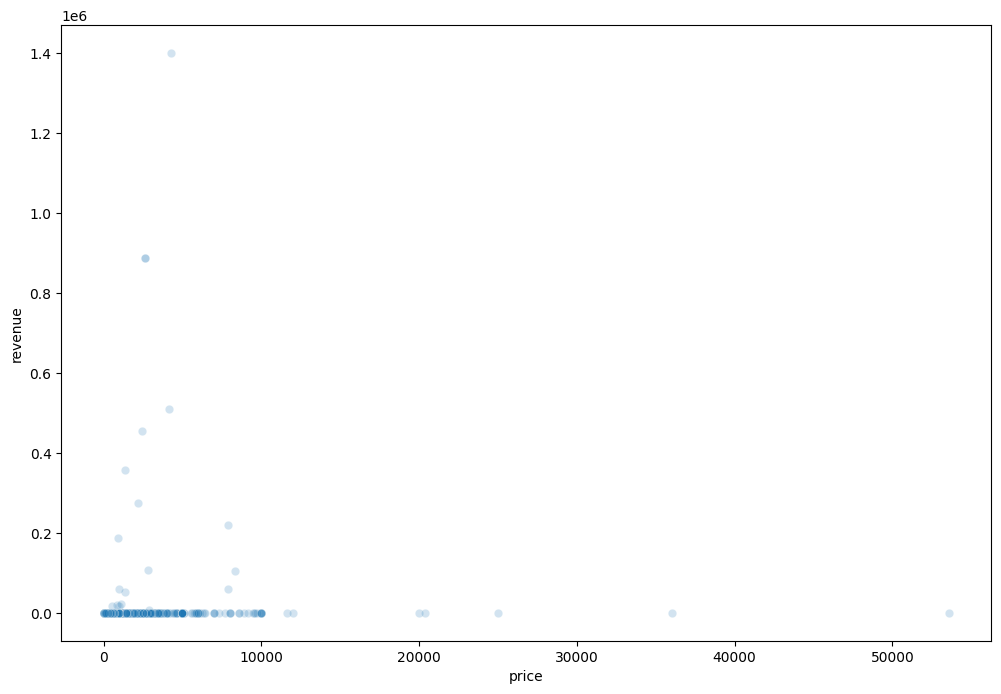

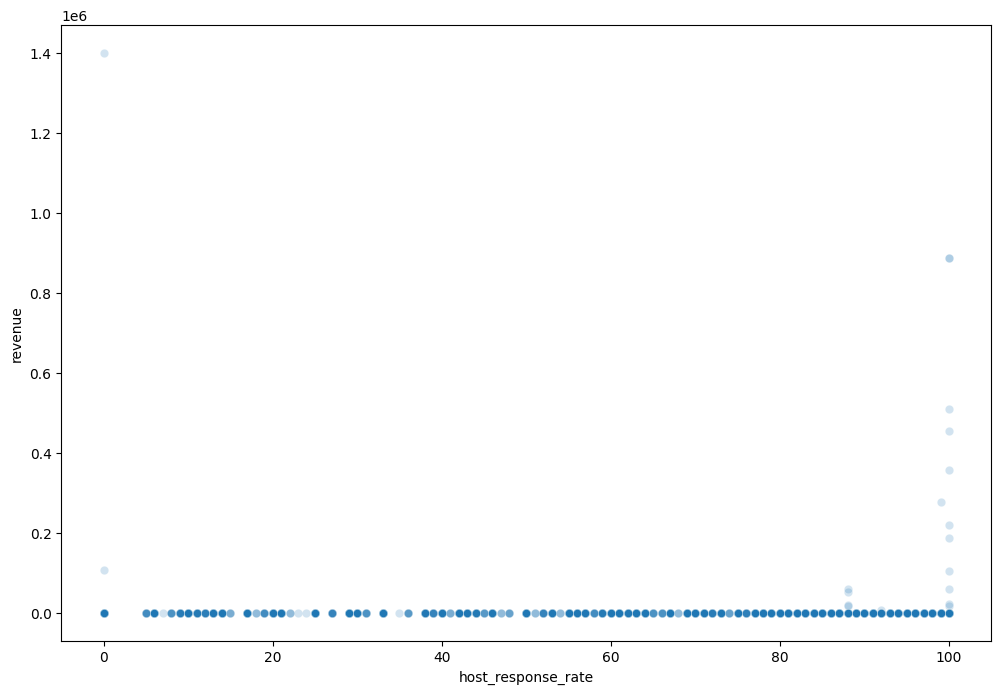

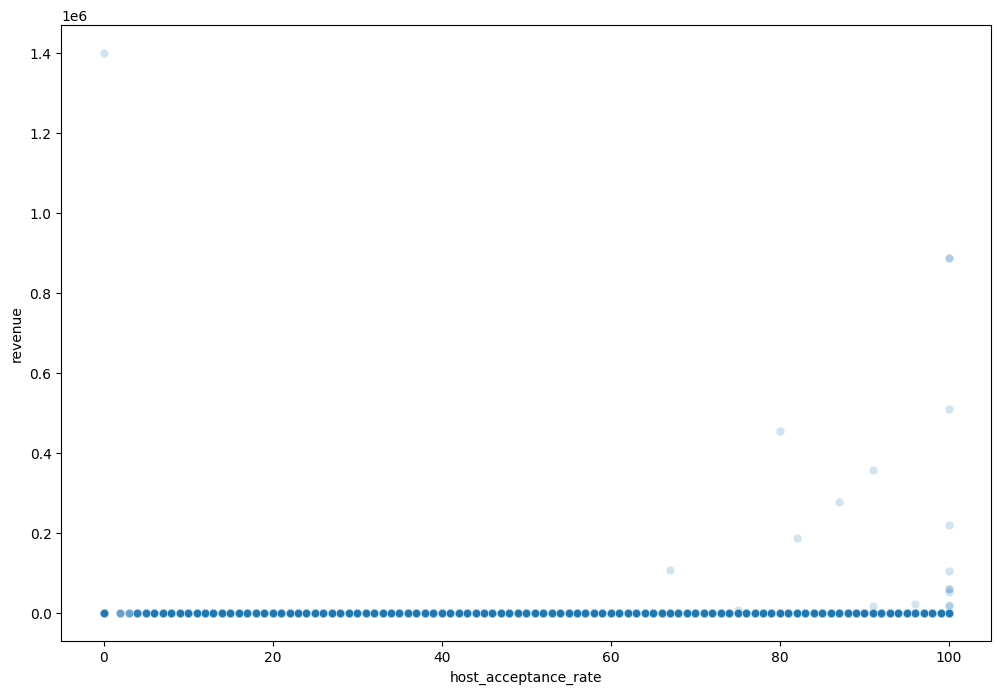

In [35]:
# scatter plot
for col in feature_continuous:
    sns.scatterplot(data = feature_df,
                    x = col,
                    y = 'revenue',
                    alpha = 0.2)
                    #x_jitter = True)
    plt.show()

학습/검증 데이터 분리

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split

X = feature_df.drop(['id', 'host_id', 'neighbourhood_cleansed','revenue'], axis=1)
y= feature_df['revenue']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= 0.33, random_state=42)

In [38]:
X_train

,accommodates,availability_365,calculated_host_listings_count,minimum_maximum_nights,latitude,number_of_reviews,maximum_minimum_nights,review_scores_value,review_scores_accuracy,review_scores_location,...,host_response_rate,host_acceptance_rate,room_entire,room_hotel,room_private,room_shared,response_3d,response_1d,response_3h,response_1h
28925,7,232,50,1125.0,51.493473,13,10.0,4.460000,4.460000,4.230000,...,100.0,99.0,1,0,0,0,0,0,0,1
68069,2,0,5,1125.0,51.526100,60,3.0,4.620000,4.820000,4.850000,...,98.0,100.0,0,0,1,0,0,0,0,1
1193,1,89,1,30.0,51.518360,7,1.0,4.710000,4.570000,5.000000,...,0.0,0.0,0,0,1,0,1,0,0,0
27046,8,190,1,365.0,51.521800,0,3.0,4.598477,4.715774,4.720782,...,0.0,0.0,1,0,0,0,1,0,0,0
16591,2,299,2,1125.0,51.528610,6,3.0,4.670000,4.670000,5.000000,...,100.0,100.0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2,0,1,1125.0,51.529120,7,3.0,4.860000,4.710000,4.570000,...,0.0,0.0,1,0,0,0,0,0,0,0
54886,2,341,1,20.0,51.542630,18,7.0,4.820000,5.000000,4.880000,...,100.0,18.0,1,0,0,0,0,1,0,0
76820,2,89,1,1125.0,51.470413,2,2.0,5.000000,5.000000,4.500000,...,75.0,100.0,0,0,1,0,0,0,0,1
860,2,364,1,1125.0,51.422230,12,2.0,4.750000,4.920000,4.920000,...,0.0,0.0,0,0,1,0,0,0,0,0


In [39]:
y_train

28925    0.0
68069    0.0
1193     0.0
27046    0.0
16591    0.0
        ... 
6265     0.0
54886    0.0
76820    0.0
860      0.0
15795    0.0
Name: revenue, Length: 61491, dtype: float64

In [40]:
X_test

,accommodates,availability_365,calculated_host_listings_count,minimum_maximum_nights,latitude,number_of_reviews,maximum_minimum_nights,review_scores_value,review_scores_accuracy,review_scores_location,...,host_response_rate,host_acceptance_rate,room_entire,room_hotel,room_private,room_shared,response_3d,response_1d,response_3h,response_1h
75533,2,0,1,1125.0,51.577750,1,1.0,5.000000,5.000000,5.000000,...,0.0,0.0,1,0,0,0,0,0,0,0
13158,1,23,1,365.0,51.517741,0,10.0,4.598477,4.715774,4.720782,...,100.0,75.0,1,0,0,0,0,0,1,0
51830,2,217,4,365.0,51.548278,0,3.0,4.598477,4.715774,4.720782,...,100.0,100.0,0,0,1,0,0,0,0,1
84468,1,283,30,1125.0,51.513060,10,3.0,4.800000,4.800000,4.800000,...,100.0,99.0,0,0,1,0,0,0,0,1
10012,2,0,1,1125.0,51.448470,0,1.0,4.598477,4.715774,4.720782,...,0.0,0.0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16809,2,0,1,1125.0,51.590040,0,1.0,4.598477,4.715774,4.720782,...,0.0,0.0,0,0,1,0,0,0,0,0
23947,6,315,8,1125.0,51.514656,4,6.0,5.000000,5.000000,5.000000,...,100.0,100.0,1,0,0,0,0,0,0,1
44017,2,0,1,20.0,51.542300,9,3.0,4.330000,4.890000,5.000000,...,0.0,0.0,1,0,0,0,0,0,0,0
52266,2,0,1,1125.0,51.459550,3,1.0,5.000000,5.000000,4.670000,...,0.0,0.0,1,0,0,0,0,0,0,0


In [41]:
y_test

75533    0.0
13158    0.0
51830    0.0
84468    0.0
10012    0.0
        ... 
16809    0.0
23947    0.0
44017    0.0
52266    0.0
81459    0.0
Name: revenue, Length: 30287, dtype: float64

save as csv

In [43]:
path = 'drive/MyDrive/letuin/airbnb/data'

X_train.to_csv(f'{path}/x_train.csv', index=False)
y_train.to_csv(f'{path}/y_train.csv', index=False)
X_test.to_csv(f'{path}/x_train.csv', index=False)
y_test.to_csv(f'{path}/y_train.csv', index=False)